In [1]:
import os, glob, pickle
import sys
import numpy as np
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax
%matplotlib inline

In [2]:
path = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(path) 
from utils.training import train_cplmixVAE
from utils.eval_models import eval_mixmodel
from utils.cluster_analysis import K_selection

In [3]:
n_run = 1
n_categories = 20
state_dim = 15
n_arm = 2
tau = .05
fc_dim = 100
latent_dim = 30
lr = 0.001
p_drop = .2
batch_size = 1000
n_epoch = 1000
n_epoch_p = 1000
n_gene = 9134 # 7688 #9881
subclass = 'Sst'
device = None

In [4]:
data_path = f'/data/AD_MTG_{subclass}_nGene_{n_gene}_nDonor_84.p'
data_path = path + str(data_path)
folder_name = f'{subclass}_run_{n_run}_K_{n_categories}_Sdim_{state_dim}_ngene_{n_gene}_fcDim_{fc_dim}_latDim_{latent_dim}_lr_{lr}_pDrop_{p_drop}_n_arm_{n_arm}_tau_{tau}_bsize_{batch_size}_nepoch_{n_epoch}_nepochP_{n_epoch_p}'
saving_folder = path + "/results/cpl_mixVAE/"
saving_folder = saving_folder + str(folder_name)

In [4]:
models = glob.glob(saving_folder + '/model/cpl_mixVAE_model_*')
cpl_mixVAE, data, sum_dict = eval_mixmodel(n_categories=n_categories, 
                                       state_dim=state_dim, 
                                       n_arm=n_arm,
                                       latent_dim=latent_dim,
                                       fc_dim=fc_dim,
                                       tau=tau,
                                       subclass=subclass,
                                       saving_folder=saving_folder, 
                                       data_path=data_path,
                                       device=device,
                                       models=models)

loading AD Sst data ... 
Data is loaded
['Sst_1' 'Sst_10' 'Sst_11' 'Sst_12' 'Sst_13' 'Sst_19' 'Sst_2' 'Sst_20'
 'Sst_22' 'Sst_23' 'Sst_25' 'Sst_3' 'Sst_4' 'Sst_5' 'Sst_7' 'Sst_9']
using CPU ...
/Users/yeganeh.marghi/github/cplmix_AD/results/Sst_run_1_K_20_Sdim_15_ngene_9134_fcDim_100_latDim_30_lr_0.001_pDrop_0.2_n_arm_2_tau_0.05_bsize_1000_nepoch_1000_nepochP_1000/model/cpl_mixVAE_model_after_pruning_13_2022-10-31-16-51-01.pth
/Users/yeganeh.marghi/github/cplmix_AD/results/Sst_run_1_K_20_Sdim_15_ngene_9134_fcDim_100_latDim_30_lr_0.001_pDrop_0.2_n_arm_2_tau_0.05_bsize_1000_nepoch_1000_nepochP_1000/model/model_eval
/Users/yeganeh.marghi/github/cplmix_AD/results/Sst_run_1_K_20_Sdim_15_ngene_9134_fcDim_100_latDim_30_lr_0.001_pDrop_0.2_n_arm_2_tau_0.05_bsize_1000_nepoch_1000_nepochP_1000/model/cpl_mixVAE_model_after_pruning_2_2022-10-31-16-51-01.pth
/Users/yeganeh.marghi/github/cplmix_AD/results/Sst_run_1_K_20_Sdim_15_ngene_9134_fcDim_100_latDim_30_lr_0.001_pDrop_0.2_n_arm_2_tau_0.05_bsize_

/Users/yeganeh.marghi/github/cplmix_AD/utils/cluster_analysis.py:165: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig_1.add_subplot()


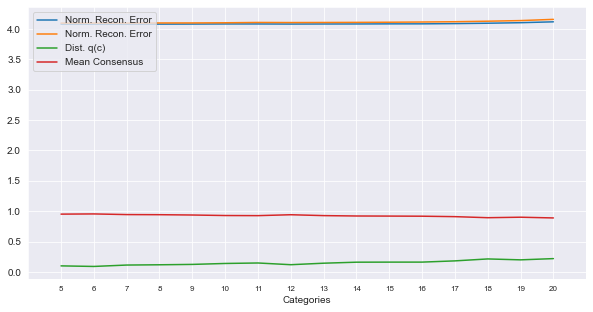

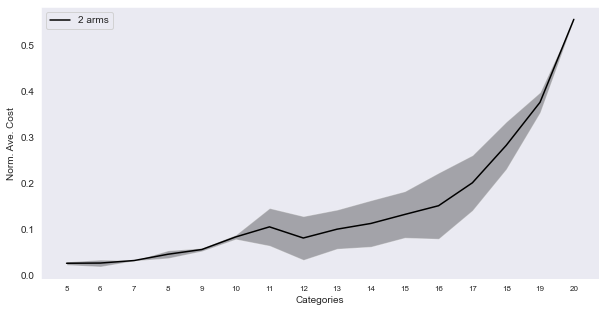

In [5]:
fig1, fig2 = K_selection(sum_dict, n_categories, n_arm, n_gene)

In [5]:
model_order = 9
selected_model = glob.glob(saving_folder + '/model/cpl_mixVAE_model_after_pruning_' + str(n_categories - model_order) + '*')[0]
# selected_model = glob.glob(saving_folder + '/model/cpl_mixVAE_model_before_pruning_*')[0]
cpl_mixVAE, data, outcome = eval_mixmodel(n_categories=n_categories, 
                           state_dim=state_dim, 
                           n_arm=n_arm,
                           latent_dim=latent_dim,
                           fc_dim=fc_dim,
                           tau=tau,
                           subclass=subclass,
                           saving_folder=saving_folder, 
                           data_path=data_path,
                           all_data=True,
                           device=device,
                           models=[selected_model])

loading AD Sst data ... 
Data is loaded
['Sst_1' 'Sst_10' 'Sst_11' 'Sst_12' 'Sst_13' 'Sst_19' 'Sst_2' 'Sst_20'
 'Sst_22' 'Sst_23' 'Sst_25' 'Sst_3' 'Sst_4' 'Sst_5' 'Sst_7' 'Sst_9']
['UWA 6948' 'UWA 6962' 'UWA 6965' 'UWA 6966' 'UWA 6967' 'UWA 6983'
 'UWA 6989' 'UWA 6991' 'UWA 6992' 'UWA 6993' 'UWA 6997' 'UWA 6999'
 'UWA 7000' 'UWA 7017' 'UWA 7027' 'UWA 7028' 'UWA 7038' 'UWA 7041'
 'UWA 7043' 'UWA 7045' 'UWA 7048' 'UWA 7049' 'UWA 7051' 'UWA 7055'
 'UWA 7056' 'UWA 7058' 'UWA 7063' 'UWA 7064' 'UWA 7065' 'UWA 7067'
 'UWA 7100' 'UWA 7101' 'UWA 7113' 'UWA 7117' 'UWA 7119' 'UWA 7120'
 'UWA 7124' 'UWA 7128' 'UWA 7129' 'UWA 7136' 'UWA 7138' 'UWA 7144'
 'UWA 7146' 'UWA 7150' 'UWA 7152' 'UWA 7153' 'UWA 7157' 'UWA 7159'
 'UWA 7161' 'UWA 7163' 'UWA 7170' 'UWA 7175' 'UWA 7179' 'UWA 7181'
 'UWA 7182' 'UWA 7183' 'UWA 7184' 'UWA 7186' 'UWA 7188' 'UWA 7197'
 'UWA 7227' 'UWA 7237' 'UWA 7239' 'UWA 7240' 'UWA 7244' 'UWA 7245'
 'UWA 7251' 'UWA 7264' 'UWA 7267' 'UWA 7268' 'UWA 7285' 'UWA 7288'
 'UWA 7290' 'UWA

In [6]:
data['log1p'].shape

(45872, 9134)

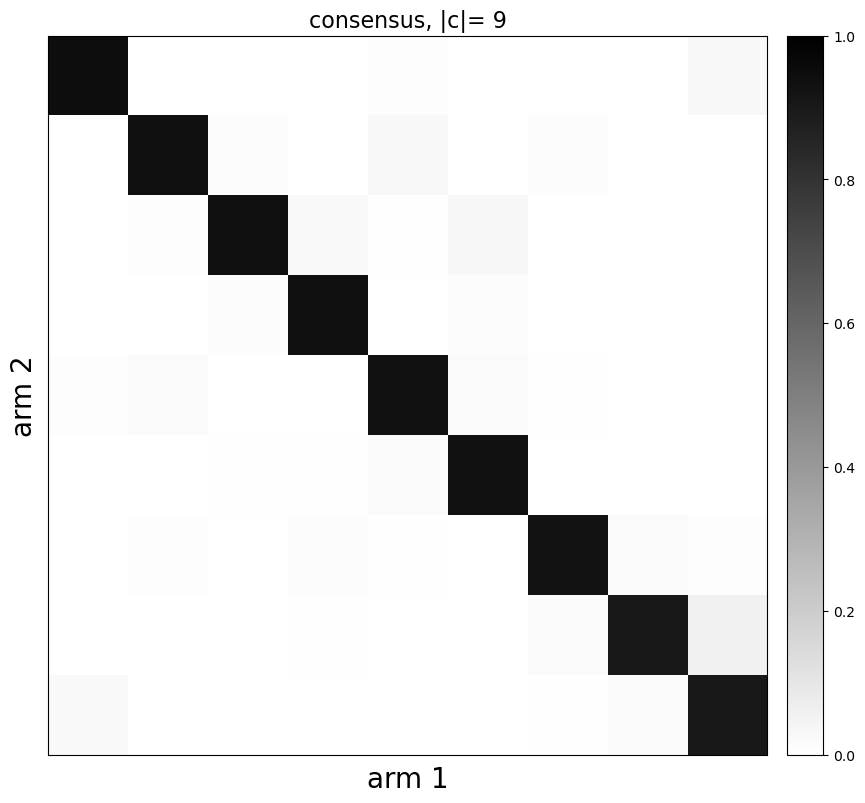

In [7]:
plt.figure(figsize=[10,10])
ax = plt.gca()
im = ax.imshow(outcome['consensus'][0], cmap='binary', vmax=1)
plt.xlabel('arm 1', fontsize=20)
plt.ylabel('arm 2', fontsize=20)
plt.xticks([])
plt.yticks([])
plt.title('consensus, |c|= ' + str(outcome['consensus'][0].shape[0]), fontsize=16)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)

In [6]:
data['supertype_scANVI'] = np.array(data['supertype_scANVI'])
# T_class = np.unique(data['supertype_scANVI'])
uniq_labels = np.unique(data['label'])
color = ['#ADE6A6', '#B8FFCA', '#82AD7D', '#A6E6A9', '#7AE6AB', '#D9F077',
       '#00979D', '#00A79D', '#008F1F', '#53879D', '#2F8C4D', '#33A9CE',
       '#0094C2', '#005C07', '#669D6A', '#00879D', '#00A809', '#26BF64',
       '#00FF00', '#00DDC5', '#26FFF2', '#3D9946', '#008F39', '#73CA95']
data['color'] = np.copy(data['cluster_color'])
uniq_clr, T_class, num_Tclass = [], [], []

for i_type, ttype in enumerate(uniq_labels):
    idx = np.where(data['label'] == ttype)[0]
    data['color'][idx] = color[i_type]
    uniq_clr.append(color[i_type])
    T_class.append(data['supertype_scANVI'][idx[0]])
    num_Tclass.append(len(idx))

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data['supertype_scANVI'])
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
data['c_onehot'] = onehot_encoder.fit_transform(integer_encoded)
data['c_p'] = softmax((data['c_onehot'] + 1e-6) / 0.1, axis=1)

[1 4 0 2 5 3 7 6 8]
[ 5  9  2  6 10  8 18 15 20]
[1 4 0 2 5 3 7 6 8]
[ 5  9  2  6 10  8 18 15 20]


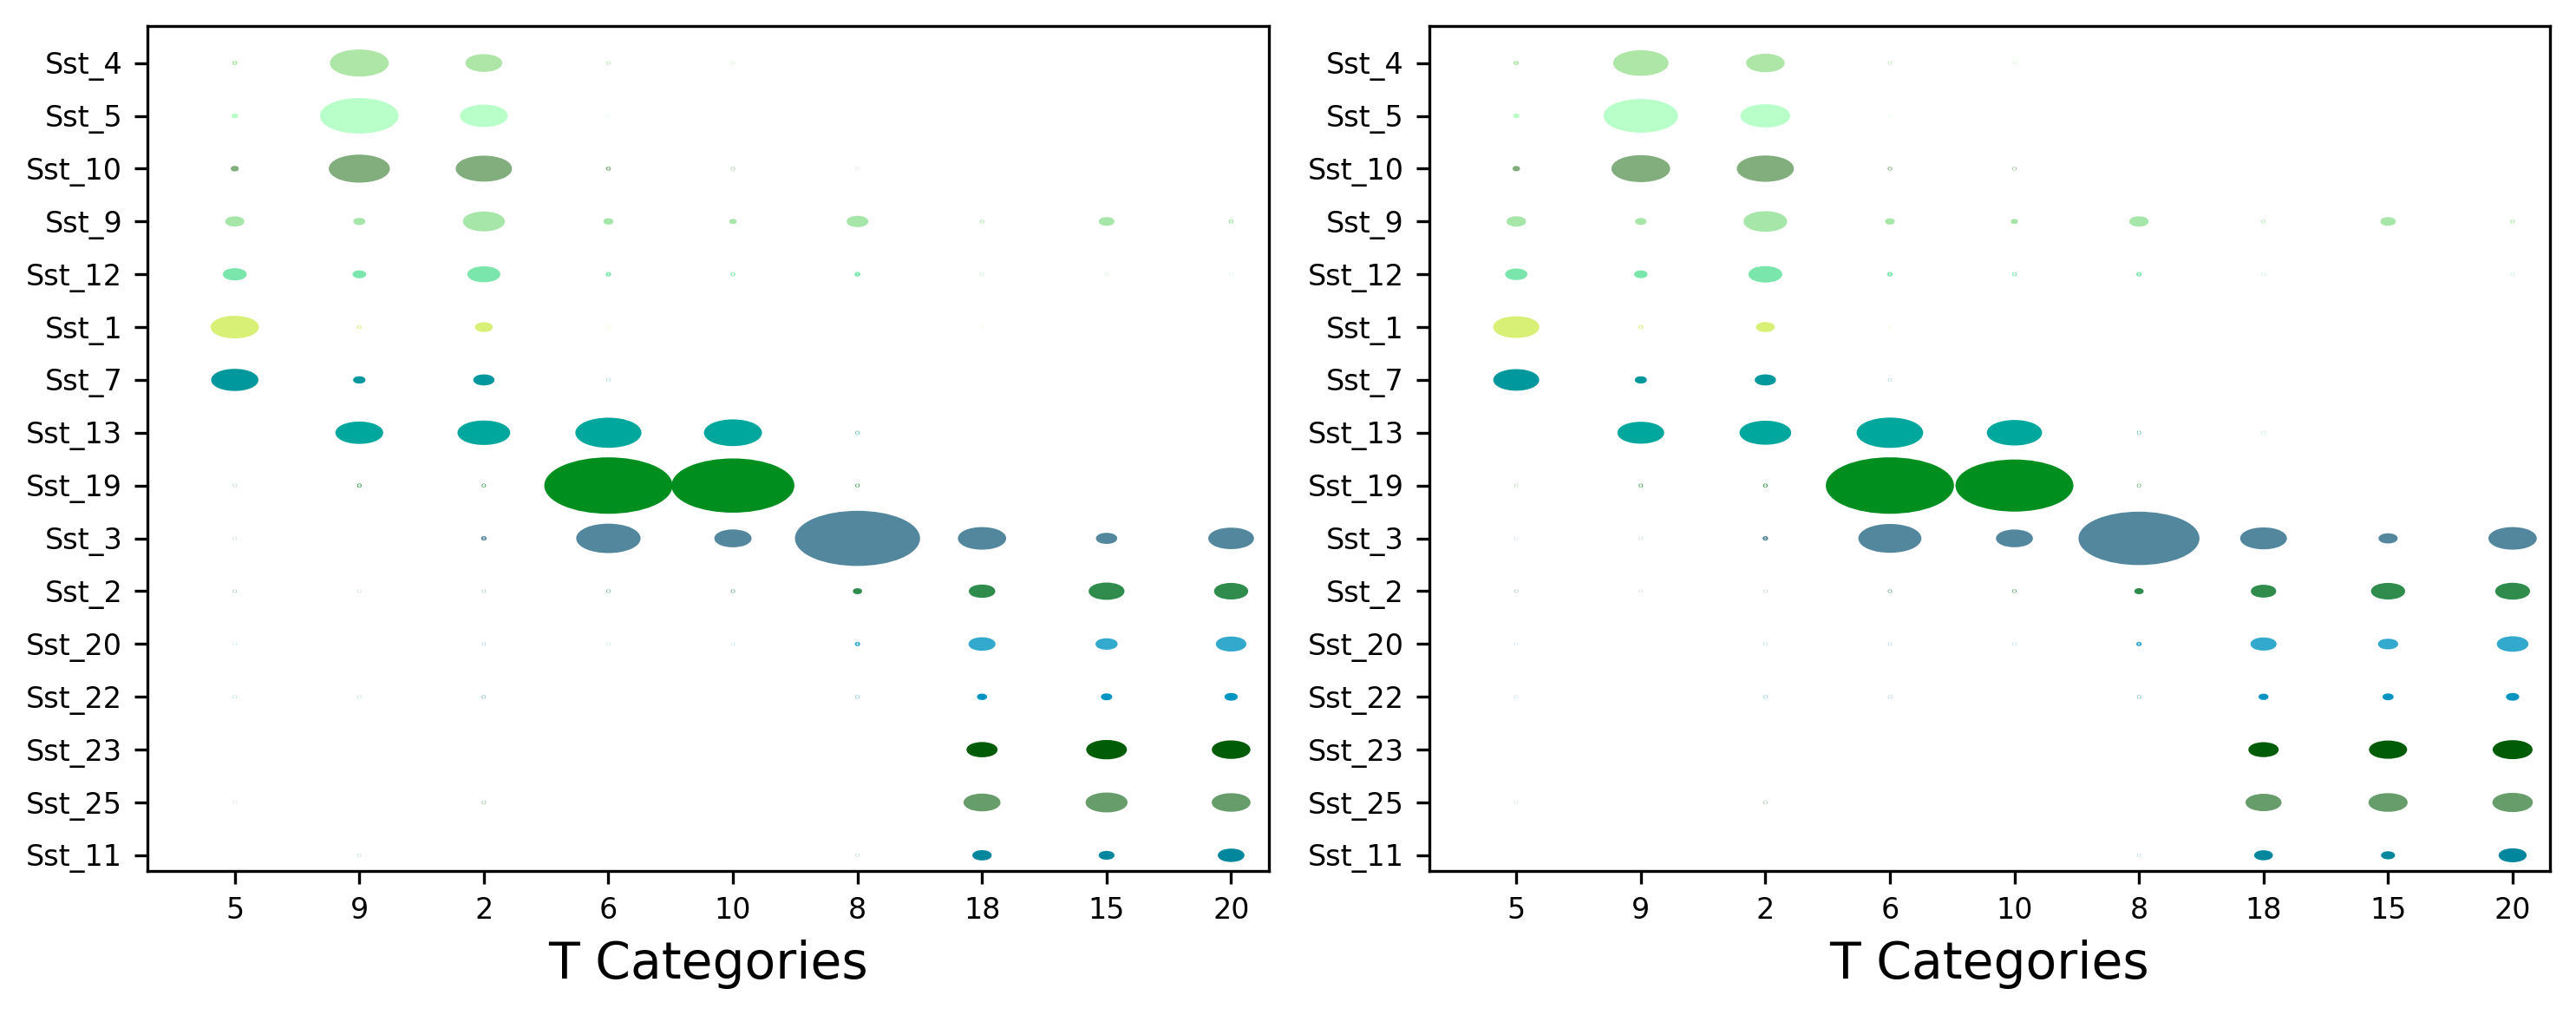

In [9]:
T_class = np.array(T_class)
class_reord = np.array([4,5,8,7,10,1,6,11,12,3,2,13,14,15,16,9])
class_reord = (class_reord - 1).astype(int)

cT_vs_cT = outcome['cT_vs_cT'][0]
confm = np.zeros((n_arm, len(T_class), model_order))
fig, axs = plt.subplots(1, n_arm, figsize=(10, 4), dpi=300)
for arm in range(n_arm): 
    categories = np.unique(outcome['pred_label'][-1][arm]).astype(int)
    perform_mat = cT_vs_cT[arm, class_reord, :]
    row_sum = perform_mat.sum(axis=1)
    confm[arm, :, :] = np.divide(perform_mat, row_sum[:, np.newaxis], 
                        out=np.zeros_like(perform_mat), 
                        where=row_sum[:, np.newaxis]!=0)
    row_ind, col_ind = linear_sum_assignment(1 - perform_mat)

    if model_order > len(T_class):
        not_used_cat = [a for a in range(model_order) if a not in list(col_ind)]
        cat_indx = np.concatenate((col_ind, np.array(not_used_cat)))
    else:
        cat_indx = col_ind
#     cat_indx = np.array([2, 9, 12, 8, 11, 5, 6, 10, 0, 7, 1, 3, 4])
    cat_indx = np.array([1, 4, 0, 2, 5, 3, 7, 6, 8])
    print(cat_indx)
    print(categories[cat_indx])

#     sort_idx = [np.argsort(perform_mat[it, :])[::-1] for it in range(len(T_class))]  
#     sort_idx = np.vstack(sort_idx).astype(int)
#     indexes = np.unique(sort_idx[:, 0], return_index=True)[1]
#     max_idx = [sort_idx[:,0][index] for index in sorted(indexes)]
#     max_c_ind = -1 * np.ones(model_order) #sort_idx[:,0]
#     rep_c = np.zeros(len(max_idx))
# #     if model_order > len(T_class):
#     not_used_cat = [a for a in range(model_order) if a not in max_idx]
#     match_ind = [np.where(nuc == col_ind)[0][0] for nuc in not_used_cat]
#     not_used_cat = np.array(not_used_cat)[np.argsort(match_ind)]
#     jump = 0
#     for cc in not_used_cat:
#         colm = np.argmax(perform_mat[:, cc].astype(int))
#         find_indx = np.where(sort_idx[colm, 0] == max_idx)[0][0]
#         rep_c[find_indx] += 1
#         if max_c_ind[find_indx+int(rep_c[find_indx])] > 0:
#             jump += 1
#         max_c_ind[find_indx+int(sum(rep_c))] = cc
#         print(cc, find_indx+int(rep_c[find_indx])+jump)
    
#     print(max_c_ind)
#     tmp_idx = np.where(max_c_ind==-1)[0]
#     max_c_ind[tmp_idx] = max_idx
#     cat_indx = max_c_ind.astype(int)
#     print(cat_indx)
    
#     else:
#         cat_indx = sort_idx[:, 0]
    
#     cat_indx = col_ind
    mtx = perform_mat[:, cat_indx] / np.max(perform_mat[:, cat_indx]) / 2
    for l in range(len(T_class)):
        for col in range(model_order):
            xy = np.array([col, l])
            axs[arm].add_patch(plt.Circle(xy, radius=(mtx[l, col]), color=color[l]))
    axs[arm].set_xlim([-.7, model_order-.7])
    axs[arm].set_ylim([-.7, len(T_class)-.7])
    axs[arm].invert_yaxis()
    axs[arm].set_yticks(np.arange(len(T_class)))
    axs[arm].set_xticks(np.arange(model_order))
    axs[arm].set_yticklabels(T_class[class_reord], fontsize=8)
    axs[arm].set_xticklabels(categories[cat_indx], fontsize=8) # categories[cat_indx], fontsize=8
    axs[arm].set_xlabel('T Categories', fontsize=14)
#     axs[0].set_ylabel('Supertypes', fontsize=14)

fig.tight_layout()

NameError: name 'confm' is not defined

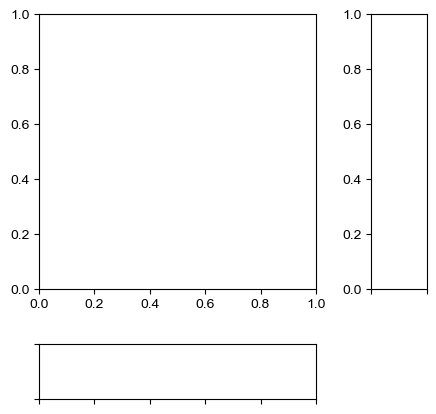

In [9]:
for arm in range(n_arm):
    fig = plt.figure(figsize=(5, 5), dpi=100)
    grid = plt.GridSpec(4, 4, hspace=1, wspace=1)
    ax_main = fig.add_subplot(grid[:-1, :-1])
    ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[])
    ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])
    sns.set(font_scale=1.)
    sns.heatmap(np.squeeze(confm[arm, :, cat_indx].T), vmin=0, xticklabels=[], yticklabels=[], vmax=1, ax=ax_main, cbar=False)
    ax_main.set_ylabel('Ref. T Types', fontsize=20)
    ax_main.set_xlabel('T Categories', fontsize=20)
    ax_main.set_yticklabels(ax_main.get_yticklabels())

    # histogram on the right
    perform_mat = cT_vs_cT[arm, :, :]
    ax_bottom.bar(np.arange(model_order), np.sum(perform_mat[:, cat_indx], axis=0), color='lightcoral')
    # ax_bottom.set_ylim([0, 300])
    ax_bottom.invert_yaxis()
    ax_bottom.set_xlim([-.5, model_order-.5])
    ax_bottom.spines['top'].set_visible(False)
    ax_bottom.spines['right'].set_visible(False)
    ax_bottom.spines['bottom'].set_visible(False)
    ax_bottom.spines['left'].set_visible(False)

    # histogram in the bottom
    ax_right.barh(np.arange(len(T_class)), np.sum(perform_mat[:, cat_indx], axis=1).T, color='lightcoral')
    ax_right.set_ylim([-.5, len(T_class)-.5])
    # ax_right.set_xlim([0, 300])
    ax_right.set_yticks(np.arange(len(T_class)))
    ax_right.invert_yaxis()
    ax_right.set_yticklabels(np.sum(perform_mat[:, cat_indx], axis=1).astype(int), fontsize=6)
    ax_right.spines['top'].set_visible(False)
    ax_right.spines['right'].set_visible(False)
    ax_right.spines['bottom'].set_visible(False)
    ax_right.spines['left'].set_visible(False)

    fig.tight_layout()
#     plt.savefig(saving_folder + '/confmax_K_' + str(model_order) + '_arm_' + str(arm) + '.png', dpi=600)


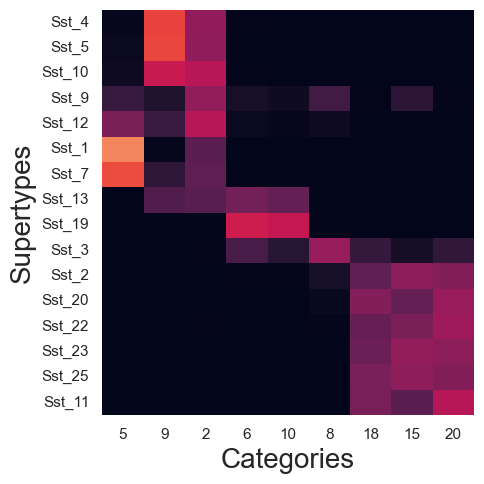

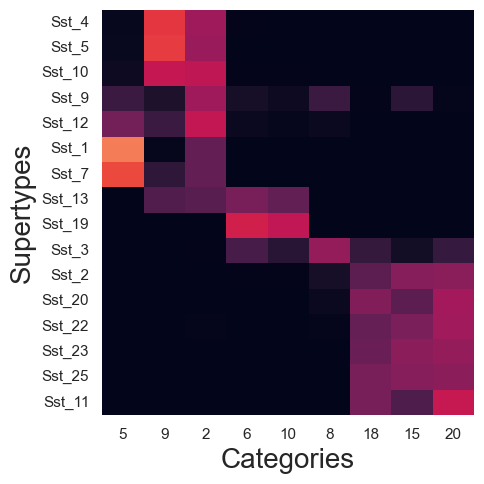

In [11]:

for arm in range(n_arm):
    fig = plt.figure(figsize=(5, 5), dpi=100)
    ax = fig.add_subplot()
    sns.set(font_scale=1.)
    sns.heatmap(np.squeeze(confm[arm, :, cat_indx].T), vmin=0, xticklabels=categories[cat_indx], 
                yticklabels=T_class[class_reord], vmax=1, ax=ax, cbar=False)
    ax.set_ylabel('Supertypes', fontsize=20)
    ax.set_xlabel('Categories', fontsize=20)
    fig.tight_layout()
    plt.savefig(saving_folder + '/confmax_' + subclass + '_arm_' + str(arm) + '.png', dpi=600)

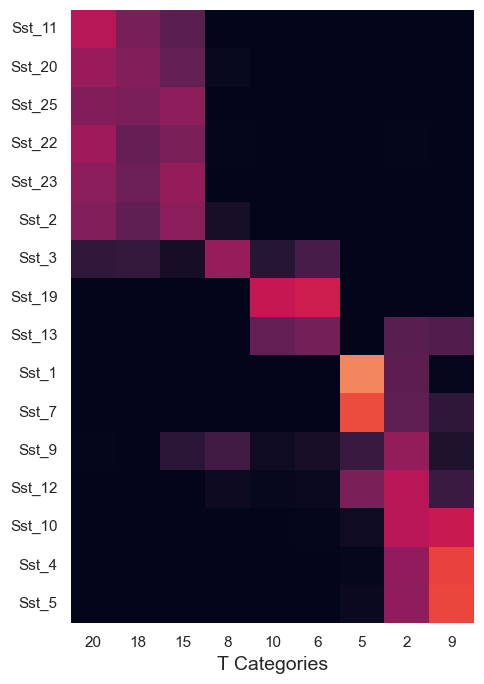

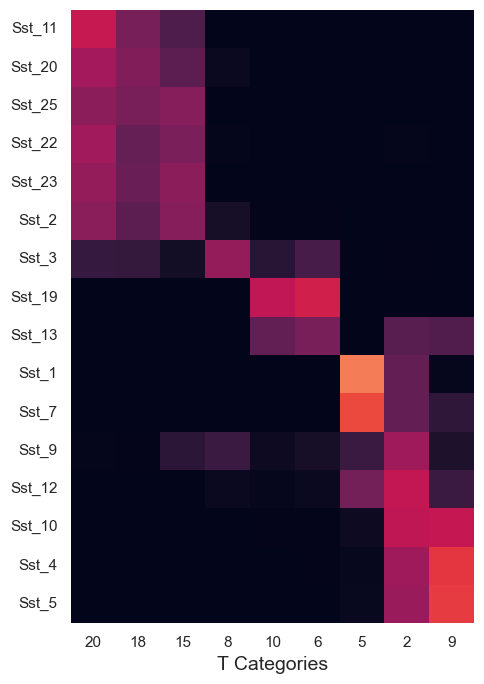

In [12]:
from sklearn.metrics import confusion_matrix

true_label = np.argmax(data['c_p'], axis=1)
T_class_ord = []
for i_tl, tl in enumerate(np.unique(true_label)):
    T_class_ord.append(data['supertype_scANVI'][true_label == tl][0])

T_class = np.array(T_class)
T_class_ord = np.array(T_class_ord)

class_reord = np.array([3,8,11,9,10,7,12,6,5,1,15,16,4,2,13,14])
class_reord = (class_reord - 1).astype(int)

for arm in range(n_arm):
    categories = np.argmax(outcome['q_c'][-1][arm,:,:], axis=1)
    tmp_cat = np.unique(outcome['pred_label'][-1][arm]).astype(int)
    uniq_categories = np.unique(categories)
    prediction = np.zeros(len(categories))

    for ic, c in enumerate(uniq_categories):
        tmp_idx = np.where(categories == c)[0]
        prediction[tmp_idx] = ic

    conf_mat_sk = confusion_matrix(true_label , prediction, normalize='true')
    conf_mat_sk = conf_mat_sk[:, :model_order]
    conf_mat_sk = conf_mat_sk[class_reord,:]
    conf_row_ind, conf_col_ind = linear_sum_assignment(1 - conf_mat_sk)
   
    fig = plt.figure(figsize=(5, 7), dpi=100)
    ax = fig.add_subplot()
    sns.set(font_scale=1.)
    sns.heatmap(conf_mat_sk[:, conf_col_ind], xticklabels=tmp_cat[conf_col_ind],
                yticklabels=T_class_ord[class_reord], vmin=0, vmax=1, ax=ax, cbar=False)
    
    ax.set_xlabel('T Categories', fontsize=14)
    fig.tight_layout()
    plt.savefig(saving_folder + f'/mi_{subclass}_K_{model_order}_arm_{arm}.png', dpi=600)


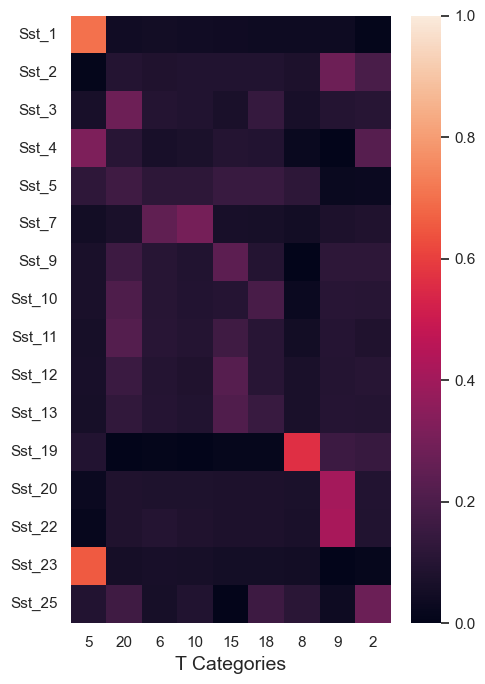

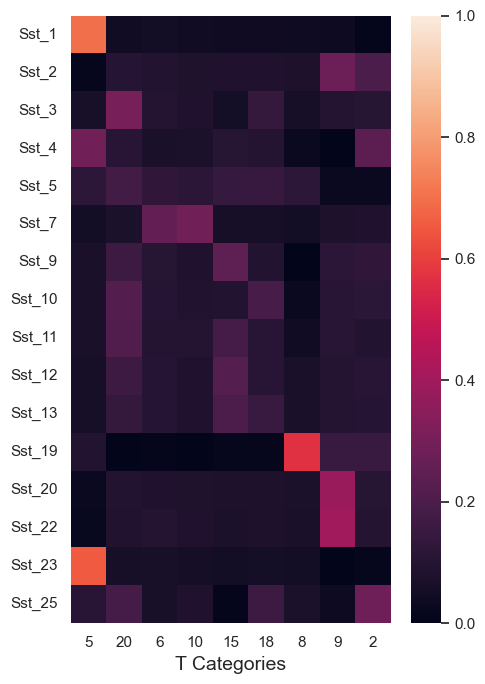

In [35]:
from sklearn.metrics import mutual_info_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data['supertype_scANVI'])
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
# data['c_onehot'] = onehot_encoder.fit_transform(integer_encoded)
onehot_label = onehot_encoder.fit_transform(integer_encoded)

mi_ind = []
for arm in range(n_arm):
    categories = np.argmax(outcome['q_c'][-1][arm,:,:], axis=1)
    tmp_cat = np.unique(outcome['pred_label'][-1][arm]).astype(int)
    uniq_categories = np.unique(categories)
    prediction = np.zeros(len(categories))
    mi_mat = np.zeros((len(T_class), model_order))

    for ic, c in enumerate(uniq_categories):
        tmp_idx = np.where(categories == c)[0]
        prediction[tmp_idx] = ic

    for c in range(model_order):
        per_c_label = np.zeros(len(true_label))
        per_c_label[prediction == c] = 1
        for f in range(len(T_class)):
            mi_mat[f, c] = adjusted_mutual_info_score(onehot_label[:, f], per_c_label)

    mi_mat_norm = normalize(mi_mat, axis=1, norm='l1')
    mi_row_ind, mi_col_ind = linear_sum_assignment(1 - mi_mat_norm)
    mi_ind.append(mi_col_ind)
    fig = plt.figure(figsize=(5, 7), dpi=100)
    ax = fig.add_subplot()
    sns.set(font_scale=1.)
    sns.heatmap(mi_mat_norm[:, mi_col_ind], xticklabels=tmp_cat[mi_col_ind], yticklabels=T_class, 
                vmin=0, vmax=1, ax=ax, cbar_kws={"shrink": 1})

    ax.set_xlabel('T Categories', fontsize=14)
    fig.tight_layout()
    plt.show()

In [14]:
cat_indx

array([1, 4, 0, 2, 5, 3, 7, 6, 8])

In [18]:
sum_dict = {}
sum_dict['conf_mat'] =  perform_mat[:, cat_indx]
sum_dict['T_class'] = T_class_ord[class_reord]
sum_dict['n_cat'] = model_order
sum_dict['conf_mat_norm'] = conf_mat_sk[:, conf_col_ind]
sum_dict['c'] = tmp_cat[conf_col_ind]
sum_dict['MI_c'] = conf_col_ind
sum_dict['df_ps'] = df_ps_time
sum_dict['df_pc'] = df_c_time
f = open(saving_folder + f'/summary_SstsuperTypes.p', "wb")
pickle.dump(sum_dict, f)
f.close()

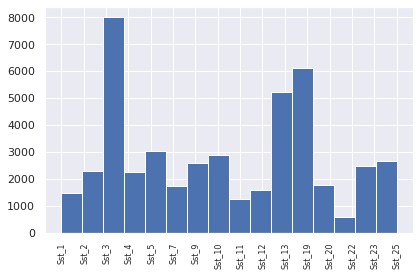

[1483, 2286, 7985, 2250, 3035, 1731, 2578, 2879, 1261, 1596, 5222, 6093, 1751, 599, 2465, 2658] 45872


In [25]:
plt.figure()
plt.hist(data['label'], bins=len(T_class))
    
plt.xticks(uniq_labels, T_class, fontsize=8, rotation=90)
plt.tight_layout()
plt.savefig(saving_folder + '/subclass_posterior.png', dpi=600)
plt.show()
print(num_Tclass, sum(num_Tclass))

In [7]:
# path = os.getcwd()
ps_time_path = path + '/data/pseudotime.npy'
ps_time = np.load(ps_time_path)
data['ps_time'] = np.zeros(len(data['label']))
for idonor, donor in enumerate(np.unique(data['external_donor_name'])):
    idx0 = np.where(data['external_donor_name'] == donor)[0]
    n_donor = int(donor[donor.find(' ')+1:])
    idx1 = np.where(ps_time[0, :].astype(int) == n_donor)[0]
    data['ps_time'][idx0] = ps_time[1, idx1][0]

data['ps_time']

array([0.07148746, 0.07148746, 0.07148746, ..., 0.85038367, 0.85038367,
       0.85038367])

In [23]:
from utils.state_analysis import state_analyzer
from sklearn.model_selection import KFold
from scipy.stats import pearsonr
import pandas as pd

path = os.getcwd()
n_run = 1
folder_name = f'{subclass}_run_{n_run}_K_{n_categories}_Sdim_{state_dim}_ngene_{n_gene}_fcDim_{fc_dim}_latDim_{latent_dim}_lr_{lr}_pDrop_{p_drop}_n_arm_{n_arm}_tau_{tau}_bsize_{batch_size}_nepoch_{n_epoch}_nepochP_{n_epoch_p}'
saving_folder = path + "/results/"
saving_folder = saving_folder + str(folder_name)

arm = 1
seed = 100
kfold = 10
state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, :]
s_idx = outcome['sample_id'][-1].astype(int)
cat = np.unique(pred_type)
supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
metadata = 'ps_time'
    
uniq_score = np.unique(data[metadata])
uniq_donor = np.array([data['external_donor_name'][data[metadata]==u_m][0] for u_m in uniq_score])

df_ps_time = pd.DataFrame()
df_ps_time['c'] = np.zeros(len(cat))
df_ps_time['supertype'] = np.zeros(len(cat))
df_ps_time['pearson_corr'] = np.zeros(len(cat))
df_ps_time['mse'] = np.zeros(len(cat))

overall_cell_ps = []
d_mild = []
d_sever = []

for i_c, c in enumerate(cat):
    print(c)
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t == tt) for tt in uniq_ref_t]
    num_types = [sum(supertypes == tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, uniq_ref_t[np.argmax(norm_count)])
    x = state[idx, :]
    y = meta_y
    donors = tmp_donors
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            trained_model
            classifier.load_model(trained_model)
#             f = open(saving_folder + '/summary_' + metadata + '_fold_' + str(m) + '_cat_' + str(int(c))+ '.p', "rb")
#             data_dict = pickle.load(f)
#             f.close()
#             indx = data_dict['sample_indx'].astype(int)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            meta_true.append(eval_dict[-1]['metadata'])
            meta_pred.append(eval_dict[-1]['prediction'])
            error.append(np.mean(np.abs(eval_dict[-1]['metadata'] - eval_dict[-1]['prediction'])))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []
        num_cells = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            num_cells.append(len(d_idx))
            xtick.append(f'{dd} ({len(d_idx)})')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(-10)
                meta_true_std.append(0)
                meta_pred_mean.append(-10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)

        tmp = meta_true_mean[meta_true_mean > 0]
        mild = np.where(tmp > 0.5)[0] 
        sever = np.where(tmp > 0.8)[0] 
        d_mild.append(x[mild[0]])
        d_sever.append(x[sever[0]])

        x = np.arange(len(uniq_donor))
        plt.figure(figsize=[15, 5],dpi=100)
        plt.errorbar(x, meta_true_mean,  yerr = meta_true_std, linestyle='None',  marker='s', mfc='Navy',
        mec='Navy',  capsize=3,  ecolor='Navy', label='Ref.')
        # plt.plot(x, y0, '--', color='black')
        plt.errorbar(x, meta_pred_mean,  yerr = meta_pred_std, linestyle='None',  fmt='ob',  capsize=3,  ecolor='b', label='Pred.')
        # plt.plot(x, y1, '-', color='blue')
        plt.xticks(x, xtick, rotation=90, fontsize=8)
        plt.xlim([-.5, np.max(x)+1])
        plt.ylim([-0.1, np.max(y)+0.1*np.max(y)])
        plt.legend()
        plt.title(f'C-type: {int(c)} (Supertype: {uniq_ref_t[np.argmax(norm_count)]})')
        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
        plt.savefig(saving_folder + '/ps_time_' + str(int(c)) + '_' + stype[stype.find('_')+1:] + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_mean[meta_pred_mean > 0]
        y_true = meta_true_mean[meta_pred_mean > 0]
        df_ps_time['c'][i_c] = int(c)
        df_ps_time['supertype'][i_c] = uniq_ref_t[np.argmax(norm_count)]
        corr, _ = pearsonr(y_true, y_pred)
        print('Pearsons correlation: %.3f' % corr)
        df_ps_time['pearson_corr'][i_c] = corr
        df_ps_time['mse'][i_c] = np.mean((y_pred - y_true)**2)
        overall_cell_ps.append(np.array(num_cells))

2.0
2.0 Sst_12
using CPU ...
quit
5.0
5.0 Sst_1
using CPU ...
quit
6.0
6.0 Sst_19
using CPU ...
quit
8.0
8.0 Sst_3
using CPU ...
quit
9.0
9.0 Sst_5
using CPU ...
quit
10.0
10.0 Sst_19
using CPU ...
quit
15.0
15.0 Sst_23
using CPU ...
quit
18.0
18.0 Sst_20
using CPU ...
quit
20.0
20.0 Sst_11
using CPU ...
quit


In [25]:
df_ps_time

c supertype  pearson_corr       mse
0   2.0    Sst_10      0.642975  0.038144
1   5.0     Sst_1      0.718571  0.031128
2   6.0    Sst_19      0.707838  0.030992
3   8.0     Sst_3      0.589110  0.040009
4   9.0     Sst_5      0.719624  0.030433
5  10.0    Sst_19      0.673004  0.033454
6  15.0    Sst_23      0.631215  0.038918
7  18.0    Sst_20      0.749680  0.029952
8  20.0    Sst_11      0.695725  0.032442

2.0
2.0 Sst_10
using CPU ...
Total loss: 0.039545669220387936
Total loss: 0.07856461964547634
Total loss: 0.036303574685007334
Total loss: 0.036537793930619955
Total loss: 0.03794184327125549
Total loss: 0.07468290161341429
Total loss: 0.04011549148708582
Total loss: 0.04042341187596321
Total loss: 0.03522740164771676
Total loss: 0.07615932170301676


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:123: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


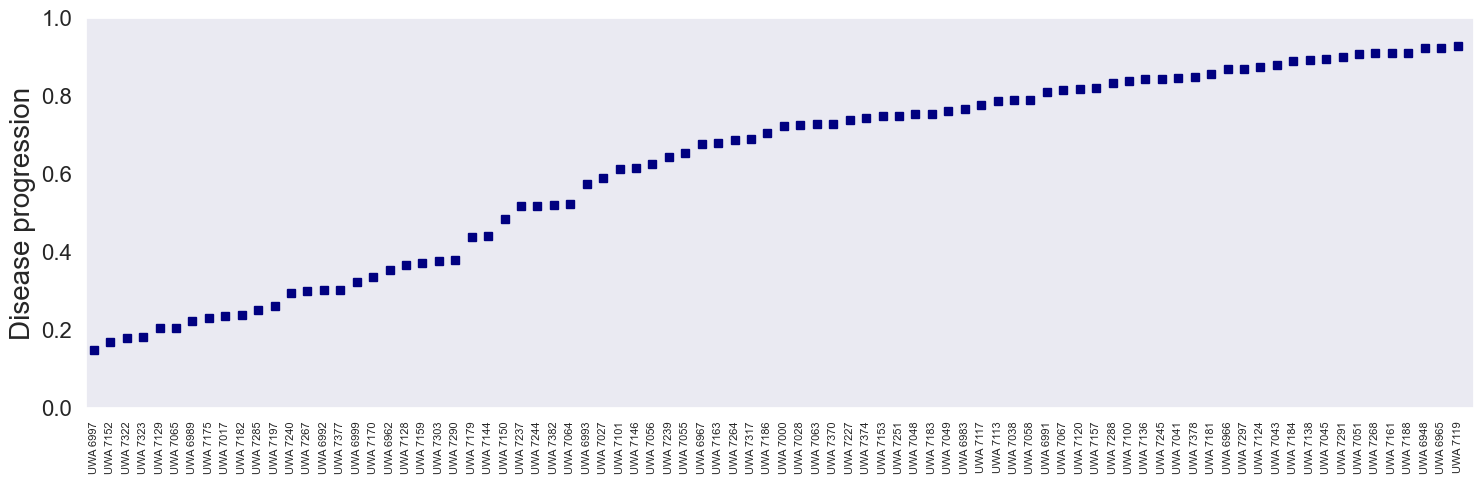

Pearsons correlation: 0.700
5.0


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

5.0 Sst_1
using CPU ...
Total loss: 0.03501283936202526
Total loss: 0.036698343232274055
Total loss: 0.041398730129003525
Total loss: 0.036444337107241154
Total loss: 0.03602506220340729
Total loss: 0.0330673698335886
Total loss: 0.03784759063273668
Total loss: 0.040284134447574615
Total loss: 0.04451705887913704
Total loss: 0.03255046717822552


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:123: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


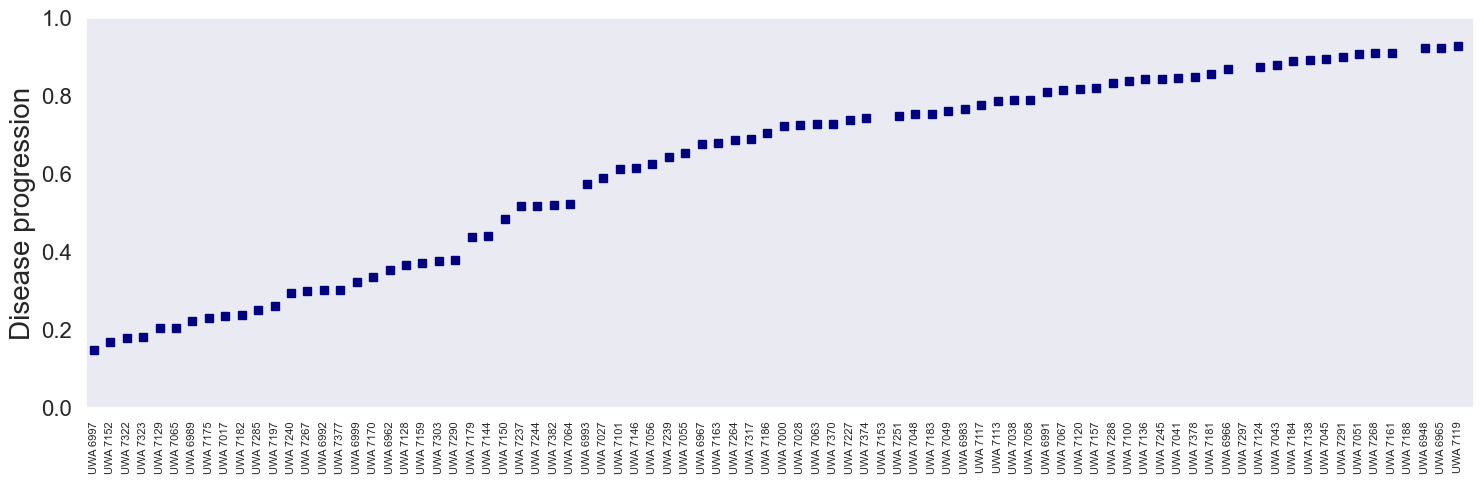

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Pearsons correlation: 0.996
6.0
6.0 Sst_19
using CPU ...
Total loss: 0.042684424202889204
Total loss: 0.04638738697394729
Total loss: 0.04533322574570775
Total loss: 0.04037561872974038
Total loss: 0.04058922128751874
Total loss: 0.04973581479862332
Total loss: 0.03851226205006242
Total loss: 0.043831799644976854
Total loss: 0.04127580113708973
Total loss: 0.04457599949091673


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:123: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


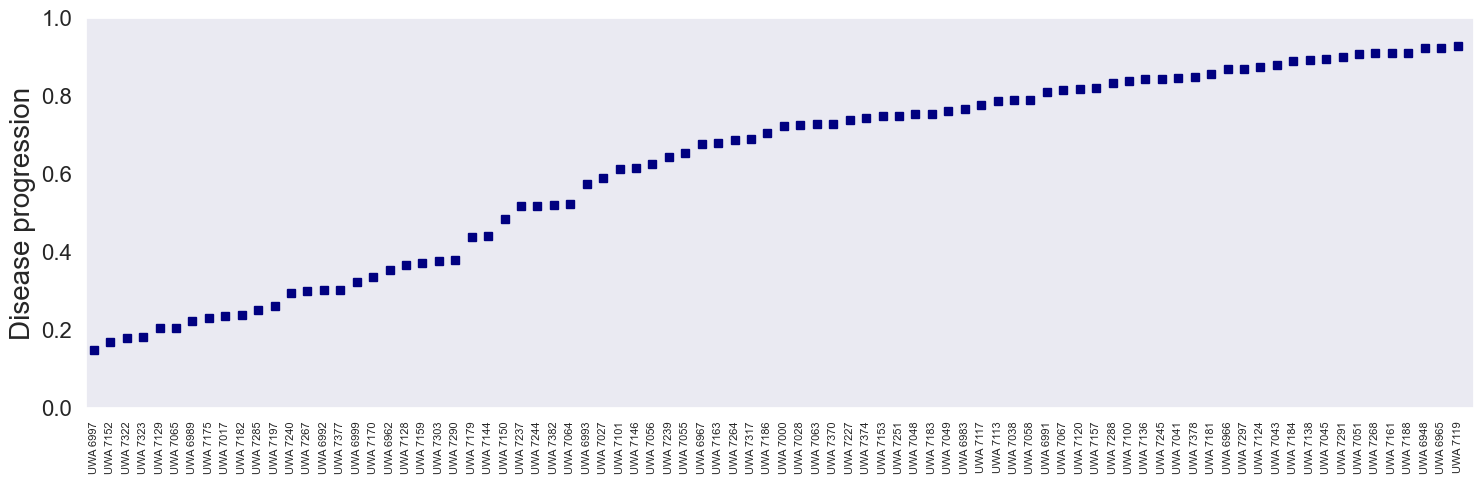

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Pearsons correlation: 0.708
8.0
8.0 Sst_3
using CPU ...
Total loss: 0.03996380418539047
Total loss: 0.034326931461691856
Total loss: 0.03528030402958393
Total loss: 0.0343667883425951
Total loss: 0.038095494732260704
Total loss: 0.03765443526208401
Total loss: 0.0387650765478611
Total loss: 0.043133026920259
Total loss: 0.03607460390776396
Total loss: 0.03568300884217024


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:123: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


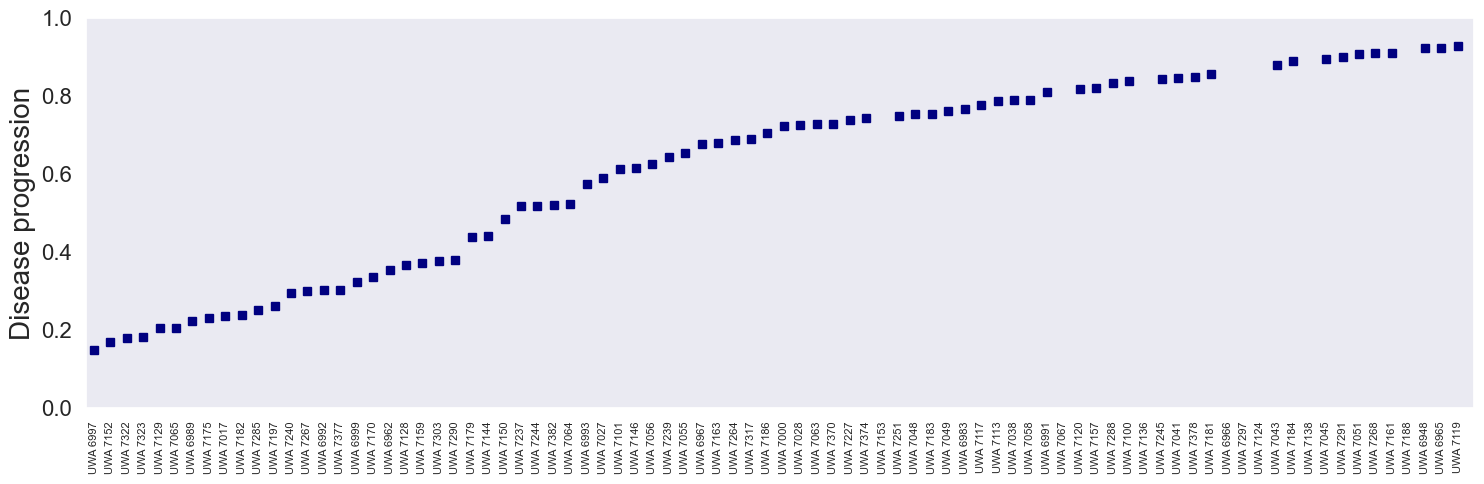

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Pearsons correlation: 0.998
9.0
9.0 Sst_5
using CPU ...
Total loss: 0.04895174829289317
Total loss: 0.03883238648995757
Total loss: 0.03802034351974726
Total loss: 0.04611587943509221
Total loss: 0.04482497717253864
Total loss: 0.041232714895159006
Total loss: 0.03779972484335303
Total loss: 0.03776261117309332
Total loss: 0.04418351734057069
Total loss: 0.043829651549458504


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:123: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


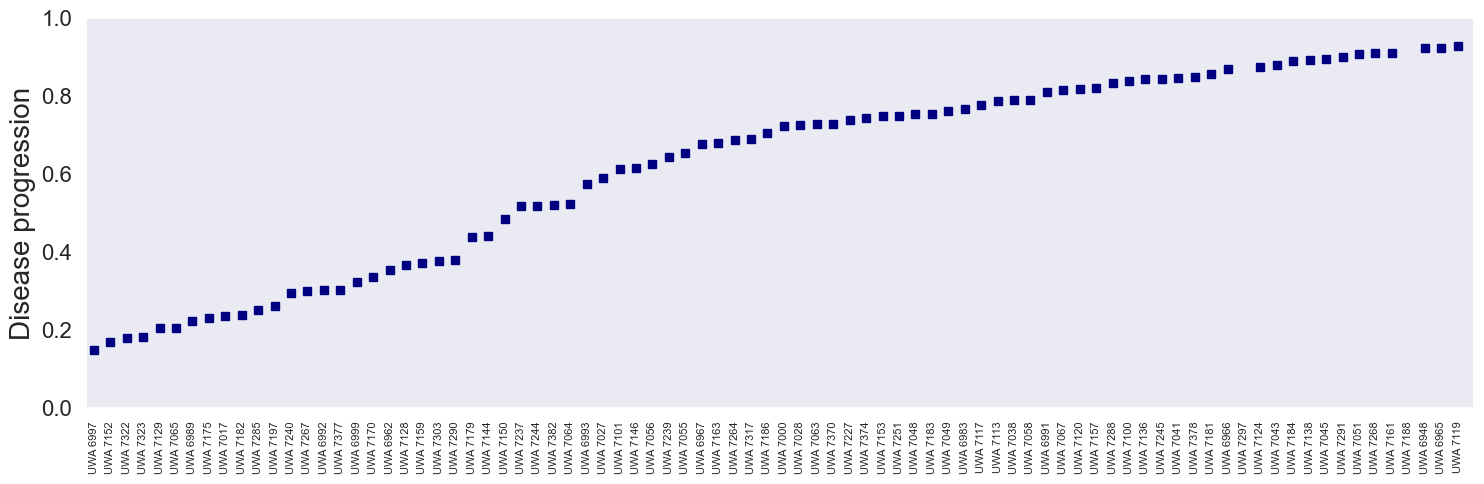

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Pearsons correlation: 0.994
10.0
10.0 Sst_19
using CPU ...
Total loss: 0.03438234205047289
Total loss: 0.03322607775529226
Total loss: 0.03435391436020533
Total loss: 0.03721379737059275
Total loss: 0.03451924833158652
Total loss: 0.03396749310195446
Total loss: 0.0349265243858099
Total loss: 0.03449058532714844
Total loss: 0.034221203376849495
Total loss: 0.03724988363683224


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:123: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


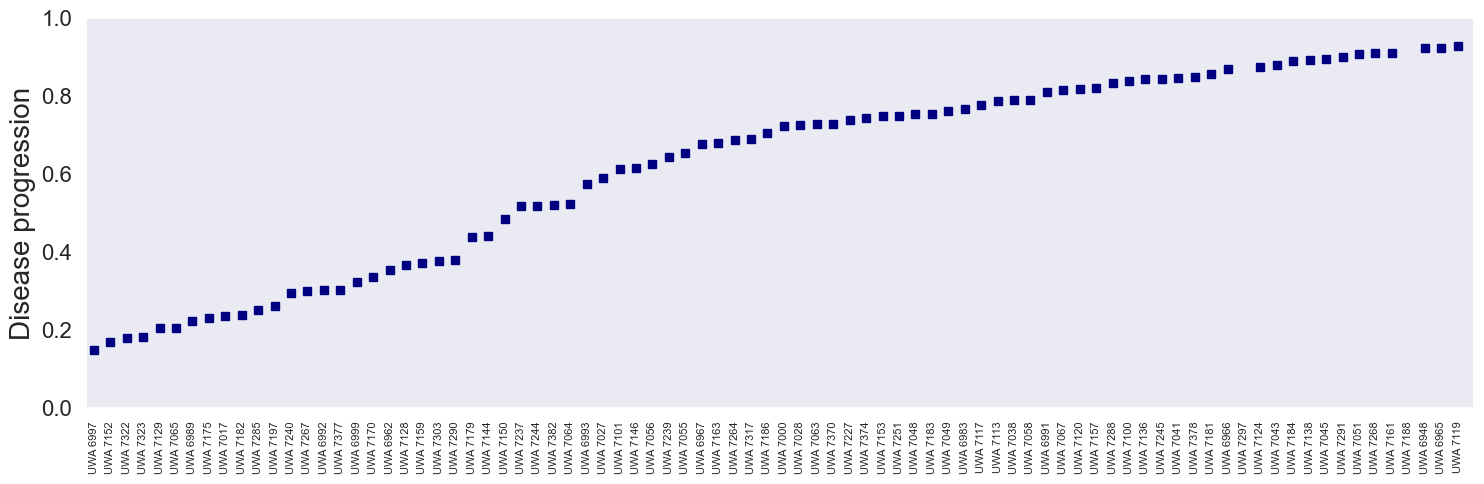

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Pearsons correlation: 0.994
15.0
15.0 Sst_23
using CPU ...
Total loss: 0.02973030072947343
Total loss: 0.024298505935197074
Total loss: 0.030675043041507404
Total loss: 0.027665752607087295
Total loss: 0.02331068894515435
Total loss: 0.027892520961662132
Total loss: 0.023502064713587362
Total loss: 0.024522198208918173
Total loss: 0.02311499168475469
Total loss: 0.02887524478137493


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:123: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


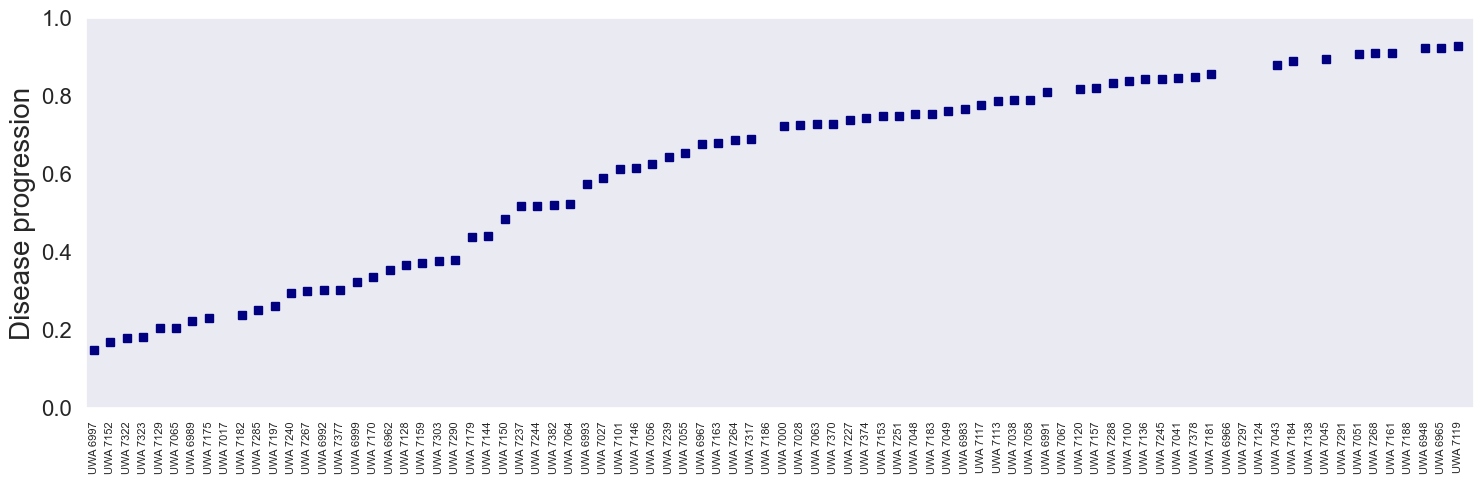

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Pearsons correlation: 0.998
18.0
18.0 Sst_20
using CPU ...
Total loss: 0.0574108324944973
Total loss: 0.05724395687381426
Total loss: 0.05010143046577772
Total loss: 0.05593583236138026
Total loss: 0.05217806125680605
Total loss: 0.04912178715070089
Total loss: 0.049442945048213005
Total loss: 0.05611178899804751
Total loss: 0.0601310059428215
Total loss: 0.053207848221063614


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:123: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


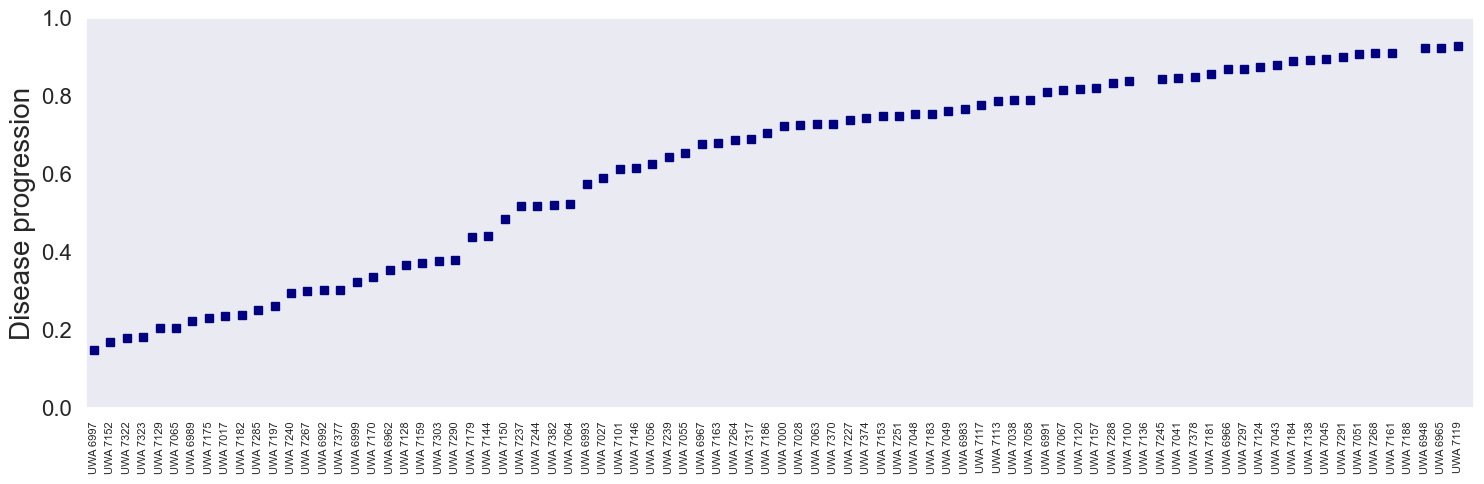

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Pearsons correlation: 0.994
20.0
20.0 Sst_11
using CPU ...
Total loss: 0.040570138643185295
Total loss: 0.04165079568823179
Total loss: 0.040425473203261696
Total loss: 0.03922645685573419
Total loss: 0.04433001267413298
Total loss: 0.03942714693645636
Total loss: 0.03953591175377369
Total loss: 0.036653367802500725
Total loss: 0.04656476341187954
Total loss: 0.042589701091249786


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:123: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


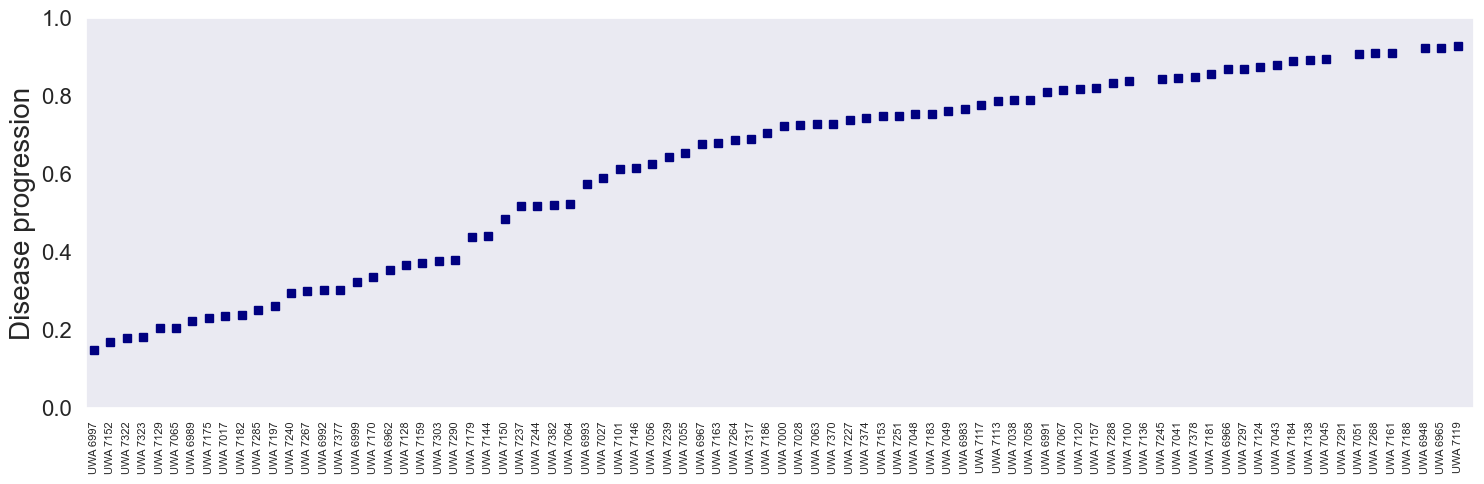

Pearsons correlation: 0.996


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

In [17]:
from utils.state_analysis import state_analyzer
from sklearn.model_selection import KFold
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
import pandas as pd


fontsize = 28
arm = 0
seed = 100
kfold = 10
state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, :]
s_idx = outcome['sample_id'][-1].astype(int)
cat = np.unique(pred_type)
supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
metadata = 'ps_time'
    
uniq_score = np.unique(data[metadata])
uniq_donor = np.array([data['external_donor_name'][data[metadata]==u_m][0] for u_m in uniq_score])

df_ps_time = pd.DataFrame()
df_ps_time['c'] = np.zeros(len(cat))
df_ps_time['supertype'] = np.zeros(len(cat))
df_ps_time['pearson_corr'] = np.zeros(len(cat))
df_ps_time['r2'] = np.zeros(len(cat))
df_ps_time['mse'] = np.zeros(len(cat))
df_ps_time['p_val'] = np.zeros(len(cat))

overall_cell_ps = []
        
for i_c, c in enumerate(cat):
    print(c)
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t == tt) for tt in uniq_ref_t]
    num_types = [sum(supertypes == tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, uniq_ref_t[np.argmax(norm_count)])
    x = state[idx, :]
    y = meta_y
    donors = tmp_donors
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            trained_model
            classifier.load_model(trained_model)
#             f = open(saving_folder + '/summary_' + metadata + '_fold_' + str(m) + '_cat_' + str(int(c))+ '.p', "rb")
#             data_dict = pickle.load(f)
#             f.close()
#             indx = data_dict['sample_indx'].astype(int)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            meta_true.append(eval_dict[-1]['metadata'])
            meta_pred.append(eval_dict[-1]['prediction'])
            error.append(np.mean(np.abs(eval_dict[-1]['metadata'] - eval_dict[-1]['prediction'])))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []
        num_cells = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            num_cells.append(len(d_idx))
            xtick.append(f'{dd}')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(-10)
                meta_true_std.append(0)
                meta_pred_mean.append(-10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)
        
        meta_true_mean = 1 - meta_true_mean
        meta_pred_mean = 1 - meta_pred_mean
        x = np.arange(len(uniq_donor))
        meta_true_mean = meta_true_mean[::-1]
        meta_pred_mean = meta_pred_mean[::-1]
        meta_pred_std = meta_pred_std[::-1]
        xtick = np.array(xtick)[::-1]
        plt.figure(figsize=[15, 5],dpi=100)
#         plt.errorbar(x, meta_true_mean[::-1],  yerr = 0. * meta_true_std[::-1], linestyle='None',  marker='s', markersize=3,
#                      mfc='Navy', mec='Navy',  capsize=1,  ecolor='Navy', label='DP')
        plt.plot(x, meta_true_mean, linestyle='None',  marker='s', markersize=6, color='Navy', label='True')
#         plt.errorbar(x, meta_pred_mean, yerr=meta_pred_std, linestyle='None',  fmt='ob',  
#                      markersize=7, capsize=3,  ecolor='b', label='Pred.')
        
            
        plt.grid(b=None)
        plt.xticks(x, xtick, rotation=90, fontsize=8)
        plt.yticks(fontsize=16)
#         plt.xlabel('Donors', fontsize=fontsize-2)
        plt.ylabel('Disease progression',fontsize=20)
        plt.xlim([-.5, np.max(x)+1])
        plt.ylim([0., 1])
#         plt.legend(fontsize=20, loc='lower right')
        
        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
#         plt.savefig(saving_folder + '/qs_time_' + str(int(c)) + '_arm_' + str(arm) + '.png', dpi=600)
        plt.savefig(saving_folder + '/ps_time.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_mean[meta_pred_mean > 0]
        y_true = meta_true_mean[meta_pred_mean > 0]
        df_ps_time['c'][i_c] = int(c)
        df_ps_time['supertype'][i_c] = uniq_ref_t[np.argmax(norm_count)]
        corr, p_val = pearsonr(y_true, y_pred)
        print('Pearsons correlation: %.3f' % corr)
        df_ps_time['pearson_corr'][i_c] = corr
        df_ps_time['p_val'][i_c] = p_val
        df_ps_time['r2'][i_c] = r2_score(y_true, y_pred)
        df_ps_time['mse'][i_c] = np.mean((y_pred - y_true)**2)
        overall_cell_ps.append(np.array(num_cells))


In [36]:
df_ps_time

c supertype  pearson_corr        r2       mse          p_val
0   2.0    Sst_10      0.700171  0.441095  0.033477   1.245347e-13
1   5.0     Sst_1      0.996027  0.992045  0.030017   6.556124e-88
2   6.0    Sst_19      0.707838  0.482575  0.030992   5.124532e-14
3   8.0     Sst_3      0.998077  0.996141  0.036199  8.245744e-101
4   9.0     Sst_5      0.994194  0.988417  0.029709   3.592232e-81
5  10.0    Sst_19      0.993691  0.987268  0.032658   1.072533e-79
6  15.0    Sst_23      0.998455  0.996658  0.034748  1.047332e-104
7  18.0    Sst_20      0.994328  0.988600  0.029239   1.381416e-81
8  20.0    Sst_11      0.995955  0.991711  0.031283   1.370987e-87

2.0
2.0 Sst_10
using CPU ...
Total loss: 0.039545669220387936
Total loss: 0.07856461964547634
Total loss: 0.036303574685007334
Total loss: 0.036537793930619955
Total loss: 0.03794184327125549
Total loss: 0.07468290161341429
Total loss: 0.04011549148708582
Total loss: 0.04042341187596321
Total loss: 0.03522740164771676
Total loss: 0.07615932170301676


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:149: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


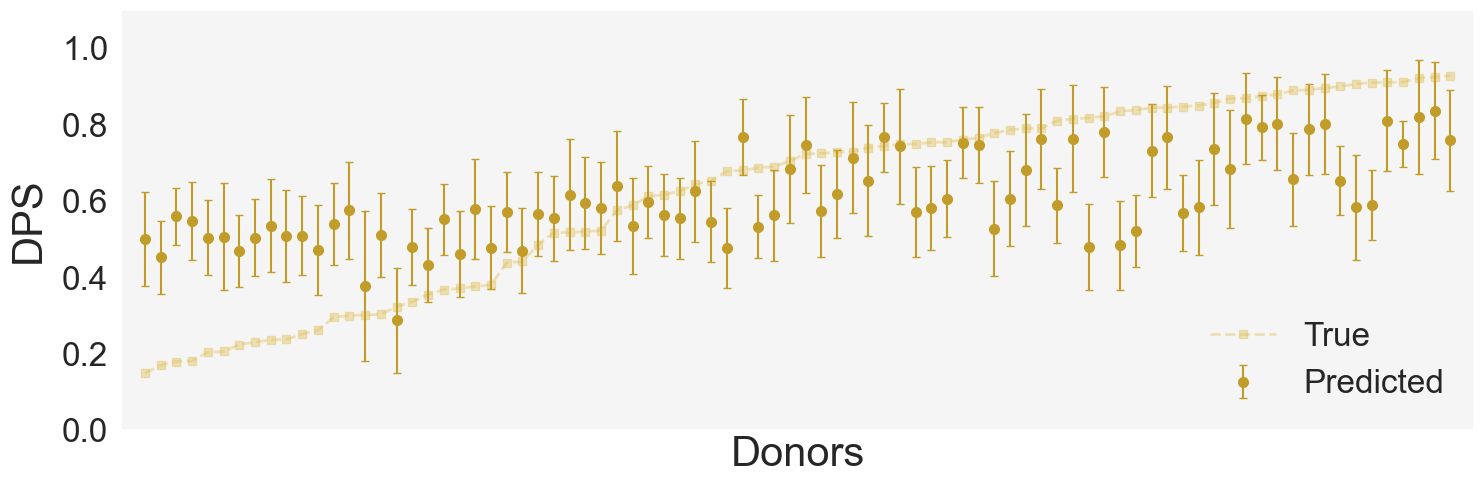

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Pearsons correlation: 0.700
5.0
5.0 Sst_1
using CPU ...
Total loss: 0.03501283936202526
Total loss: 0.036698343232274055
Total loss: 0.041398730129003525
Total loss: 0.036444337107241154
Total loss: 0.03602506220340729
Total loss: 0.0330673698335886
Total loss: 0.03784759063273668
Total loss: 0.040284134447574615
Total loss: 0.04451705887913704
Total loss: 0.03255046717822552


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:149: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


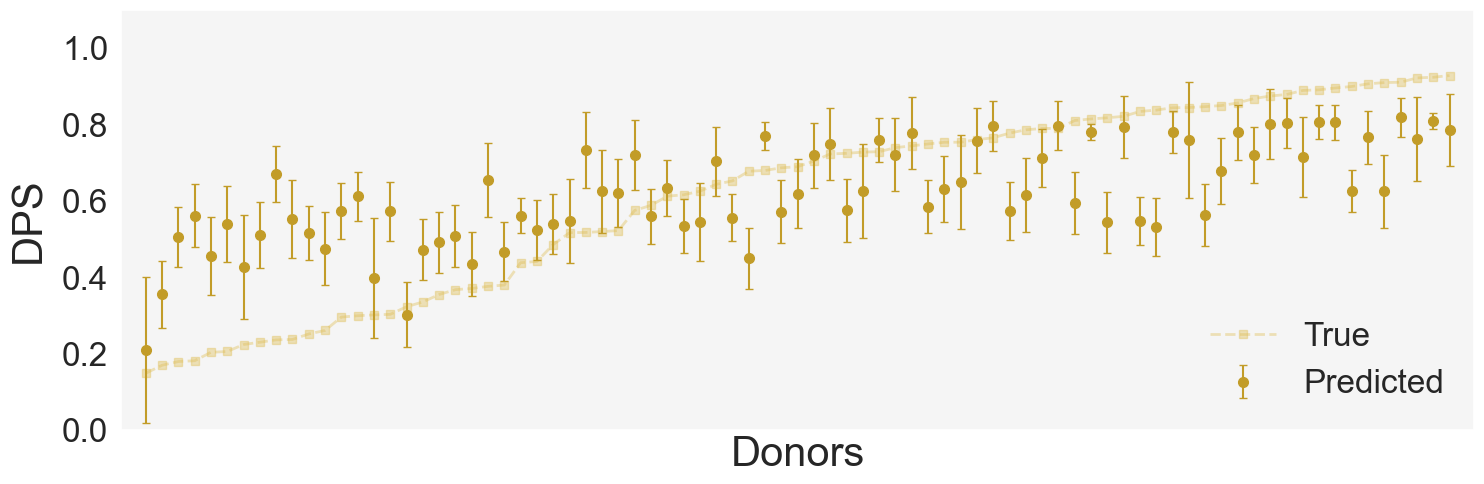

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Pearsons correlation: 0.719
6.0
6.0 Sst_19
using CPU ...
Total loss: 0.042684424202889204
Total loss: 0.04638738697394729
Total loss: 0.04533322574570775
Total loss: 0.04037561872974038
Total loss: 0.04058922128751874
Total loss: 0.04973581479862332
Total loss: 0.03851226205006242
Total loss: 0.043831799644976854
Total loss: 0.04127580113708973
Total loss: 0.04457599949091673


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:149: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


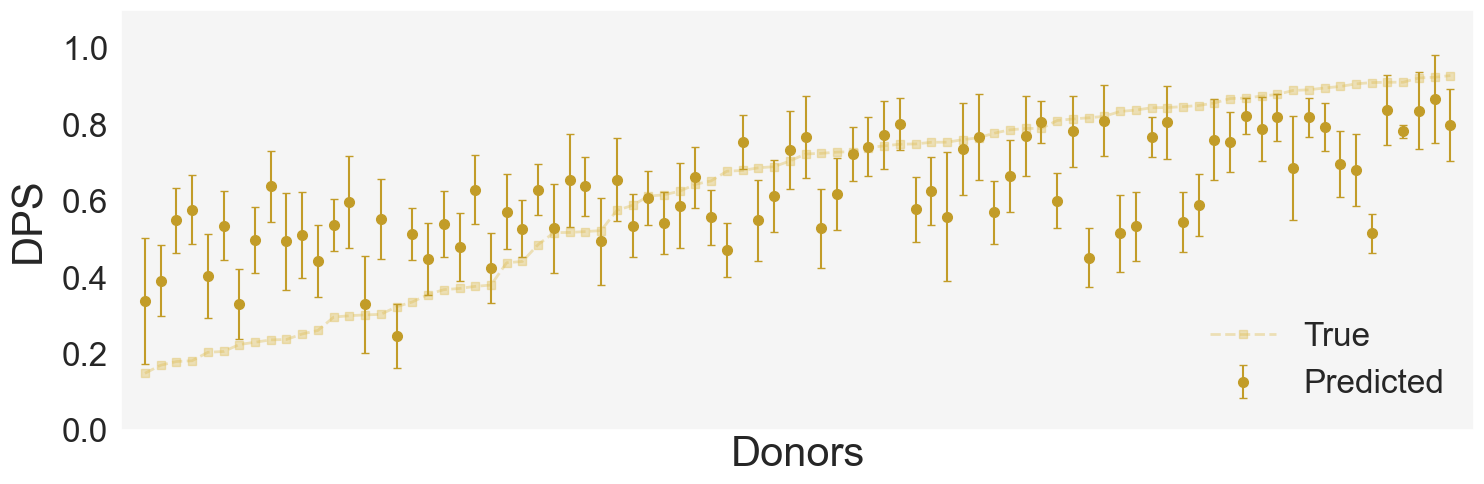

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Pearsons correlation: 0.708
8.0
8.0 Sst_3
using CPU ...
Total loss: 0.03996380418539047
Total loss: 0.034326931461691856
Total loss: 0.03528030402958393
Total loss: 0.0343667883425951
Total loss: 0.038095494732260704
Total loss: 0.03765443526208401
Total loss: 0.0387650765478611
Total loss: 0.043133026920259
Total loss: 0.03607460390776396
Total loss: 0.03568300884217024


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:149: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


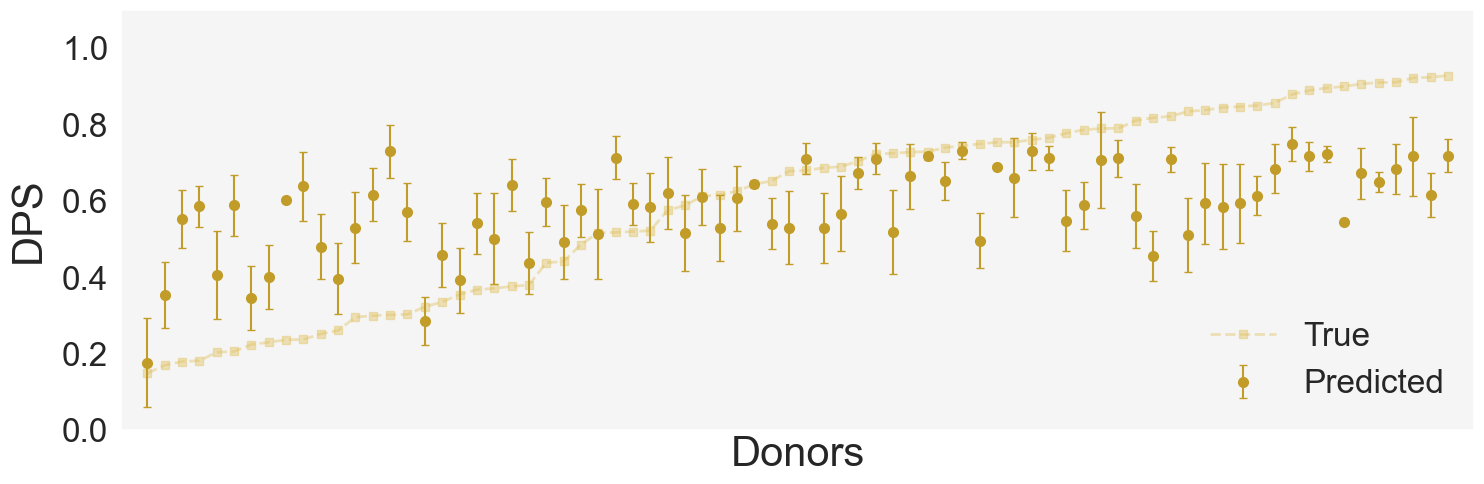

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Pearsons correlation: 0.589
9.0
9.0 Sst_5
using CPU ...
Total loss: 0.04895174829289317
Total loss: 0.03883238648995757
Total loss: 0.03802034351974726
Total loss: 0.04611587943509221
Total loss: 0.04482497717253864
Total loss: 0.041232714895159006
Total loss: 0.03779972484335303
Total loss: 0.03776261117309332
Total loss: 0.04418351734057069
Total loss: 0.043829651549458504


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:149: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


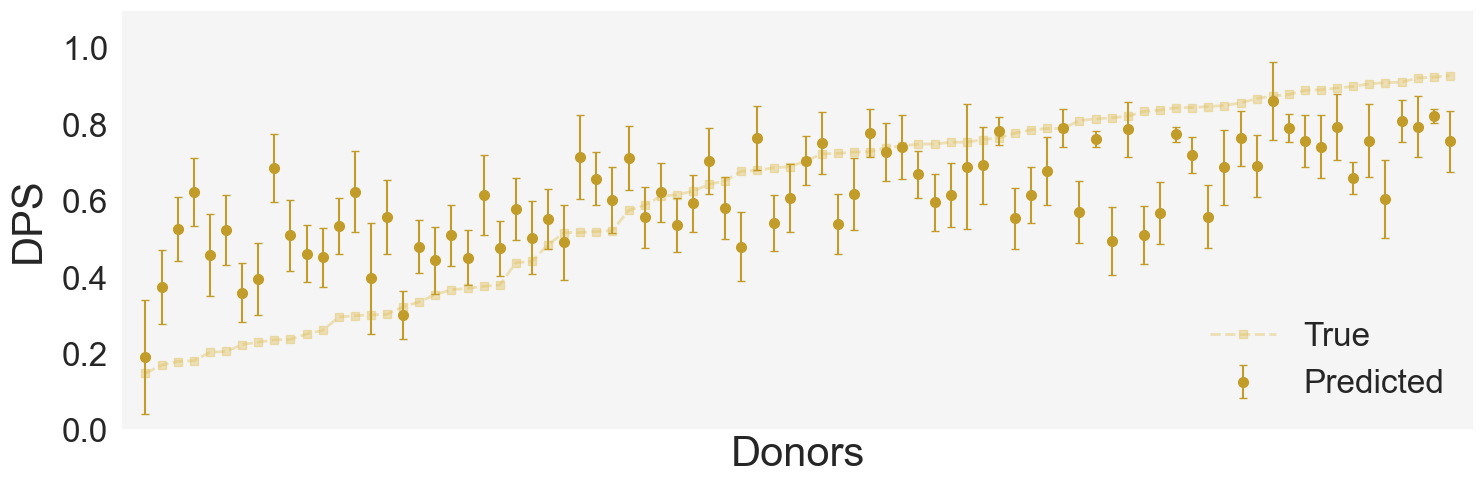

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Pearsons correlation: 0.720
10.0
10.0 Sst_19
using CPU ...
Total loss: 0.03438234205047289
Total loss: 0.03322607775529226
Total loss: 0.03435391436020533
Total loss: 0.03721379737059275
Total loss: 0.03451924833158652
Total loss: 0.03396749310195446
Total loss: 0.0349265243858099
Total loss: 0.03449058532714844
Total loss: 0.034221203376849495
Total loss: 0.03724988363683224


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:149: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


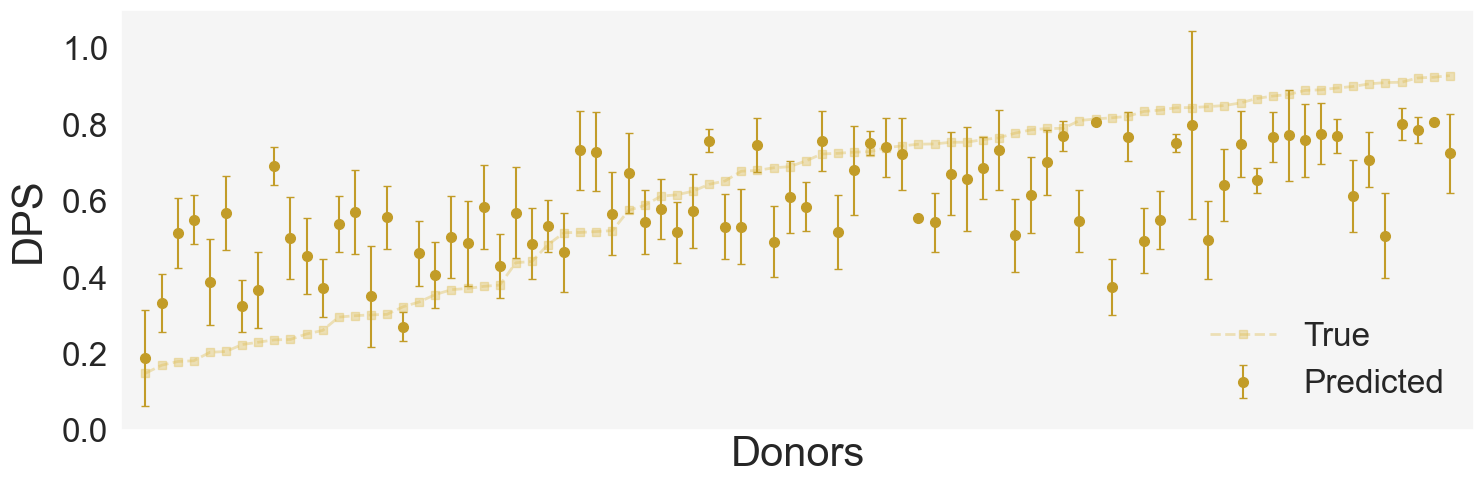

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Pearsons correlation: 0.673
15.0
15.0 Sst_23
using CPU ...
Total loss: 0.02973030072947343
Total loss: 0.024298505935197074
Total loss: 0.030675043041507404
Total loss: 0.027665752607087295
Total loss: 0.02331068894515435
Total loss: 0.027892520961662132
Total loss: 0.023502064713587362
Total loss: 0.024522198208918173
Total loss: 0.02311499168475469
Total loss: 0.02887524478137493


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:149: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


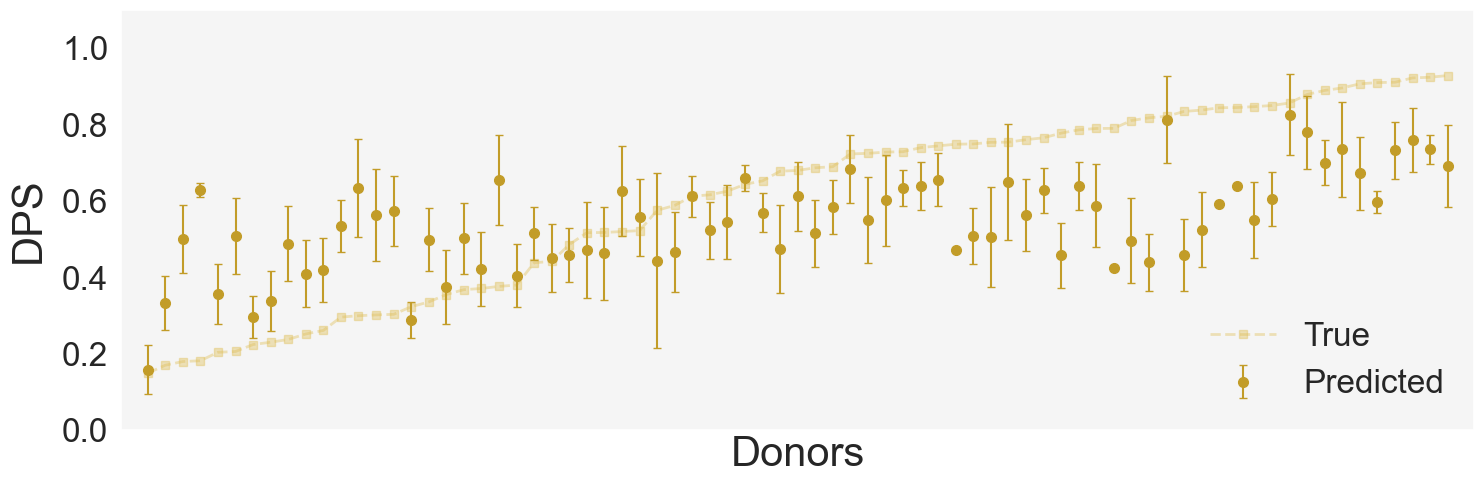

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Pearsons correlation: 0.631
18.0
18.0 Sst_20
using CPU ...
Total loss: 0.0574108324944973
Total loss: 0.05724395687381426
Total loss: 0.05010143046577772
Total loss: 0.05593583236138026
Total loss: 0.05217806125680605
Total loss: 0.04912178715070089
Total loss: 0.049442945048213005
Total loss: 0.05611178899804751
Total loss: 0.0601310059428215
Total loss: 0.053207848221063614


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:149: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


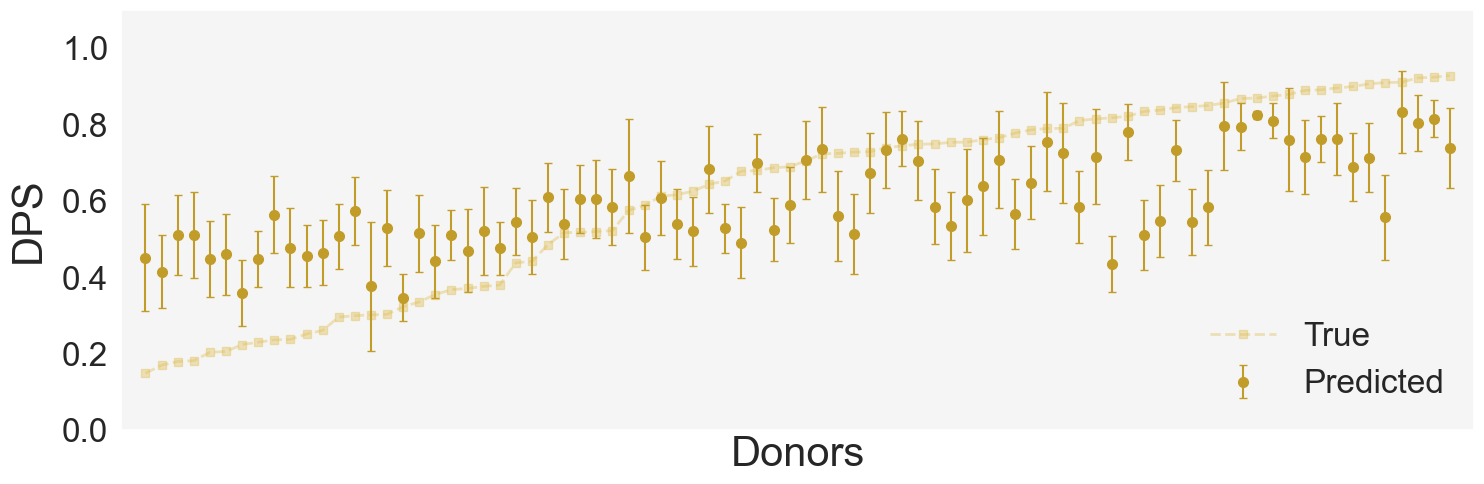

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

Pearsons correlation: 0.750
20.0
20.0 Sst_11
using CPU ...
Total loss: 0.040570138643185295
Total loss: 0.04165079568823179
Total loss: 0.040425473203261696
Total loss: 0.03922645685573419
Total loss: 0.04433001267413298
Total loss: 0.03942714693645636
Total loss: 0.03953591175377369
Total loss: 0.036653367802500725
Total loss: 0.04656476341187954
Total loss: 0.042589701091249786


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:149: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


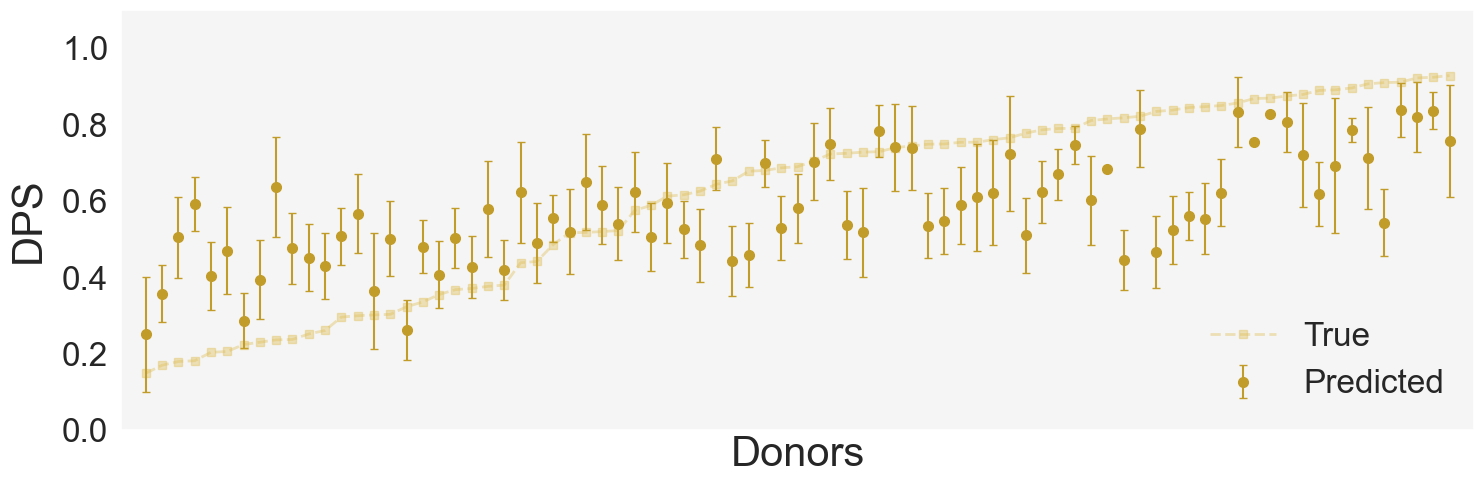

Pearsons correlation: 0.696


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/

In [14]:
from utils.state_analysis import state_analyzer
from sklearn.model_selection import KFold
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
import pandas as pd


fontsize = 28
arm = 0
seed = 100
kfold = 10
state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, :]
s_idx = outcome['sample_id'][-1].astype(int)
cat = np.unique(pred_type)
supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
metadata = 'ps_time'
    
uniq_score = np.unique(data[metadata])
uniq_donor = np.array([data['external_donor_name'][data[metadata]==u_m][0] for u_m in uniq_score])

df_ps_time = pd.DataFrame()
df_ps_time['c'] = np.zeros(len(cat))
df_ps_time['supertype'] = np.zeros(len(cat))
df_ps_time['pearson_corr_all'] = np.zeros(len(cat))
df_ps_time['r2_all'] = np.zeros(len(cat))
df_ps_time['mse_all'] = np.zeros(len(cat))
df_ps_time['pearson_corr_mean'] = np.zeros(len(cat))
df_ps_time['r2_mean'] = np.zeros(len(cat))
df_ps_time['mse_mean'] = np.zeros(len(cat))
df_ps_time['pearson_corr_std'] = np.zeros(len(cat))
df_ps_time['r2_std'] = np.zeros(len(cat))
df_ps_time['mse_std'] = np.zeros(len(cat))
df_ps_time['p_val'] = np.zeros(len(cat))

overall_cell_ps = []
d_mild = []
d_sever = []
        
for i_c, c in enumerate(cat):
    print(c)
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    p_corr = []
    r_score = []
    mse_score = []
    
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t == tt) for tt in uniq_ref_t]
    num_types = [sum(supertypes == tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, uniq_ref_t[np.argmax(norm_count)])
    x = state[idx, :]
    y = meta_y
    donors = tmp_donors
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            trained_model
            classifier.load_model(trained_model)
#             f = open(saving_folder + '/summary_' + metadata + '_fold_' + str(m) + '_cat_' + str(int(c))+ '.p', "rb")
#             data_dict = pickle.load(f)
#             f.close()
#             indx = data_dict['sample_indx'].astype(int)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            y_true = eval_dict[-1]['metadata']
            y_pred = eval_dict[-1]['prediction']
            meta_true.append(y_true)
            meta_pred.append(y_pred)
            error.append(np.mean(np.abs(y_true - y_pred)))
            corr, _ = pearsonr(y_true, y_pred)
            p_corr.append(corr)
            r_score.append(r2_score(y_true, y_pred))
            mse_score.append(np.mean((y_pred - y_true)**2))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []
        num_cells = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            num_cells.append(len(d_idx))
            xtick.append(f'{dd}')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(10)
                meta_true_std.append(0)
                meta_pred_mean.append(10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)
        
        meta_true_mean = 1 - meta_true_mean
        meta_pred_mean = 1 - meta_pred_mean
        x = np.arange(len(meta_true_mean[meta_true_mean > 0])) # np.arange(len(uniq_donor))
        meta_true_mean = meta_true_mean[::-1]
        meta_pred_mean = meta_pred_mean[::-1]
        meta_pred_std = meta_pred_std[::-1]
        xtick = np.array(xtick)[::-1]
        plt.figure(figsize=[15, 5],dpi=100)
        ax = plt.axes()
        ax.set_facecolor("whitesmoke")

        tmp = meta_true_mean[meta_true_mean > 0]
        mild = np.where(tmp > 0.5)[0] 
        sever = np.where(tmp > 0.8)[0] 
        d_mild.append(x[mild[0]])
        d_sever.append(x[sever[0]])
 
#         plt.errorbar(x, meta_true_mean[::-1],  yerr = 0. * meta_true_std[::-1], linestyle='None',  marker='s', markersize=3,
#                      mfc='Navy', mec='Navy',  capsize=1,  ecolor='Navy', label='DP')
        plt.plot(x, meta_true_mean[meta_true_mean > 0], linestyle='--',  linewidth=2, marker='s', markersize=6, color='#dfbe56', alpha=0.4, label='True')
        plt.errorbar(x, meta_pred_mean[meta_true_mean > 0], yerr=meta_pred_std[meta_true_mean > 0], linestyle='None',  marker='o', fmt='#c29c28',  
                     markersize=7, capsize=3,  ecolor='#c29c28', label='Predicted')
            
        plt.grid(b=None)
        plt.xticks([]) #(x, xtick, rotation=90, fontsize=8)
        plt.yticks(fontsize=24)
        plt.xlabel('Donors', fontsize=30)
        plt.ylabel('DPS',fontsize=30, labelpad=10)
        plt.xlim([-1.5, np.max(x)+1.5])
        plt.ylim([0., 1.1])
        plt.legend(fontsize=24, loc='lower right', frameon=False)

        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
#         plt.savefig(saving_folder + '/latest_qs_time_' + str(int(c)) + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_mean[meta_pred_mean > 0]
        y_true = meta_true_mean[meta_pred_mean > 0]
        df_ps_time['c'][i_c] = int(c)
        df_ps_time['supertype'][i_c] = uniq_ref_t[np.argmax(norm_count)]
        corr, p_val = pearsonr(y_true, y_pred)
        print('Pearsons correlation: %.3f' % corr)
        df_ps_time['pearson_corr_all'][i_c] = corr
        df_ps_time['p_val'][i_c] = p_val
        df_ps_time['r2_all'][i_c] = r2_score(y_true, y_pred)
        df_ps_time['mse_all'][i_c] = np.mean((y_pred - y_true)**2)
        df_ps_time['pearson_corr_mean'][i_c] = np.mean(p_corr)
        df_ps_time['pearson_corr_std'][i_c] = np.std(p_corr)
        df_ps_time['r2_mean'][i_c] = np.mean(r_score)
        df_ps_time['r2_std'][i_c] = np.std(r_score)
        df_ps_time['mse_mean'][i_c] = np.mean(mse_score)
        df_ps_time['mse_std'][i_c] = np.std(mse_score)
        overall_cell_ps.append(np.array(num_cells))


In [15]:
df_ps_time

c supertype  pearson_corr_all    r2_all   mse_all  pearson_corr_mean  \
0   2.0    Sst_10          0.700171  0.441095  0.033477           0.498292   
1   5.0     Sst_1          0.718571  0.481621  0.031128           0.603032   
2   6.0    Sst_19          0.707838  0.482575  0.030992           0.646376   
3   8.0     Sst_3          0.589110  0.330077  0.040009           0.581901   
4   9.0     Sst_5          0.719624  0.488858  0.030433           0.615632   
5  10.0    Sst_19          0.673004  0.438116  0.033454           0.652390   
6  15.0    Sst_23          0.631215  0.334891  0.038918           0.664193   
7  18.0    Sst_20          0.749680  0.498193  0.029952           0.513675   
8  20.0    Sst_11          0.695725  0.453941  0.032442           0.614329   

    r2_mean  mse_mean  pearson_corr_std    r2_std   mse_std         p_val  
0  0.098594  0.076803          0.175996  0.415976  0.009845  1.245347e-13  
1  0.355991  0.079413          0.043159  0.056496  0.002334  4.261774e-14  
2  0.413051  0.087763          0.023757  0.032573  0.003600  5.124532e-14  
3  0.329926  0.078853          0.021531  0.029846  0.002601  2.167833e-08  
4  0.375519  0.079655          0.032849  0.043947  0.002784  2.594727e-14  
5  0.421089  0.086548          0.012730  0.016203  0.003170  4.329056e-12  
6  0.437327  0.088980          0.030789  0.043733  0.002003  1.271000e-09  
7  0.254024  0.076118          0.037728  0.043172  0.002067  5.349212e-16  
8  0.370645  0.090081          0.029395  0.039799  0.002096  5.653456e-13

0.10693642327932862 0.26323153009053624 -1.4615703613253381 -4.711967495477054 2.7115676684150114e-05


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:81: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


0.08462147085044881 0.10237565438347296 -0.20980707797434817 -1.3235757365239855 0.1933913741528798


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:81: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


0.11490837235346316 0.20237592602405627 -0.7611939137170886 -4.105678704254176 0.00020549033524046203


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:81: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


0.10030799600735038 0.04688633904603918 0.5325762560085097 4.855635371057958 1.411959477740583e-05


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:81: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


0.12924545606622967 0.09642689637918322 0.2539242824152295 2.654881373862556 0.010726743115236526


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:81: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


0.11734458787596884 0.0675978629743322 0.42393710525634165 4.222055311281021 0.00010247511008975771


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:81: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


0.12131713157577113 0.049304993244104305 0.5935858967015731 4.215401273921262 0.0001204273503103442


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:81: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


0.11042357459437506 0.09583681226728993 0.13209826235627198 1.099976066882096 0.27666620126663105


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:81: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


0.11779329733598788 0.07499903371778936 0.3632996493521549 3.055409759837024 0.0038439943046387004


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:81: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


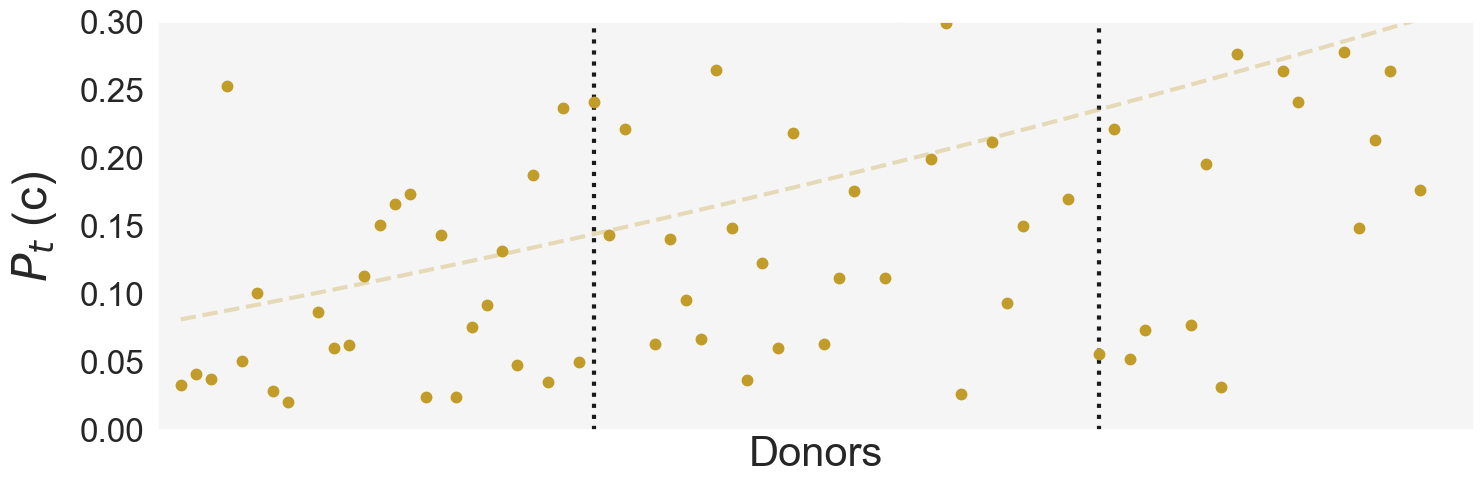

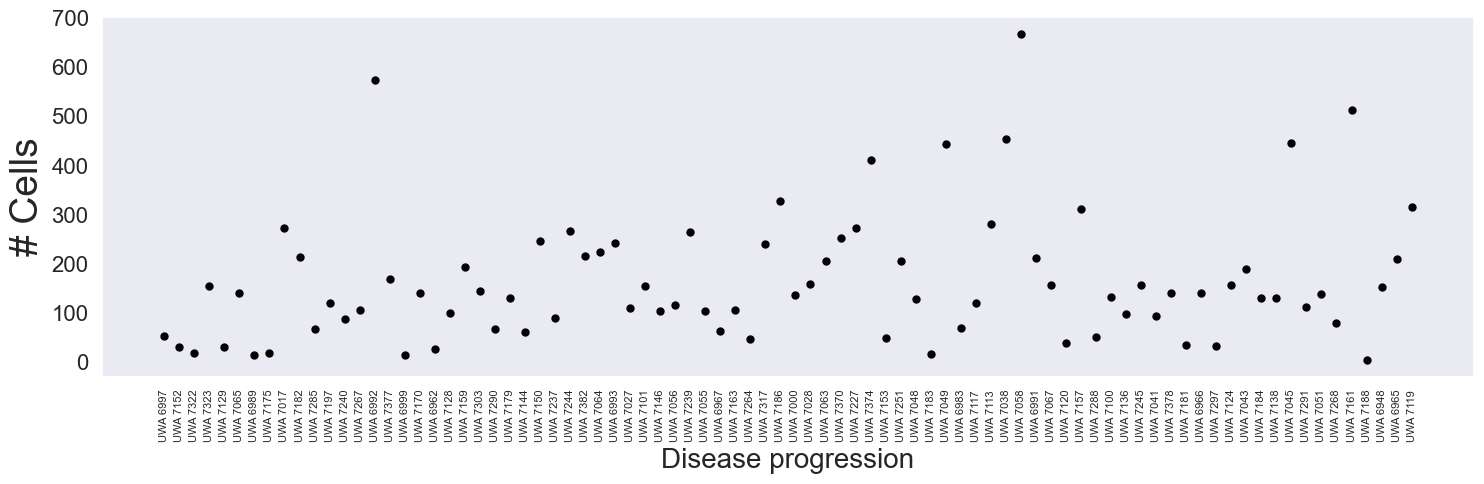

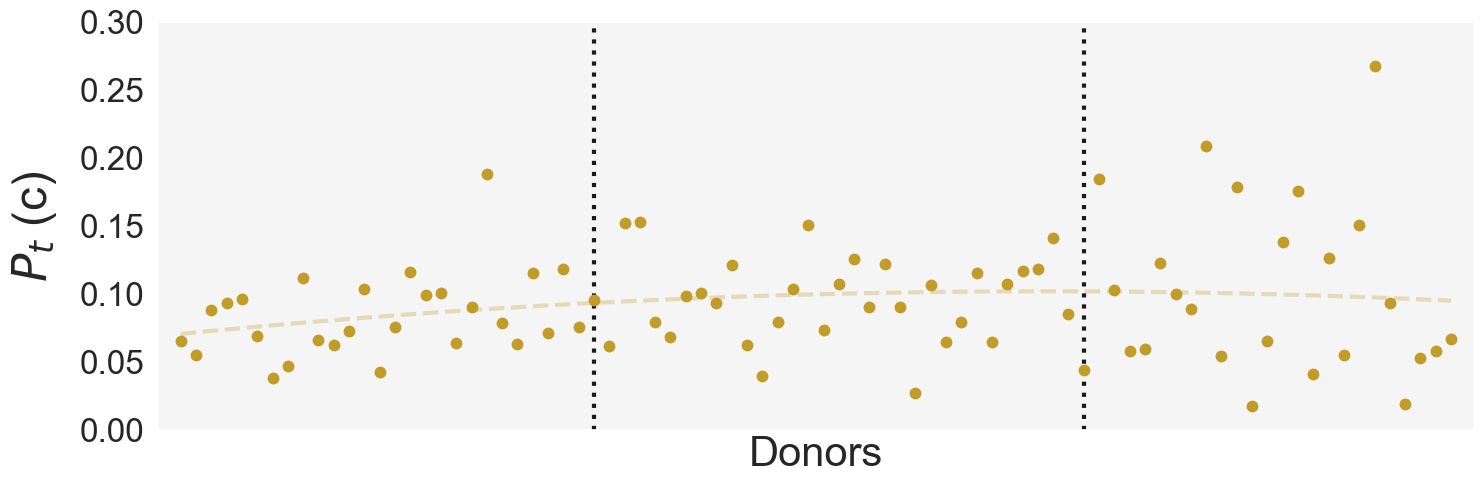

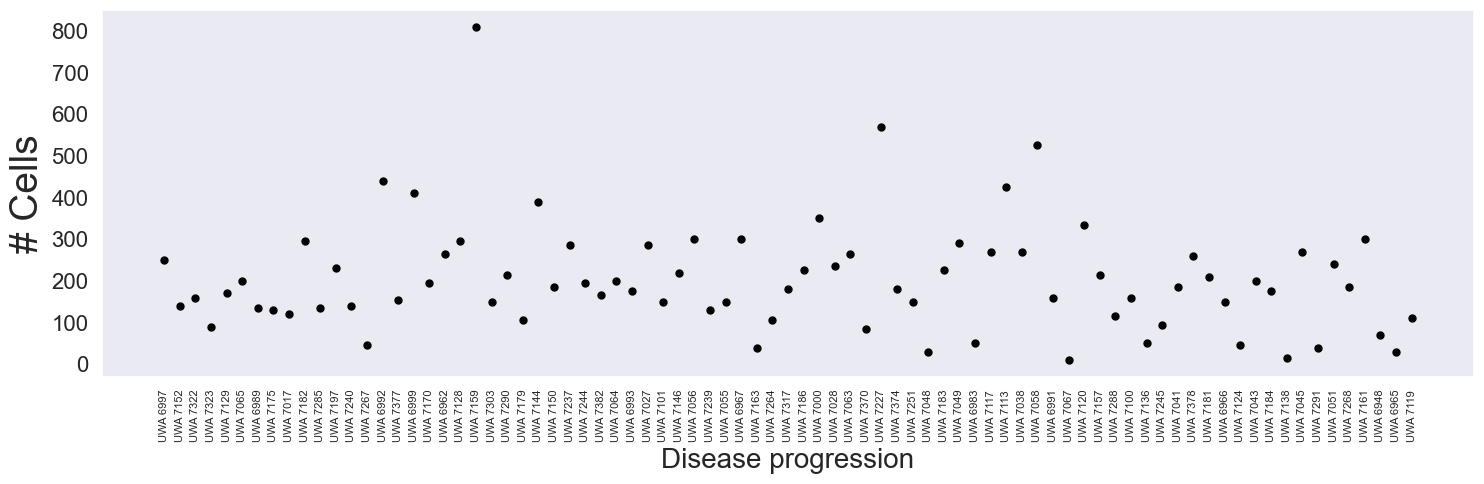

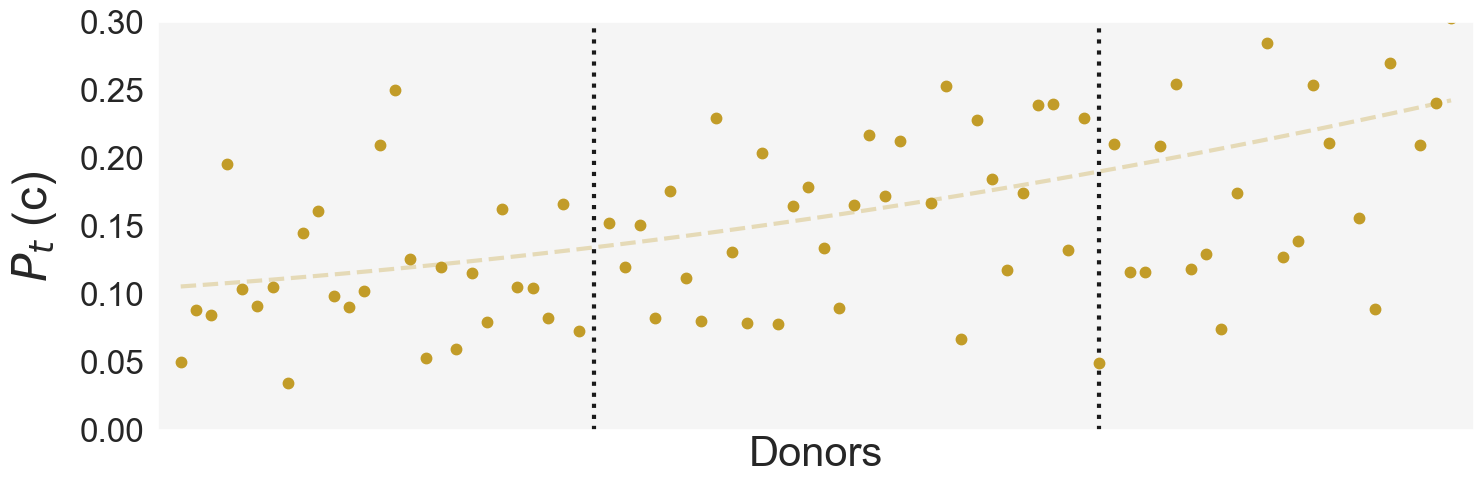

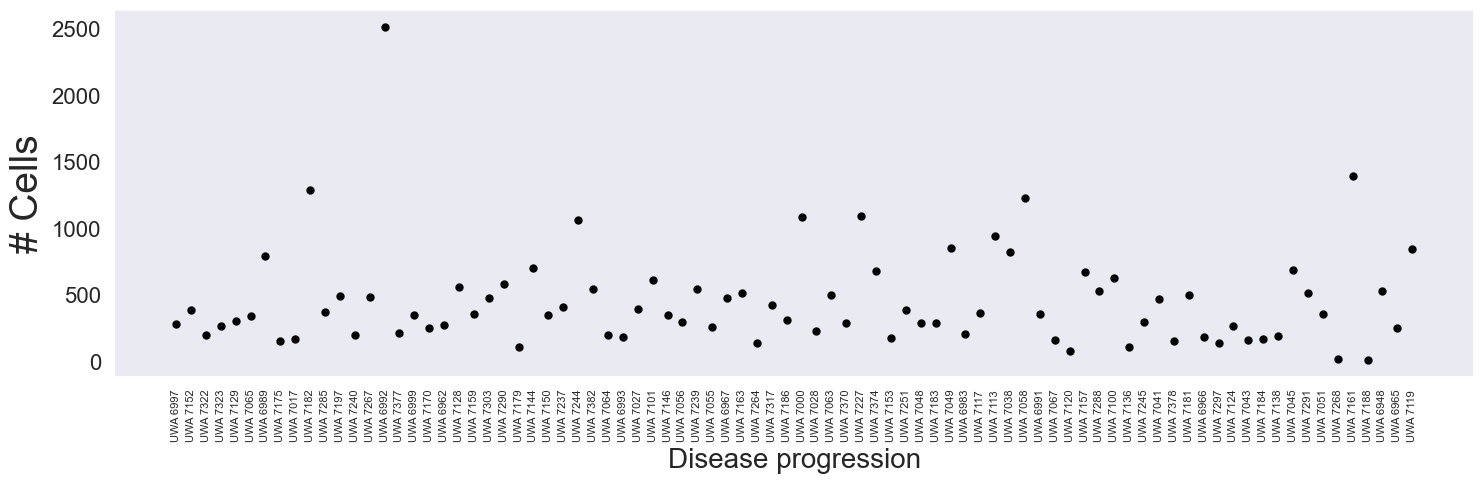

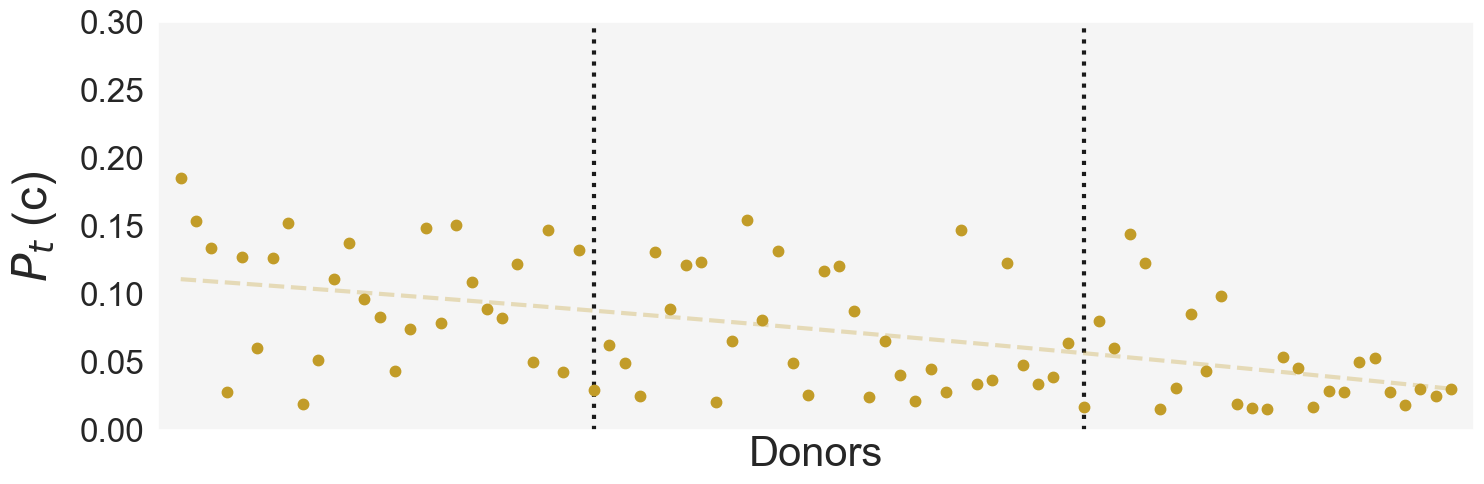

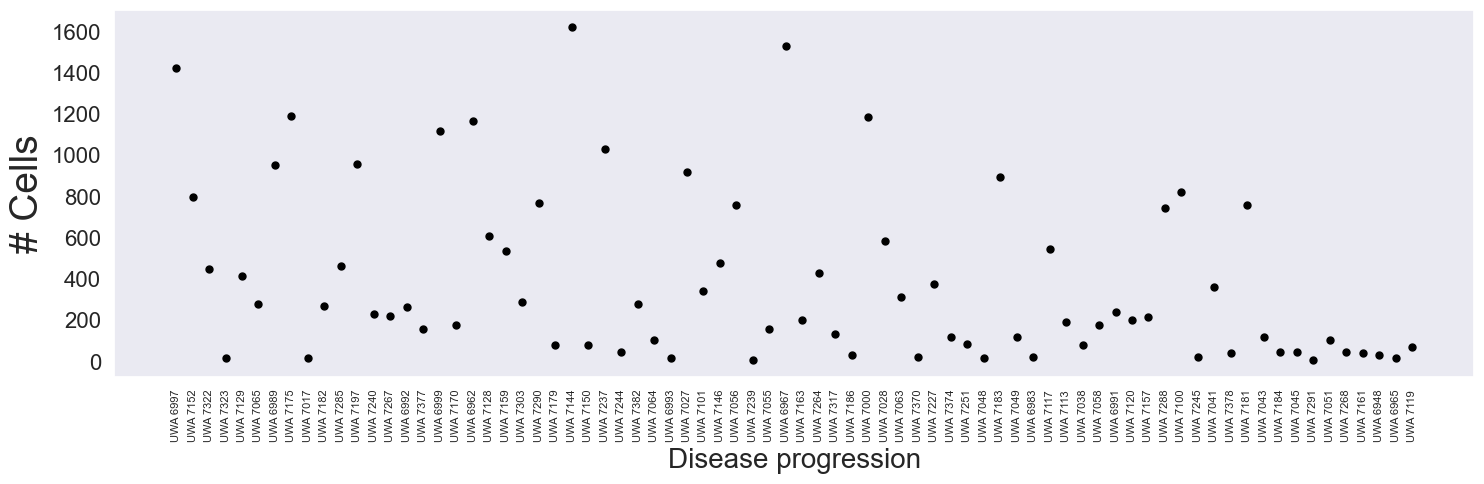

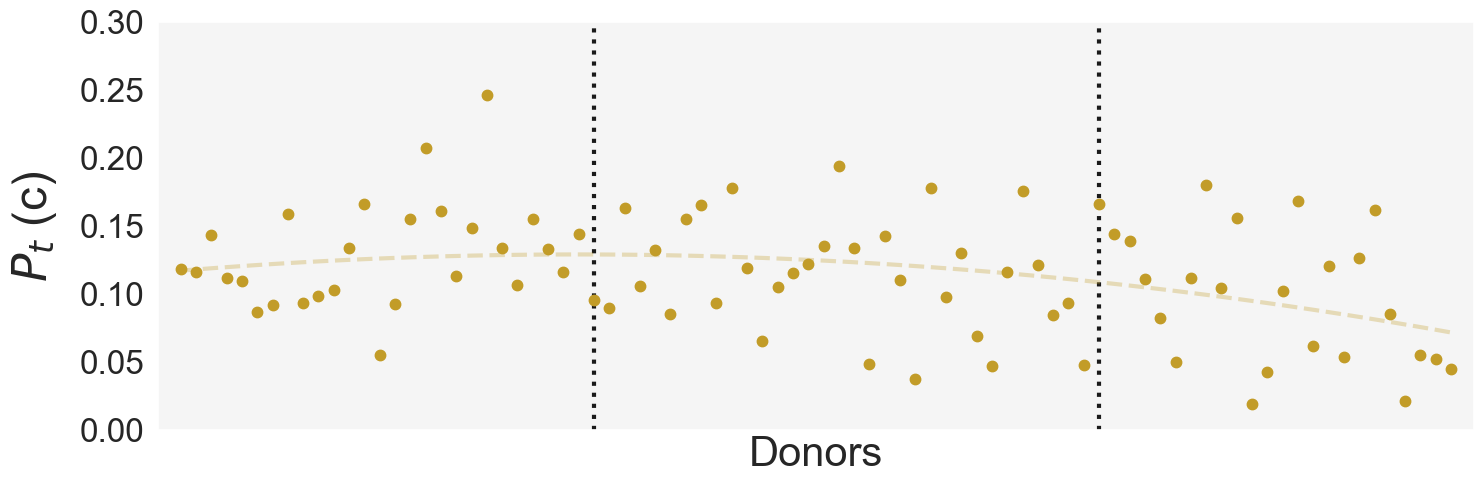

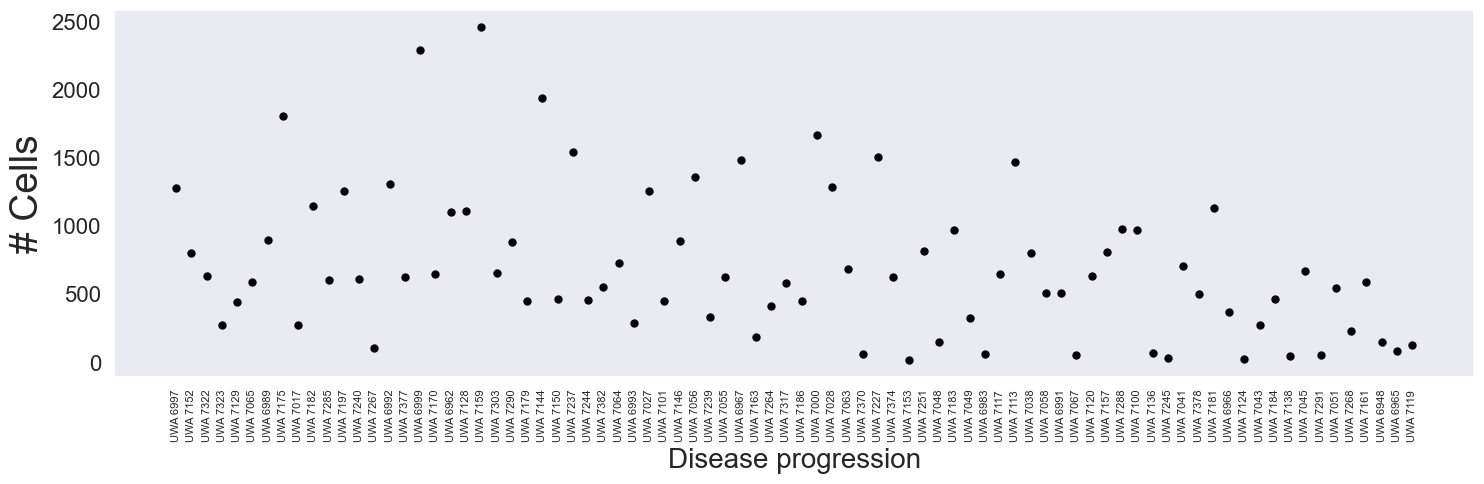

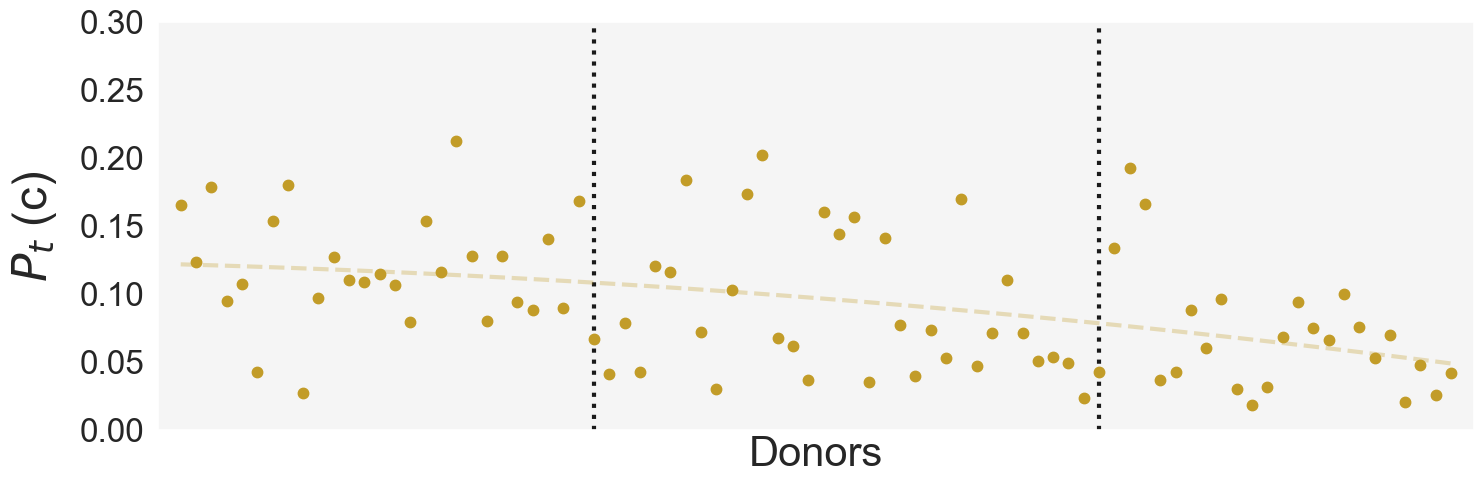

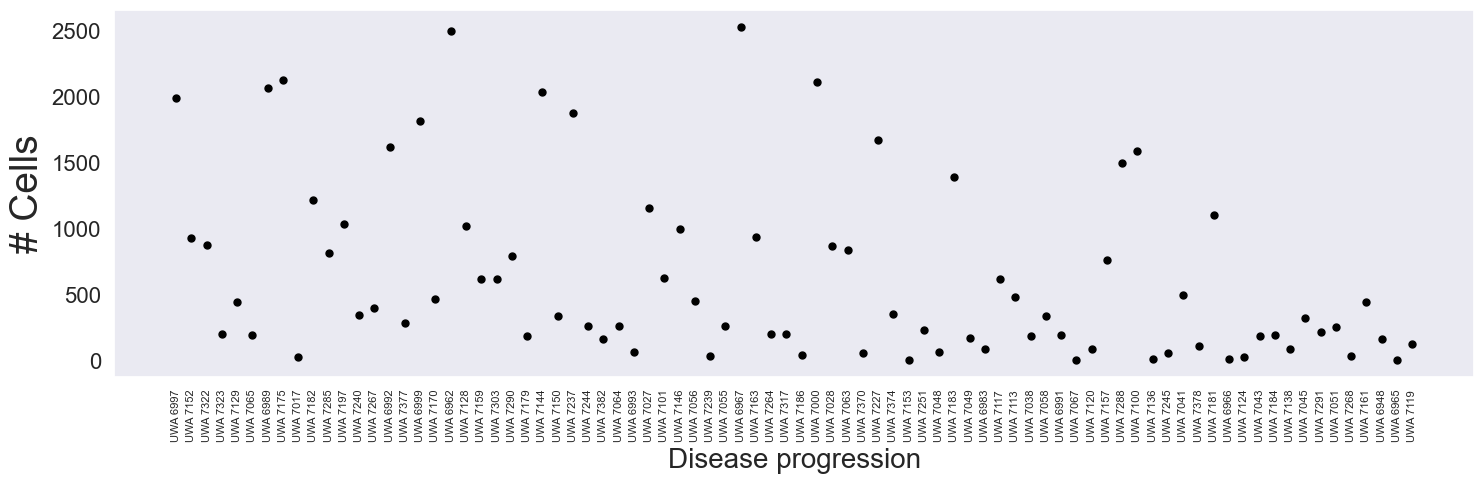

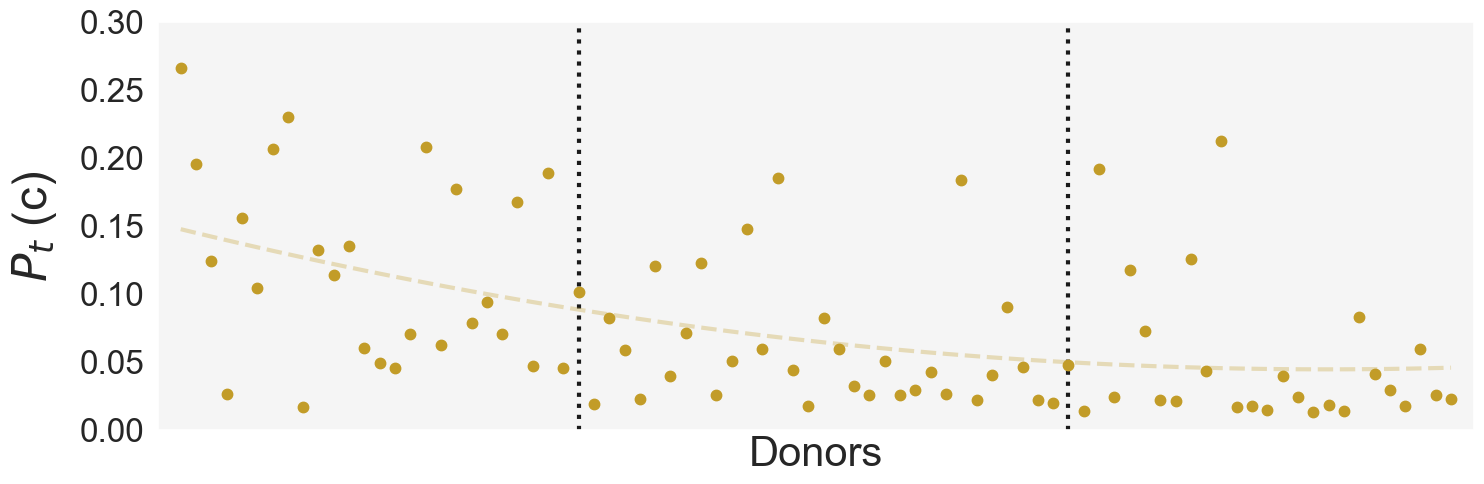

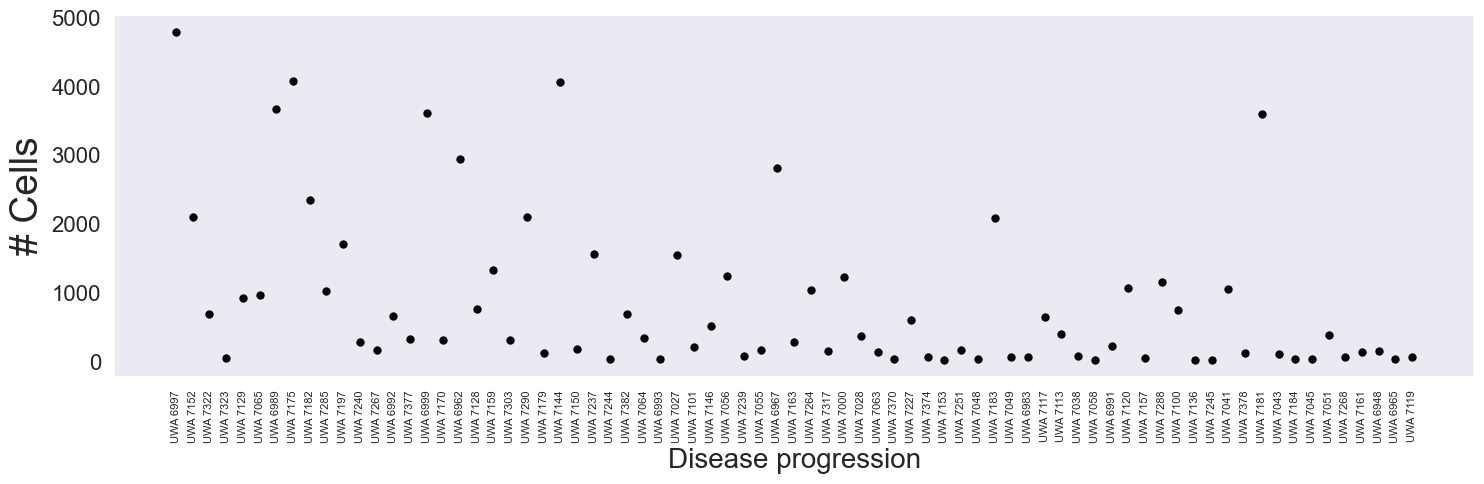

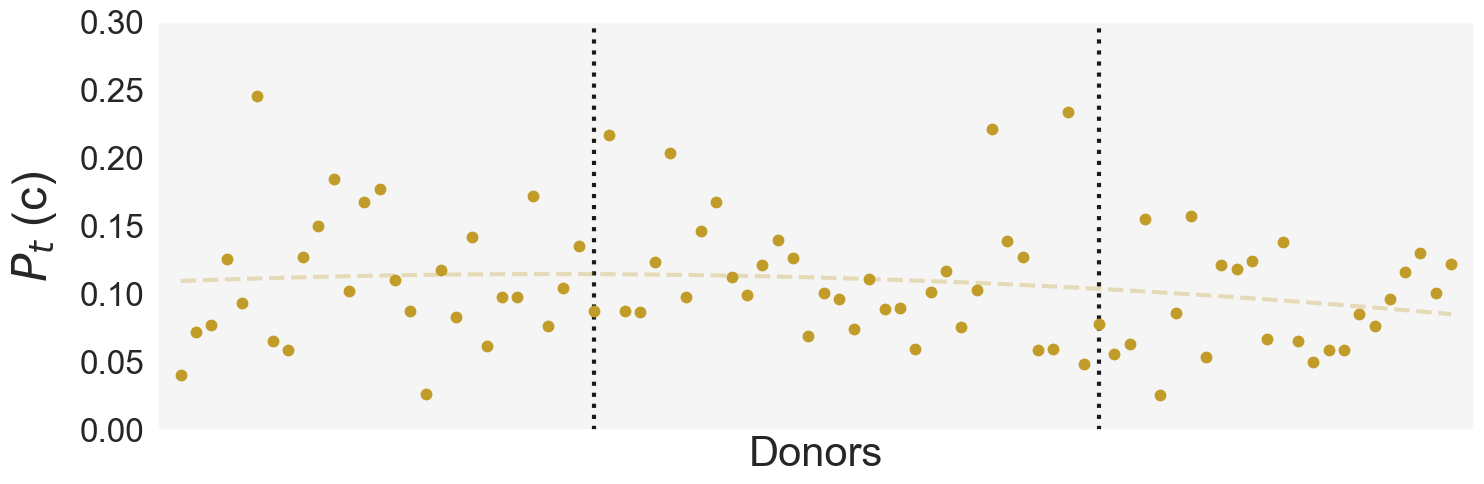

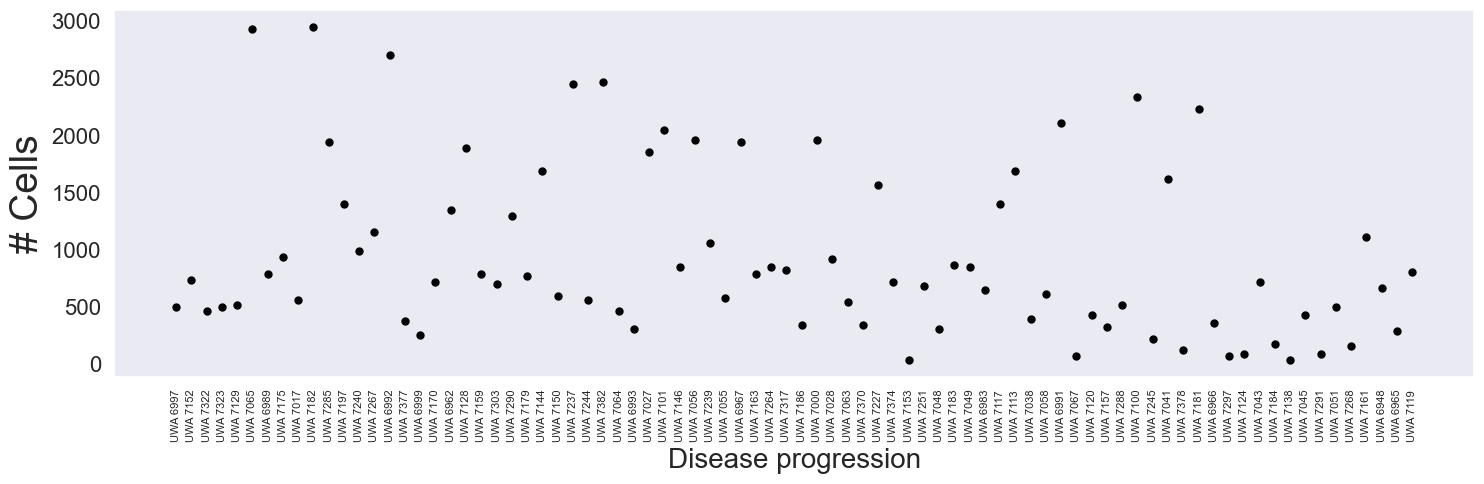

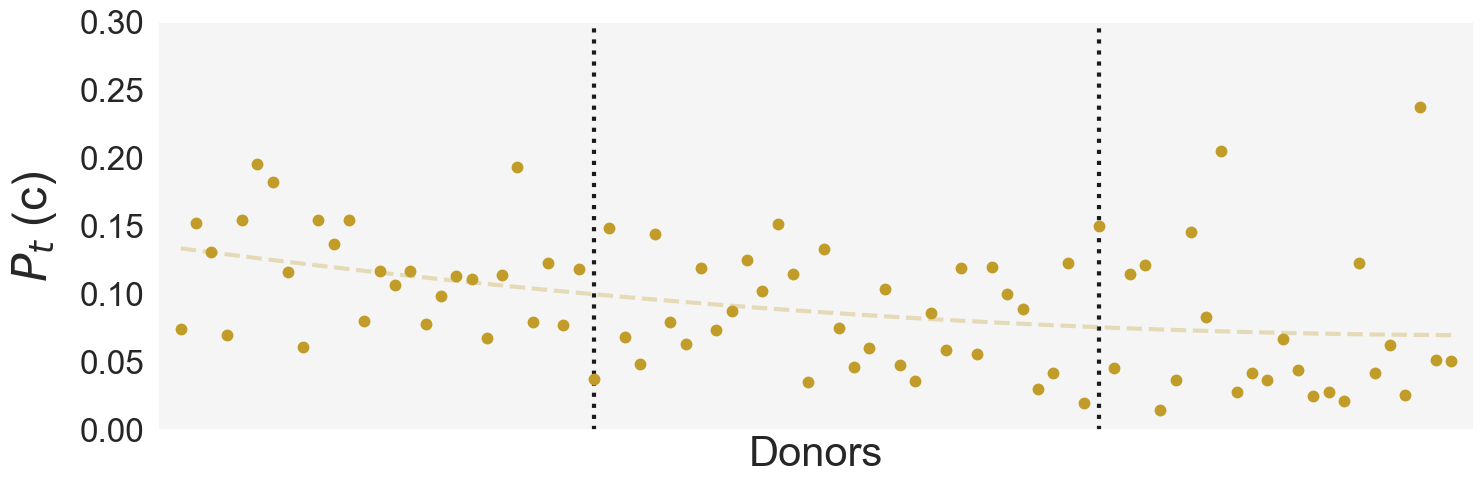

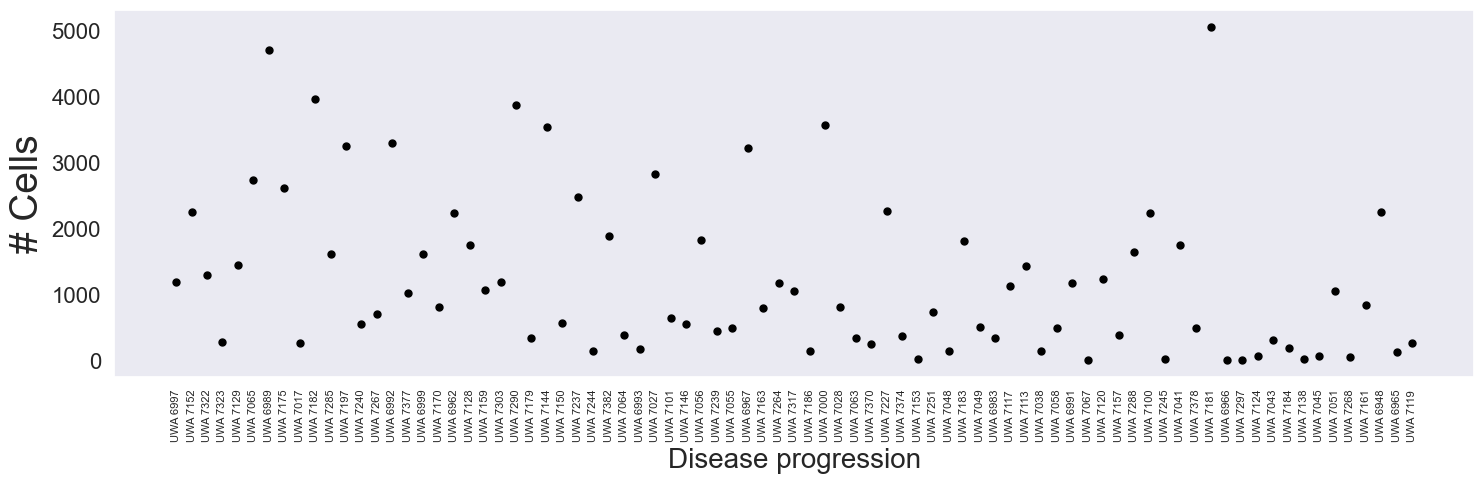

In [16]:
from sklearn.metrics import r2_score
from scipy import stats

df_c_time = pd.DataFrame()
df_c_time['c'] = np.zeros(n_categories * n_arm)
df_c_time['arm'] = np.zeros(n_categories * n_arm)
df_c_time['r2'] = np.zeros(n_categories * n_arm)
df_c_time['pearson_corr'] = np.zeros(n_categories * n_arm)
df_c_time['pearson_corr_fit'] = np.zeros(n_categories * n_arm)
df_c_time['t_static'] = np.zeros(n_categories * n_arm)
df_c_time['p_ttest'] = np.zeros(n_categories * n_arm)
df_c_time['delta_pc'] = np.zeros(n_categories * n_arm)

count = 0
for arm in range(1):
    qc = outcome['q_c'][-1][arm, :, :]
    df_c = pd.DataFrame()
    df_c['c'] = outcome['pred_label'][-1][arm].astype(int)
    for ic in range(qc.shape[-1]):
        df_c[f'qc_{ic}'] = qc[:, ic]
    df_c['donor'] = data['external_donor_name'][np.array(outcome['sample_id'][-1]).astype(int)]
    df_c['ps'] = data['ps_time'][np.array(outcome['sample_id'][-1]).astype(int)]
    df_c_group= df_c.groupby(by='donor').agg([np.mean, np.sum, np.std]).reset_index()

    ii = 0
    for ic in range(qc.shape[-1]):
      
        idx = np.argsort(df_c_group.ps['mean'].values)
        idx = idx[::-1]
        x = np.arange(len(df_c_group))
#         plt.errorbar(x, df_c_group.ps['mean'].iloc[idx],  yerr = df_c_group.ps['std'].iloc[idx], 
#                      linestyle='None',  marker='s', mfc='Navy', mec='Navy',  capsize=3,  ecolor='Navy', label='Ref.')
        if np.mean(df_c_group[f'qc_{ic}']['mean'].iloc[idx]) > 0:
            plt.figure(figsize=[15, 5],dpi=100)
            ax = plt.axes()
            ax.set_facecolor("whitesmoke")
            plt.vlines(d_mild[ii]+1, 0, 1.2, linestyles ="dotted", colors ="k", linewidth=3)
            plt.vlines(d_sever[ii]+2, 0, 1.2, linestyles ="dotted", colors ="k", linewidth=3)
            plt.errorbar(x, df_c_group[f'qc_{ic}']['mean'].iloc[idx],  yerr = 0.*df_c_group[f'qc_{ic}']['mean'].iloc[idx]**2, 
                         linestyle='None', marker='.', markersize=15, mfc='#c29c28', mec='#c29c28',  capsize=1, label='Pred.')
            poly10 = np.polyfit(x, df_c_group[f'qc_{ic}']['mean'].iloc[idx], 2)
            fun = np.poly1d(poly10)
            
            pc_t = df_c_group[f'qc_{ic}']['mean'].iloc[idx]
            t_static, p_value = stats.ttest_ind(pc_t[:d_mild[ii]], pc_t[d_sever[ii]:], equal_var=False)
            mu_early = np.mean(pc_t[:d_mild[ii]])
            mu_late = np.mean(pc_t[d_sever[ii]:])
            print(mu_early, mu_late, (mu_early - mu_late)/mu_early, t_static, p_value)
            
            plt.plot(x, fun(x), '--', color='#c29c28', alpha=0.3, linewidth=3)
            plt.xticks([]) # (x, df_c_group['donor'].iloc[idx].values, rotation=90, fontsize=8)
            plt.yticks(fontsize=24)
            plt.xlabel('Donors', fontsize=30)
            plt.ylabel(r'$P_t$ (c)',fontsize=34, labelpad=15)
            plt.xlim([-1.5, np.max(x[meta_true_mean > 0])+1.5])
            plt.grid(b=None)
            plt.ylim([0., 0.3])
    #         plt.ylim([0.0, np.max(y)+0.1*np.max(y)])
#             plt.legend()
#             plt.title(f'C-type: {int(ic+1)}')
            plt.tight_layout()
#             plt.savefig(saving_folder + '/latest_qc_time_' + str(int(ic+1)) +'_arm_' + str(arm) + '.png', dpi=600)
            ii += 1
            
            
            df_c_per_c = df_c[df_c['c'] == (ic + 1)]
            df_c_per_c_group = df_c_per_c.groupby(by='donor').agg([np.mean, np.sum, np.std]).reset_index()
            idx = np.argsort(df_c_per_c_group.ps['mean'].values)
            idx = idx[::-1]
            x = np.arange(len(df_c_per_c_group))
            plt.figure(figsize=[15, 5],dpi=100)
            plt.errorbar(x, df_c_per_c_group['c']['sum'].iloc[idx],  yerr = 0.*df_c_per_c_group['c']['sum'].iloc[idx], 
                         linestyle='None', marker='.', markersize=10, mfc='black', mec='black',  capsize=1, label='Pred.')
#             poly10 = np.polyfit(x, df_c_group['c']['sum'].iloc[idx], 2)
#             fun = np.poly1d(poly10)
#             plt.plot(x, fun(x), '--', color='gray', linewidth=3)
            plt.xticks(x, df_c_per_c_group['donor'].iloc[idx].values, rotation=90, fontsize=8)
            plt.yticks(fontsize=16)
            plt.ylabel('# Cells', fontsize=fontsize)
            plt.xlabel('Disease progression',fontsize=20)
            plt.grid(b=None)
    #         plt.ylim([0.0, np.max(y)+0.1*np.max(y)])
#             plt.legend()
#             plt.title(f'C-type: {int(ic+1)}')
            plt.tight_layout()
#             plt.savefig(saving_folder + '/numC_time_' + str(int(ic+1)) +'_arm_' + str(arm) + '.png', dpi=600)
            
            
            corr, _ = pearsonr(df_c_group.ps['mean'].iloc[idx], df_c_group[f'qc_{ic}']['mean'].iloc[idx])
            corr_fit, _ = pearsonr(df_c_group.ps['mean'].iloc[idx], fun(x))
            df_c_time['c'][count] = int(ic+1)
            df_c_time['pearson_corr'][count] = corr
            df_c_time['pearson_corr_fit'][count] = corr_fit
            df_c_time['arm'][count] = arm
            df_c_time['r2'][count] = r2_score(df_c_group[f'qc_{ic}']['mean'].iloc[idx], fun(x))
            df_c_time['t_static'][count] = t_static
            df_c_time['p_ttest'][count] = p_value
            df_c_time['delta_pc'][count] = (mu_early - mu_late)/mu_early
            count += 1
df_c_time = df_c_time.loc[:count-1]

In [17]:
df_c_time

c  arm        r2  pearson_corr  pearson_corr_fit  t_static   p_ttest  \
0   2.0  0.0  0.260714     -0.489702         -0.958191 -4.711967  0.000027   
1   5.0  0.0  0.070606     -0.161975         -0.584250 -1.323576  0.193391   
2   6.0  0.0  0.241722     -0.459941         -0.934670 -4.105679  0.000205   
3   8.0  0.0 -0.159898      0.505108          0.125647  4.855635  0.000014   
4   9.0  0.0  0.109885      0.285605          0.418038  2.654881  0.010727   
5  10.0  0.0  0.070230      0.396665          0.558456  4.222055  0.000102   
6  15.0  0.0 -0.359282      0.525011          0.054355  4.215401  0.000120   
7  18.0  0.0 -0.014201      0.108605          0.374849  1.099976  0.276666   
8  20.0  0.0  0.002807      0.392815          0.551229  3.055410  0.003844   

   delta_pc  
0 -1.461570  
1 -0.209807  
2 -0.761194  
3  0.532576  
4  0.253924  
5  0.423937  
6  0.593586  
7  0.132098  
8  0.363300

2.0 Sst_10
using CPU ...
Total loss: 0.09312988352030516
Total loss: 0.044148802757263184
Total loss: 0.04563269671052694
Total loss: 0.09282694384455681
Total loss: 0.04238090431317687
Total loss: 0.09220492094755173
Total loss: 0.0500590056180954
Total loss: 0.05299651063978672
Total loss: 0.08827234618365765
Total loss: 0.08971688337624073


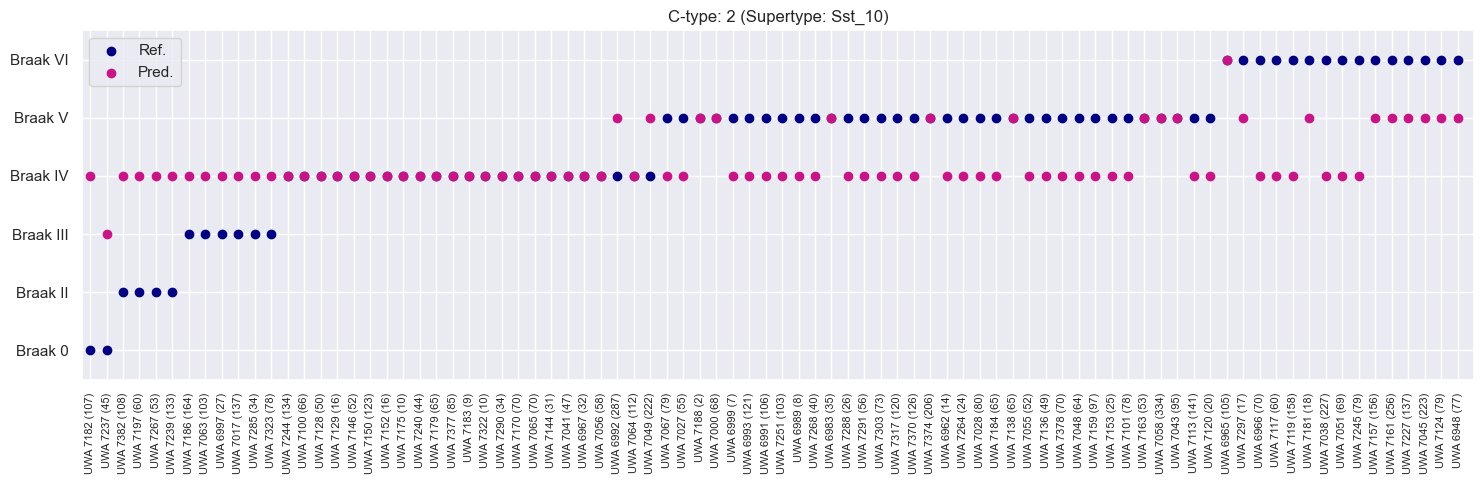

Pearsons correlation: 0.462


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


5.0 Sst_1
using CPU ...
Total loss: 0.054234689101576805
Total loss: 0.04205402545630932
Total loss: 0.05341915413737297
Total loss: 0.04894404299557209
Total loss: 0.04411635734140873
Total loss: 0.04202680476009846
Total loss: 0.036689890548586845
Total loss: 0.03842018358409405
Total loss: 0.048605550080537796
Total loss: 0.04704997316002846


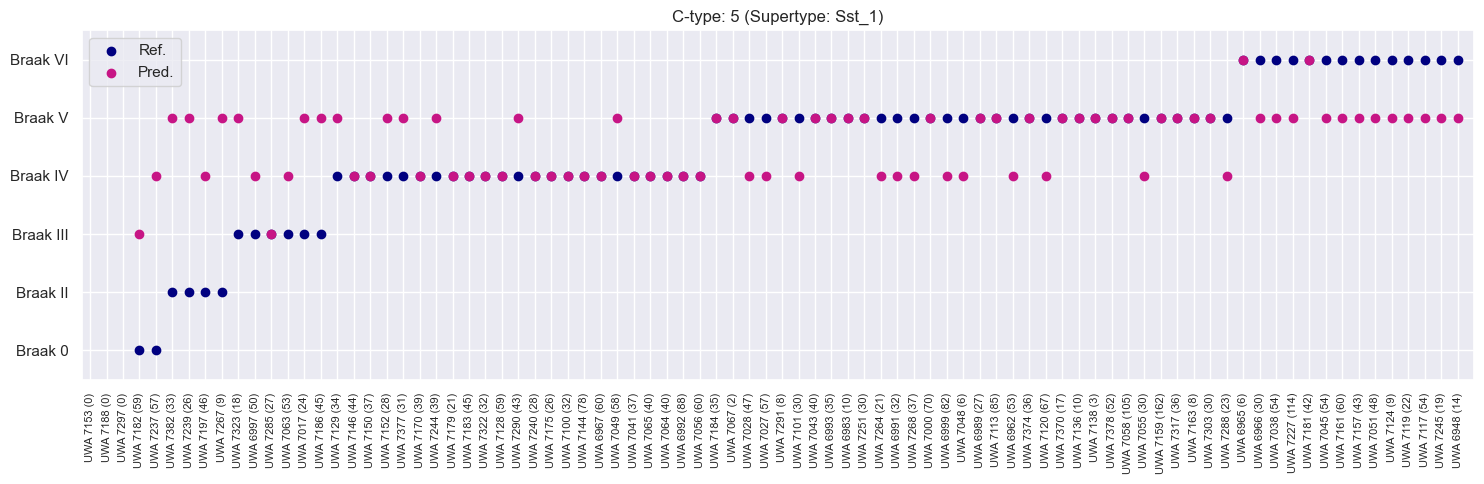

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pearsons correlation: 0.442
6.0 Sst_19
using CPU ...
Total loss: 0.036870543379336596
Total loss: 0.03591741854324937
Total loss: 0.035157316364347935
Total loss: 0.03822035761550069
Total loss: 0.0423884941264987
Total loss: 0.04234015755355358
Total loss: 0.03628860041499138
Total loss: 0.04286906495690346
Total loss: 0.04093842767179012
Total loss: 0.04388961847871542


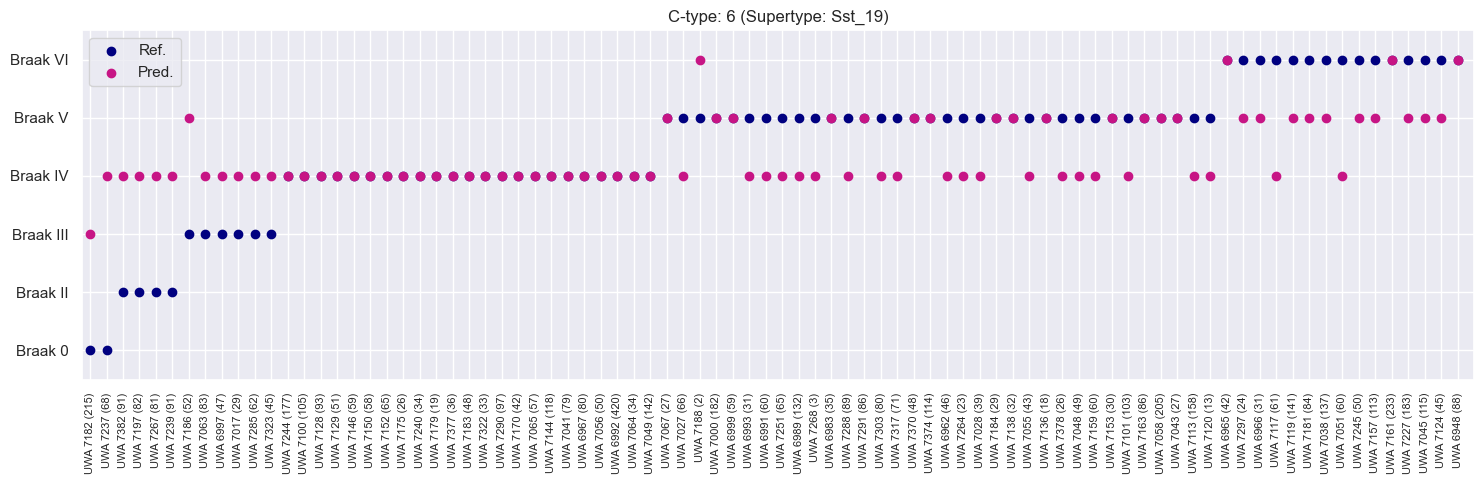

Pearsons correlation: 0.578
8.0 Sst_3
using CPU ...
Total loss: 0.03892742656171322
Total loss: 0.04249138571321964
Total loss: 0.02996750734746456
Total loss: 0.03482558857649565
Total loss: 0.03647061716765165
Total loss: 0.04017534852027893
Total loss: 0.04690580815076828
Total loss: 0.04220528621226549
Total loss: 0.03605070523917675
Total loss: 0.034818265587091446


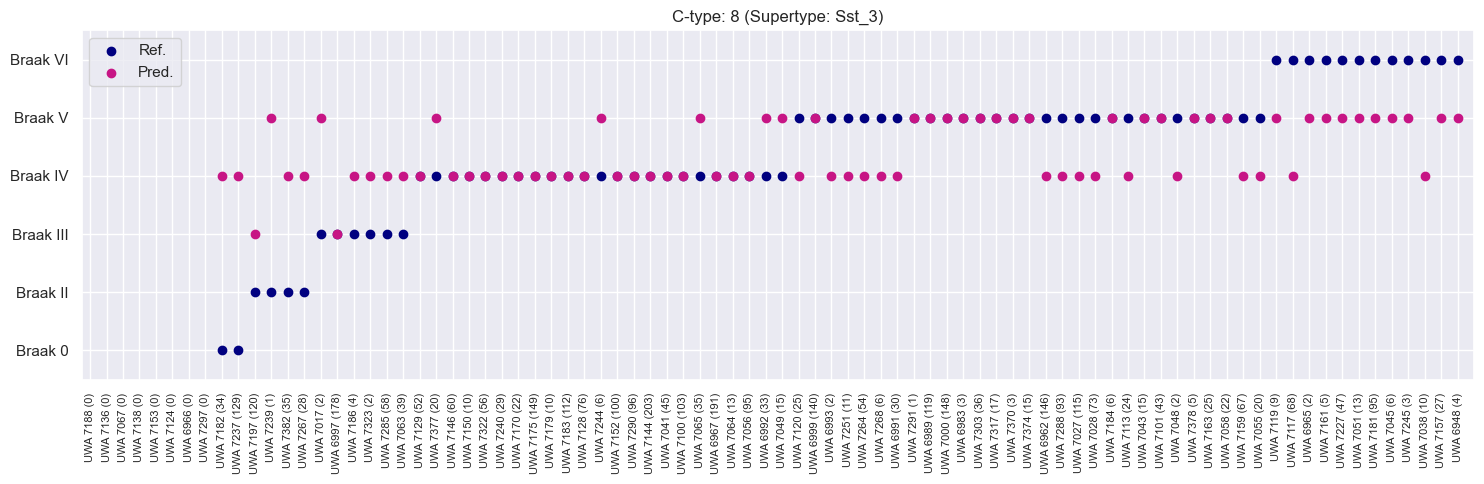

Pearsons correlation: 0.461
9.0 Sst_5
using CPU ...
Total loss: 0.03736249264329672
Total loss: 0.03535126941278577
Total loss: 0.03887891536578536
Total loss: 0.0425454406067729
Total loss: 0.03532347991131246
Total loss: 0.033868702594190836
Total loss: 0.03276127902790904
Total loss: 0.0415842963848263
Total loss: 0.03227935032919049
Total loss: 0.035773168317973614


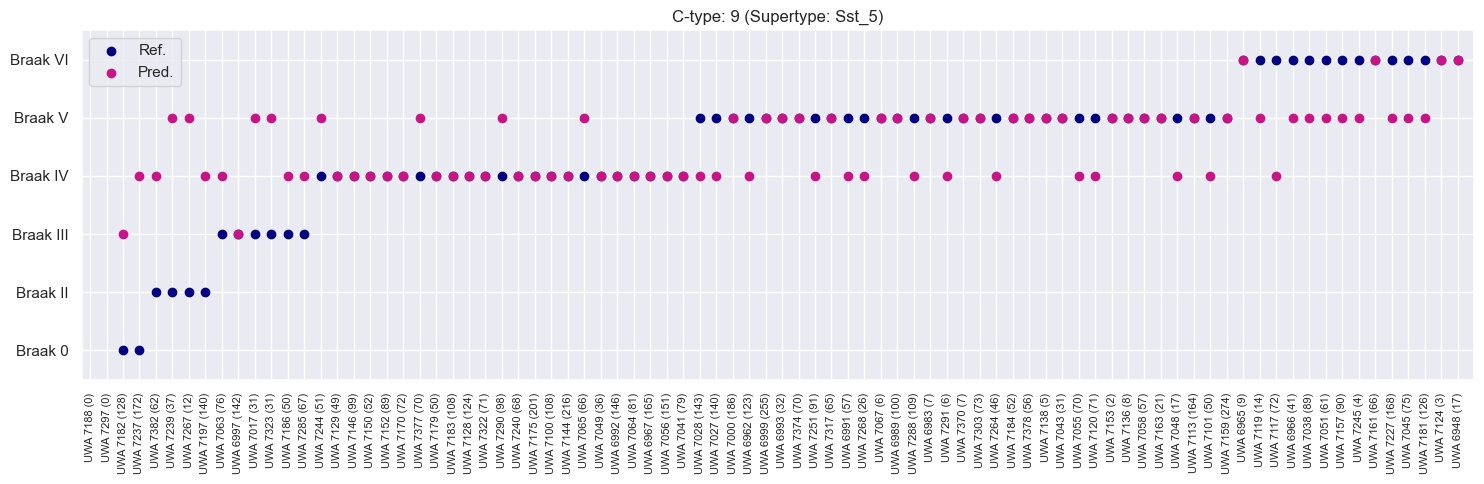

Pearsons correlation: 0.514
10.0 Sst_19
using CPU ...
Total loss: 0.03955967972675959
Total loss: 0.030514371891816456
Total loss: 0.04351287273069223
Total loss: 0.030800139531493187
Total loss: 0.03998673831423124
Total loss: 0.037010207772254944
Total loss: 0.03942524641752243
Total loss: 0.036546431481838226
Total loss: 0.040836075941721596
Total loss: 0.03761418474217256


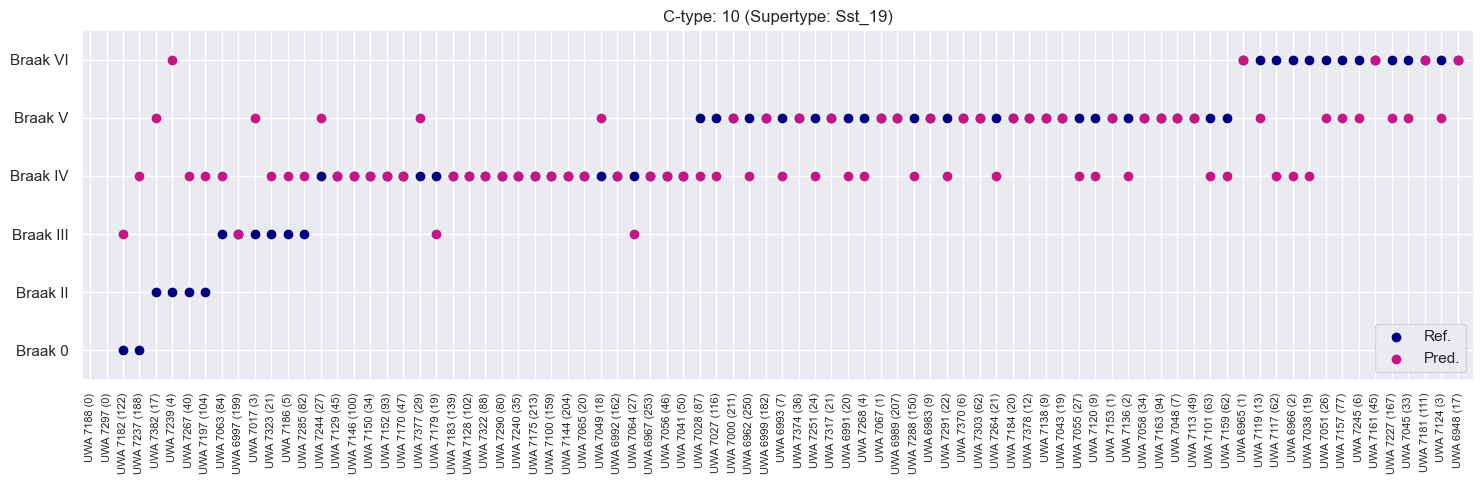

Pearsons correlation: 0.419
15.0 Sst_23
using CPU ...
Total loss: 0.03111808995405833
Total loss: 0.027901811602835853
Total loss: 0.027438701130449772
Total loss: 0.02988658519461751
Total loss: 0.03244189405813813
Total loss: 0.027876881882548332
Total loss: 0.026676978915929794
Total loss: 0.03127321880310774
Total loss: 0.025769950356334448
Total loss: 0.030402896149704855


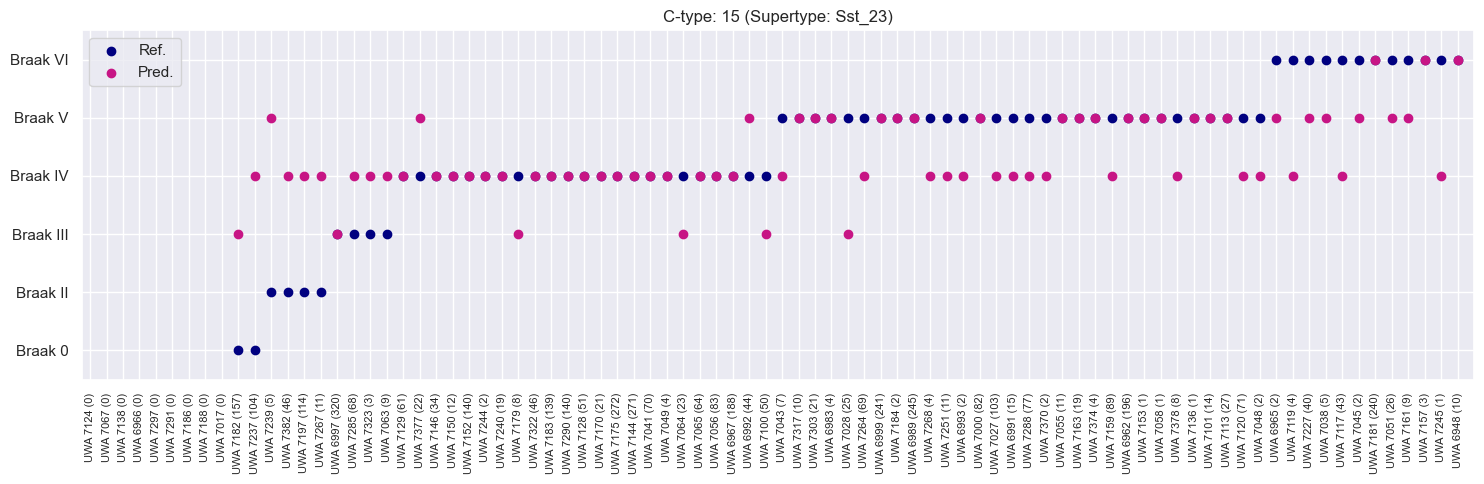

Pearsons correlation: 0.496
18.0 Sst_20
using CPU ...
Total loss: 0.03927136305719614
Total loss: 0.04231551227470239
Total loss: 0.04703484351436297
Total loss: 0.04384542008241018
Total loss: 0.04577286231021086
Total loss: 0.04800483832756678
Total loss: 0.04810165551801523
Total loss: 0.03661142693211635
Total loss: 0.0526250246912241
Total loss: 0.04887581802904606


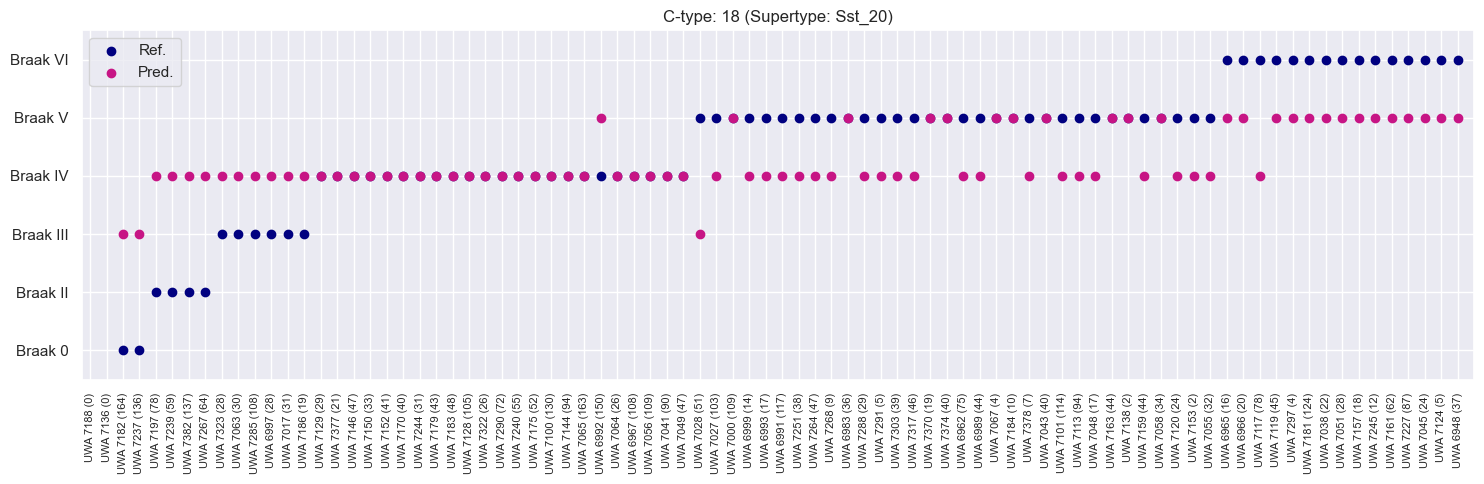

Pearsons correlation: 0.642
20.0 Sst_11
using CPU ...
Total loss: 0.04181307926774025
Total loss: 0.04337458312511444
Total loss: 0.04720742255449295
Total loss: 0.03795276706417402
Total loss: 0.0471816249191761
Total loss: 0.043225870778163276
Total loss: 0.044514733056227364
Total loss: 0.039330589274565377
Total loss: 0.043222094575564064
Total loss: 0.0429251454770565


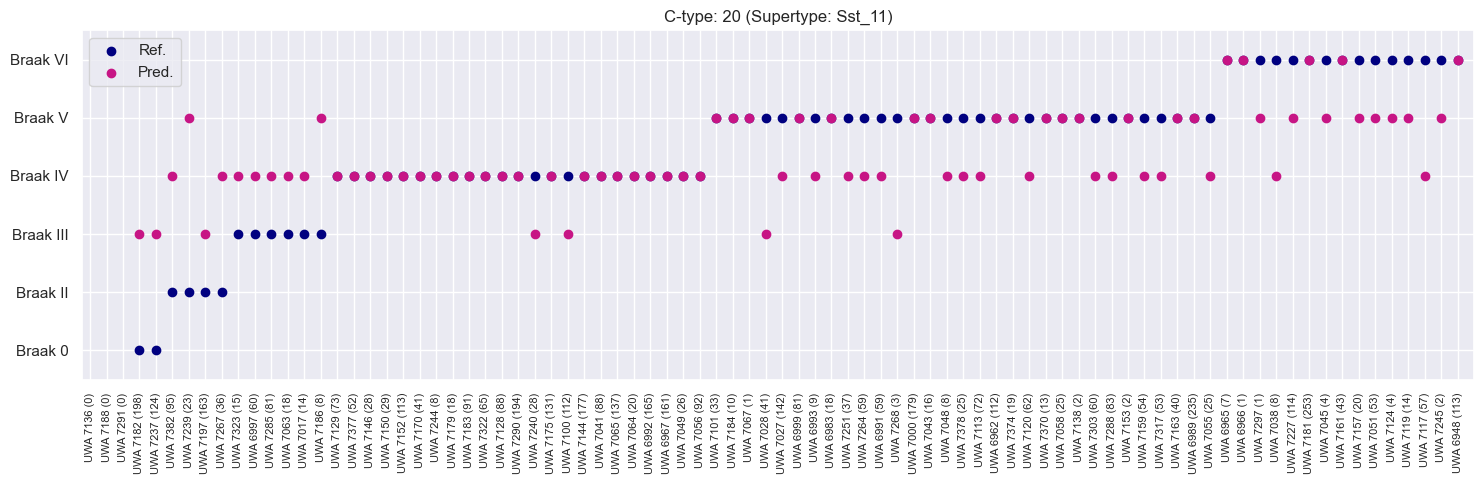

Pearsons correlation: 0.583


In [12]:
arm = 0
seed = 100
kfold = 10
state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, :]
s_idx = outcome['sample_id'][-1].astype(int)
cat = np.unique(pred_type)
supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
metadata = 'braak'

m_ind = []
df_braak = pd.DataFrame()
df_braak['c'] = np.zeros(len(cat))
df_braak['superype'] = np.zeros(len(cat))
df_braak['pearson_corr'] = np.zeros(len(cat))
df_braak['mse'] = np.zeros(len(cat))

if metadata == 'cognitive_status_binary':
    data['cs_binary'] = np.zeros(len(data[metadata]))
    indx_dem = np.where(data[metadata] == 'Dementia')[0]
    indx_nodem = np.where(data[metadata] == 'No dementia')[0]
    data['cs_binary'][indx_dem] = 1
    data['cs_binary'][indx_nodem] = 0
    metadata = 'cs_binary'
    binary = True
else:
    binary = False

if metadata == 'caascore':
    data['caa'] = np.zeros(len(data[metadata]))
    indx_mild = np.where(data[metadata] == 'Mild')[0]
    indx_moderate = np.where(data[metadata] == 'Moderate')[0]
    indx_severe = np.where(data[metadata] == 'Severe')[0]
    data['caa'][indx_mild] = 0.1
    data['caa'][indx_moderate] = 0.5
    data['caa'][indx_moderate] = 1
    metadata = 'caa'

if metadata == 'braak':
    data['braak_num'] = np.zeros(len(data[metadata]))
    data['braak_int'] = np.zeros(len(data[metadata]))
    indx_0 = np.where(data[metadata] == 'Braak 0')[0]
    indx_ii = np.where(data[metadata] == 'Braak II')[0]
    indx_iii = np.where(data[metadata] == 'Braak III')[0]
    indx_iv = np.where(data[metadata] == 'Braak IV')[0]
    indx_v = np.where(data[metadata] == 'Braak V')[0]
    indx_vi = np.where(data[metadata] == 'Braak VI')[0]
    data['braak_num'][indx_0] = 0.
    data['braak_num'][indx_ii] = 0.2
    data['braak_num'][indx_iii] = 0.4
    data['braak_num'][indx_iv] = 0.6
    data['braak_num'][indx_v] = 0.8
    data['braak_num'][indx_vi] = 1.
    data['braak_int'][indx_0] = 0
    data['braak_int'][indx_ii] = 2
    data['braak_int'][indx_iii] = 3
    data['braak_int'][indx_iv] = 4
    data['braak_int'][indx_v] = 5
    data['braak_int'][indx_vi] = 6
    metadata = 'braak_num'
    
uniq_donor = np.unique(data['external_donor_name'])

for i_c, c in enumerate(cat):
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t == tt) for tt in uniq_ref_t]
    num_types = [sum(supertypes == tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, uniq_ref_t[np.argmax(norm_count)])
    x = state[idx, :]
    y = meta_y
    donors = tmp_donors
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            classifier.load_model(trained_model)
#             f = open(saving_folder + '/summary_' + metadata + '_fold_' + str(m) + '_cat_' + str(int(c))+ '.p', "rb")
#             data_dict = pickle.load(f)
#             f.close()
#             indx = data_dict['sample_indx'].astype(int)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            meta_true.append(eval_dict[-1]['metadata'])
            meta_pred.append(eval_dict[-1]['prediction'])
            error.append(np.mean(np.abs(eval_dict[-1]['metadata'] - eval_dict[-1]['prediction'])))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            xtick.append(f'{dd} ({len(d_idx)})')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(-10)
                meta_true_std.append(0)
                meta_pred_mean.append(-10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)

        values = np.unique(meta_true_mean)
        meta_pred_score = []
        for p_m in meta_pred_mean:
            if p_m > 0:
                dist = (p_m - values)**2
                meta_pred_score.append(values[np.argmin(dist)])
            else:
                meta_pred_score.append(p_m)

        meta_pred_score = np.array(meta_pred_score)
        m_indx = np.argsort(meta_true_mean)
        x = np.arange(len(uniq_donor))
        plt.figure(figsize=[15, 5],dpi=100)
        plt.scatter(x, meta_true_mean[m_indx], color='Navy', label='Ref.')
        plt.scatter(x, meta_pred_score[m_indx], color='MediumVioletRed', label='Pred.')
        plt.yticks(np.unique(data[metadata]), np.unique(data['braak']))
#         plt.xticks(x, uniq_donor[m_indx], rotation=90, fontsize=8)
        plt.xticks(x, np.array(xtick)[m_indx], rotation=90, fontsize=8)
        plt.xlim([-.5, np.max(x)+1])
        plt.ylim([-0.1, np.max(y)+0.1*np.max(y)])
        plt.legend()
        plt.title(f'C-type: {int(c)} (Supertype: {uniq_ref_t[np.argmax(norm_count)]})')
        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
        plt.savefig(saving_folder + '/braak_' + str(int(c)) + '_' + stype[stype.find('_')+1:] + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_score[meta_pred_score >= 0]
        y_true = meta_true_mean[meta_pred_score >= 0]
        df_braak['c'][i_c] = int(c)
        df_braak['superype'][i_c] = uniq_ref_t[np.argmax(norm_count)]
        corr, _ = pearsonr(y_true, y_pred)
        print('Pearsons correlation: %.3f' % corr)
        df_braak['pearson_corr'][i_c] = corr
        df_braak['mse'][i_c] = np.mean((y_pred - y_true)**2)

In [13]:
df_braak

c superype  pearson_corr       mse
0   2.0   Sst_10      0.462047  0.045238
1   5.0    Sst_1      0.442071  0.043457
2   6.0   Sst_19      0.577950  0.036190
3   8.0    Sst_3      0.460696  0.042632
4   9.0    Sst_5      0.514007  0.039024
5  10.0   Sst_19      0.419416  0.045366
6  15.0   Sst_23      0.495723  0.041067
7  18.0   Sst_20      0.642191  0.036098
8  20.0   Sst_11      0.583067  0.037037

2.0 3
using CPU ...
Total loss: 0.08536941558122635
Total loss: 0.0461282953619957
Total loss: 0.038764312863349915
Total loss: 0.09240704029798508
Total loss: 0.0381321981549263
Total loss: 0.08408200740814209
Total loss: 0.040910959243774414
Total loss: 0.053872257471084595
Total loss: 0.08524015545845032
Total loss: 0.0902157574892044


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:192: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


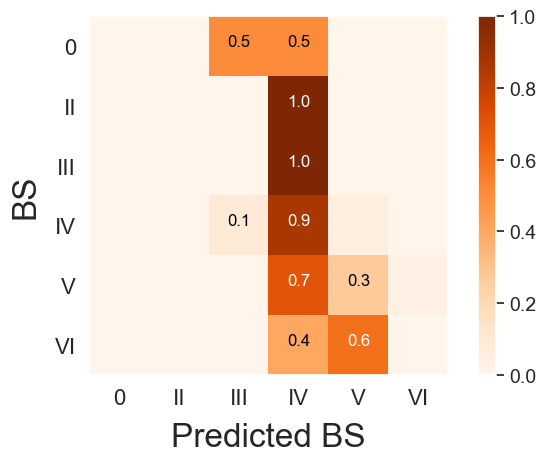

5.0 0
using CPU ...
Total loss: 0.035190433263778687
Total loss: 0.03520546108484268
Total loss: 0.03701223060488701
Total loss: 0.03368811681866646
Total loss: 0.03800853341817856
Total loss: 0.03542720526456833
Total loss: 0.049105171114206314
Total loss: 0.03597381338477135
Total loss: 0.0397762656211853
Total loss: 0.02883191592991352


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:192: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


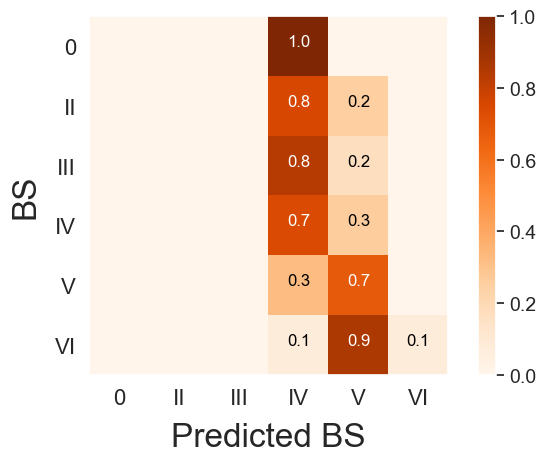

6.0 3
using CPU ...
Total loss: 0.03336464986205101
Total loss: 0.038422565907239914
Total loss: 0.038057953119277954
Total loss: 0.034130387008190155
Total loss: 0.037250690162181854
Total loss: 0.038798850029706955
Total loss: 0.03286798298358917
Total loss: 0.03464813902974129
Total loss: 0.04014216363430023
Total loss: 0.038221575319767


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:192: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


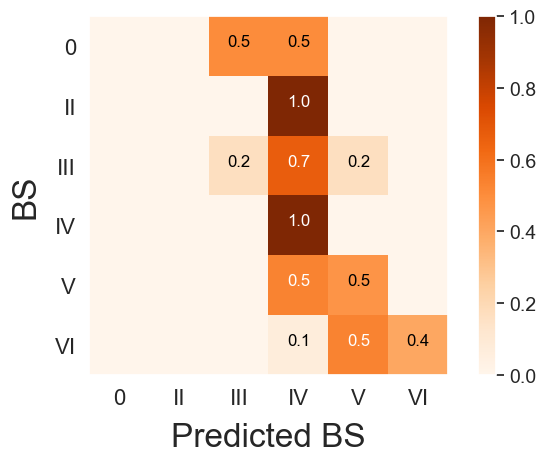

8.0 8
using CPU ...
Total loss: 0.0358270350843668
Total loss: 0.03130645491182804
Total loss: 0.030778225511312485
Total loss: 0.02801286894828081
Total loss: 0.036292243748903275
Total loss: 0.03393717296421528
Total loss: 0.030414417386054993
Total loss: 0.03312608227133751
Total loss: 0.033065520226955414
Total loss: 0.031231500208377838


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:192: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


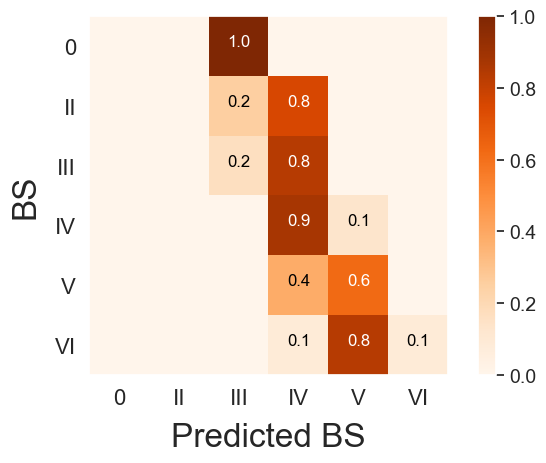

9.0 8
using CPU ...
Total loss: 0.028896449133753777
Total loss: 0.03829430788755417
Total loss: 0.032932206988334656
Total loss: 0.037499867379665375
Total loss: 0.04311368986964226
Total loss: 0.04407013580203056
Total loss: 0.03686225414276123
Total loss: 0.03308878466486931
Total loss: 0.046110883355140686
Total loss: 0.054416023194789886


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:192: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


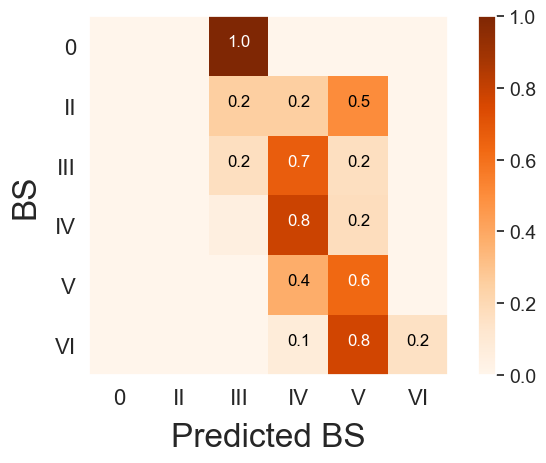

10.0 3
using CPU ...
Total loss: 0.03069461975246668
Total loss: 0.029859534464776516
Total loss: 0.029669693671166897
Total loss: 0.03287775255739689
Total loss: 0.0345085933804512
Total loss: 0.031020733527839184
Total loss: 0.03139842581003904
Total loss: 0.03672071546316147
Total loss: 0.030905340798199177
Total loss: 0.031971792690455914


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:192: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


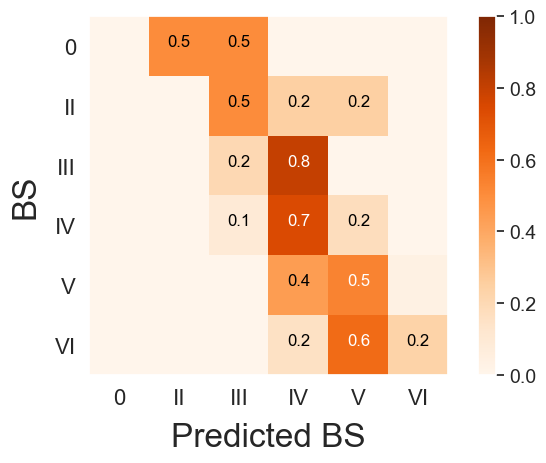

15.0 2
using CPU ...
Total loss: 0.03314753621816635
Total loss: 0.031876981258392334
Total loss: 0.03757547214627266
Total loss: 0.025382304564118385
Total loss: 0.03090527094900608
Total loss: 0.023847568780183792
Total loss: 0.048244960606098175
Total loss: 0.04156376048922539
Total loss: 0.022712912410497665
Total loss: 0.024936871603131294


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:192: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


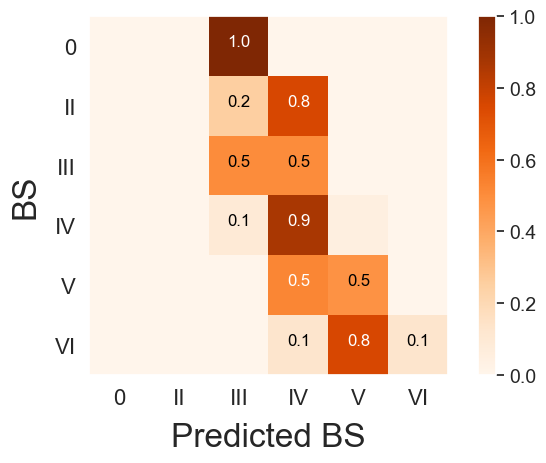

18.0 8
using CPU ...
Total loss: 0.04909498617053032
Total loss: 0.04296737164258957
Total loss: 0.04817883297801018
Total loss: 0.05012739077210426
Total loss: 0.047559574246406555
Total loss: 0.05305080488324165
Total loss: 0.04948224127292633
Total loss: 0.04444298520684242
Total loss: 0.037602245807647705
Total loss: 0.041691333055496216


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:192: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


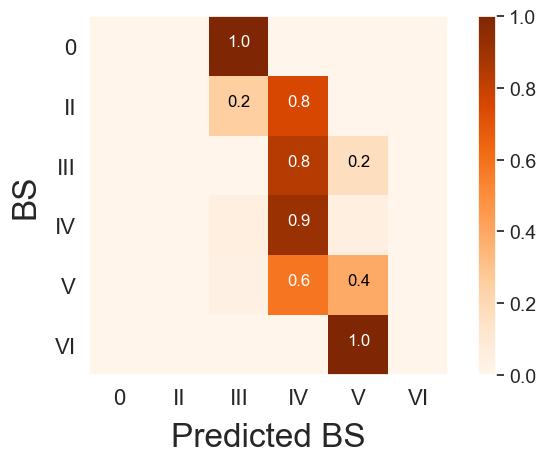

20.0 2
using CPU ...
Total loss: 0.05370686575770378
Total loss: 0.04399183765053749
Total loss: 0.0378907211124897
Total loss: 0.03703676536679268
Total loss: 0.05469508096575737
Total loss: 0.032388050109148026
Total loss: 0.03509515896439552
Total loss: 0.03687160089612007
Total loss: 0.03596513718366623
Total loss: 0.04402027279138565


/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:192: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


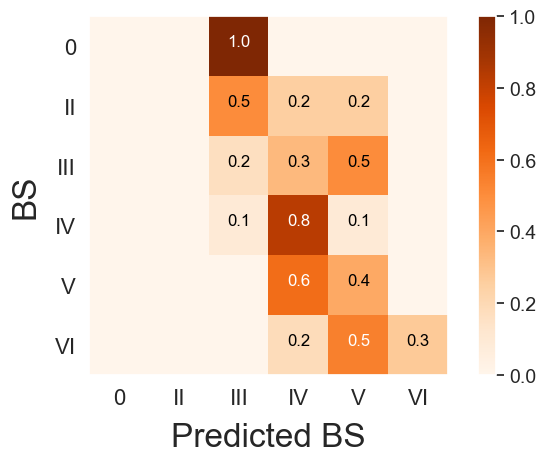

In [10]:
from utils.state_analysis import state_analyzer
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import pandas as pd
import itertools
from sklearn.preprocessing import LabelEncoder

saving_folder = path + "/results/cpl_mixVAE/"
saving_folder = saving_folder + str(folder_name)

arm = 0
seed = 100
kfold = 10
state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, :]
s_idx = outcome['sample_id'][-1].astype(int)
cat = np.unique(pred_type)
supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
metadata = 'braak'
m_ind = []

if metadata == 'cognitive_status_binary':
    data['cs_binary'] = np.zeros(len(data[metadata]))
    indx_dem = np.where(data[metadata] == 'Dementia')[0]
    indx_nodem = np.where(data[metadata] == 'No dementia')[0]
    data['cs_binary'][indx_dem] = 1
    data['cs_binary'][indx_nodem] = 0
    metadata = 'cs_binary'
    binary = True
else:
    binary = False

if metadata == 'caascore':
    data['caa'] = np.zeros(len(data[metadata]))
    indx_mild = np.where(data[metadata] == 'Mild')[0]
    indx_moderate = np.where(data[metadata] == 'Moderate')[0]
    indx_severe = np.where(data[metadata] == 'Severe')[0]
    data['caa'][indx_mild] = 0.1
    data['caa'][indx_moderate] = 0.5
    data['caa'][indx_moderate] = 1
    metadata = 'caa'

if metadata == 'braak':
    data['braak_num'] = np.zeros(len(data[metadata]))
    data['braak_int'] = np.zeros(len(data[metadata]))
    indx_0 = np.where(data[metadata] == 'Braak 0')[0]
    indx_ii = np.where(data[metadata] == 'Braak II')[0]
    indx_iii = np.where(data[metadata] == 'Braak III')[0]
    indx_iv = np.where(data[metadata] == 'Braak IV')[0]
    indx_v = np.where(data[metadata] == 'Braak V')[0]
    indx_vi = np.where(data[metadata] == 'Braak VI')[0]
    data['braak_num'][indx_0] = 0.
    data['braak_num'][indx_ii] = 0.2
    data['braak_num'][indx_iii] = 0.4
    data['braak_num'][indx_iv] = 0.6
    data['braak_num'][indx_v] = 0.8
    data['braak_num'][indx_vi] = 1.
    data['braak_int'][indx_0] = 0
    data['braak_int'][indx_ii] = 2
    data['braak_int'][indx_iii] = 3
    data['braak_int'][indx_iv] = 4
    data['braak_int'][indx_v] = 5
    data['braak_int'][indx_vi] = 6
    metadata = 'braak_num'
    
uniq_donor = np.unique(data['external_donor_name'])

for i_c, c in enumerate(cat):
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t==tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, np.argmax(norm_count))
    x = state[idx[idxx], :]
    y = 1. * meta_y[idxx]
    donors = tmp_donors[idxx]
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            classifier.load_model(trained_model)
#             f = open(saving_folder + '/summary_' + metadata + '_fold_' + str(m) + '_cat_' + str(int(c))+ '.p', "rb")
#             data_dict = pickle.load(f)
#             f.close()
#             indx = data_dict['sample_indx'].astype(int)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            meta_true.append(eval_dict[-1]['metadata'])
            meta_pred.append(eval_dict[-1]['prediction'])
            error.append(np.mean(np.abs(eval_dict[-1]['metadata'] - eval_dict[-1]['prediction'])))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            xtick.append(f'{dd} ({len(d_idx)})')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(-10)
                meta_true_std.append(0)
                meta_pred_mean.append(-10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)

        values = np.unique(meta_true_mean)
        meta_pred_score = []
        for p_m in meta_pred_mean:
            if p_m > 0:
                dist = (p_m - values)**2
                meta_pred_score.append(values[np.argmin(dist)])
            else:
                meta_pred_score.append(p_m)

        meta_pred_score = np.array(meta_pred_score)
        y_pred = meta_pred_score[meta_pred_score >= 0]
        y_true = meta_true_mean[meta_pred_score >= 0]

        y_true = (y_true * 10).astype(int)
        y_pred = (y_pred * 10).astype(int)

        # y_true_c = np.zeros(len(y_true))
        # y_pred_c = np.zeros(len(y_pred)))

        # for i_yl, yl in enumerate(np.unique(y_true)):
        #     y_true_c[y_true == yl] = int(i_yl + 1)

        # for yl in np.unique(y_pred):
        #     if yl == 0.:
        #         int_l = 1
        #     if yl == 0.2

        #     y_pred_c[y_pred == yl] = int(i_yl + 1)


        # y_true = label_encoder.fit_transform(y_true)
        # y_true = label_encoder.fit_transform(y_true)
    
        cmm = confusion_matrix(y_true , y_pred, normalize='true')
        plt.imshow(cmm, interpolation='nearest', cmap=plt.cm.Oranges, vmax=1., vmin=0.)
        cbar = plt.colorbar()
        for t in cbar.ax.get_yticklabels():
            t.set_fontsize(14)
        tick_marks = np.arange(cmm.shape[1])
        ytick = [br[6:] for br in data['braak']]
        plt.xticks(tick_marks, np.unique(ytick), fontsize=16)
        plt.yticks(tick_marks, np.unique(ytick), fontsize=16)
        # ax = plt.gca()
        # ax.set_xticklabels((ax.get_xticks() +1).astype(str))

        thresh = 0.5
        for i, j in itertools.product(range(cmm.shape[0]), range(cmm.shape[1])):
            if cmm[i, j] > 0.05:
                plt.text(j, i, format(round(cmm[i, j], 1), '.1f'), horizontalalignment="center", color="white" if cmm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('BS', fontsize=24, labelpad=10)
        plt.xlabel('Predicted BS', fontsize=24, labelpad=10)
        plt.grid(b=None)
        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
        plt.savefig(saving_folder + '/cm_braak_' + str(int(c)) + '_' + stype[stype.find('_')+1:] + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        

2.0 Sst_10
using CPU ...
Total loss: 0.054090713461240135
Total loss: 0.06339127570390701
Total loss: 0.06462223206957181
Total loss: 0.05807634815573692
Total loss: 0.07895927752057712
Total loss: 0.04640270645419756
Total loss: 0.06253036732474963
Total loss: 0.09223537022868793
Total loss: 0.04376372011999289
Total loss: 0.11383122205734253


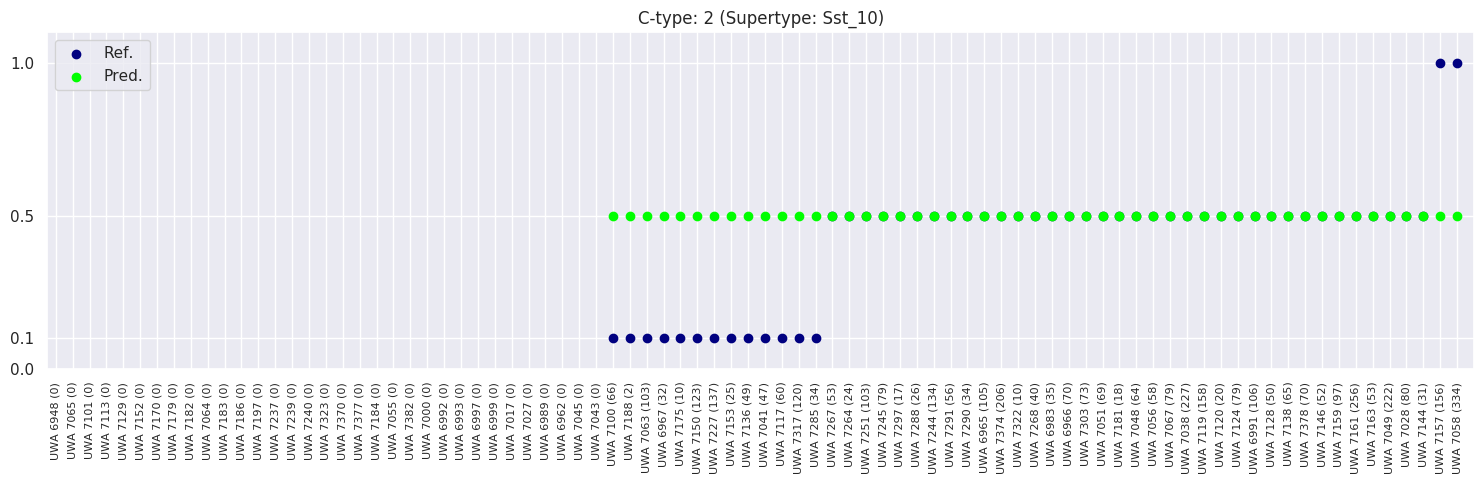

/home/yeganeh/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pearsons correlation: 0.000
5.0 Sst_1
using CPU ...
Total loss: 0.04198083654046059
Total loss: 0.06947294622659683
Total loss: 0.0528423972427845
Total loss: 0.046478670090436935
Total loss: 0.04319949448108673
Total loss: 0.04878488555550575
Total loss: 0.05825364962220192
Total loss: 0.046840205788612366
Total loss: 0.06973758339881897
Total loss: 0.06650284677743912


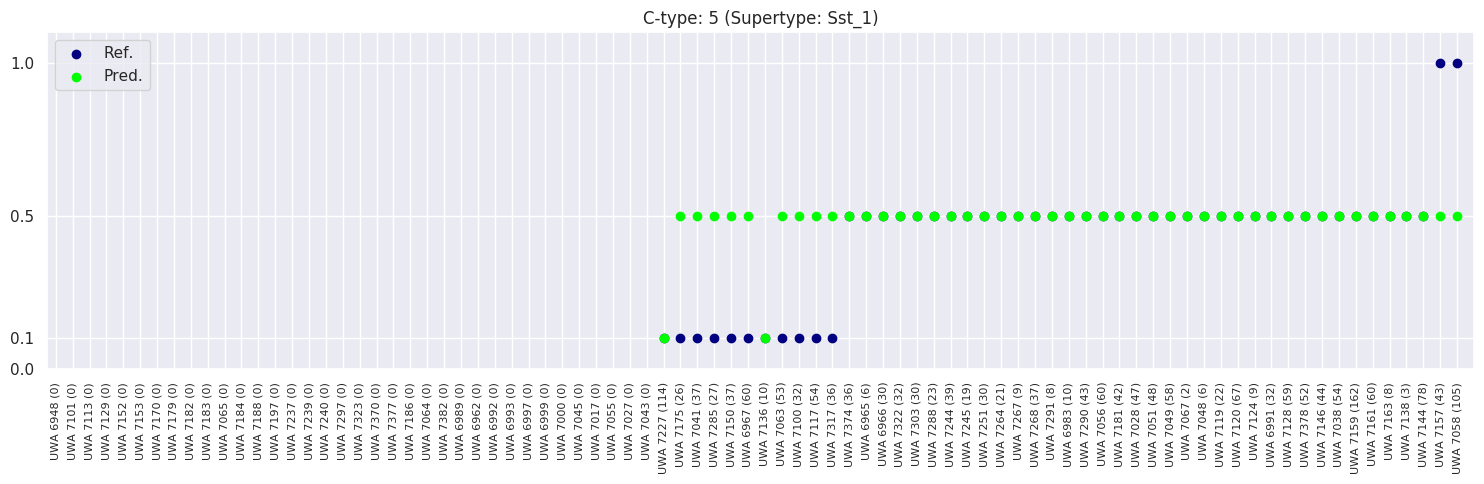

/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pearsons correlation: 0.335
6.0 Sst_19
using CPU ...
Total loss: 0.047593580558896065
Total loss: 0.054920146241784096
Total loss: 0.04862423986196518
Total loss: 0.04694847948849201
Total loss: 0.04623928479850292
Total loss: 0.0468924380838871
Total loss: 0.04741404019296169
Total loss: 0.046719662845134735
Total loss: 0.049881329759955406
Total loss: 0.048044564202427864


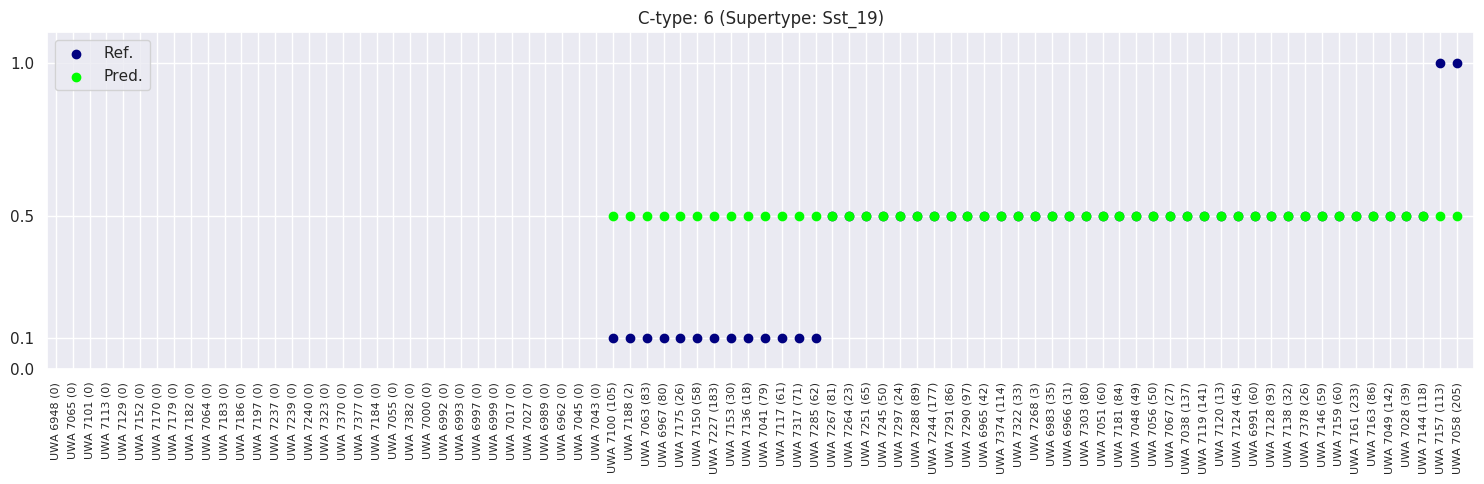

Pearsons correlation: 0.000
8.0 Sst_3
using CPU ...
Total loss: 0.03206278011202812
Total loss: 0.04424619674682617
Total loss: 0.04299358278512955
Total loss: 0.03380373865365982
Total loss: 0.04387887939810753
Total loss: 0.04086310788989067
Total loss: 0.036722853779792786
Total loss: 0.038870133459568024
Total loss: 0.04427066817879677
Total loss: 0.04302399232983589


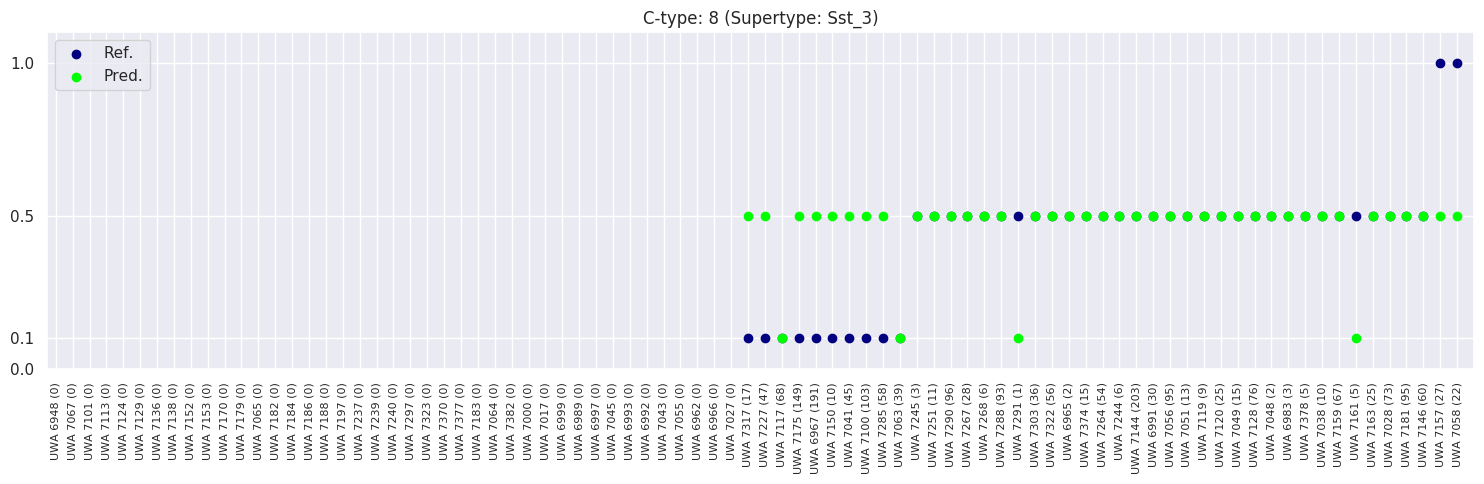

Pearsons correlation: 0.199
9.0 Sst_4
using CPU ...
Total loss: 0.051328444853425026
Total loss: 0.05719596520066261
Total loss: 0.06301331147551537
Total loss: 0.04845433961600065
Total loss: 0.0475902184844017
Total loss: 0.04700682498514652
Total loss: 0.05642924830317497
Total loss: 0.048927320167422295
Total loss: 0.05527207441627979
Total loss: 0.049592141062021255


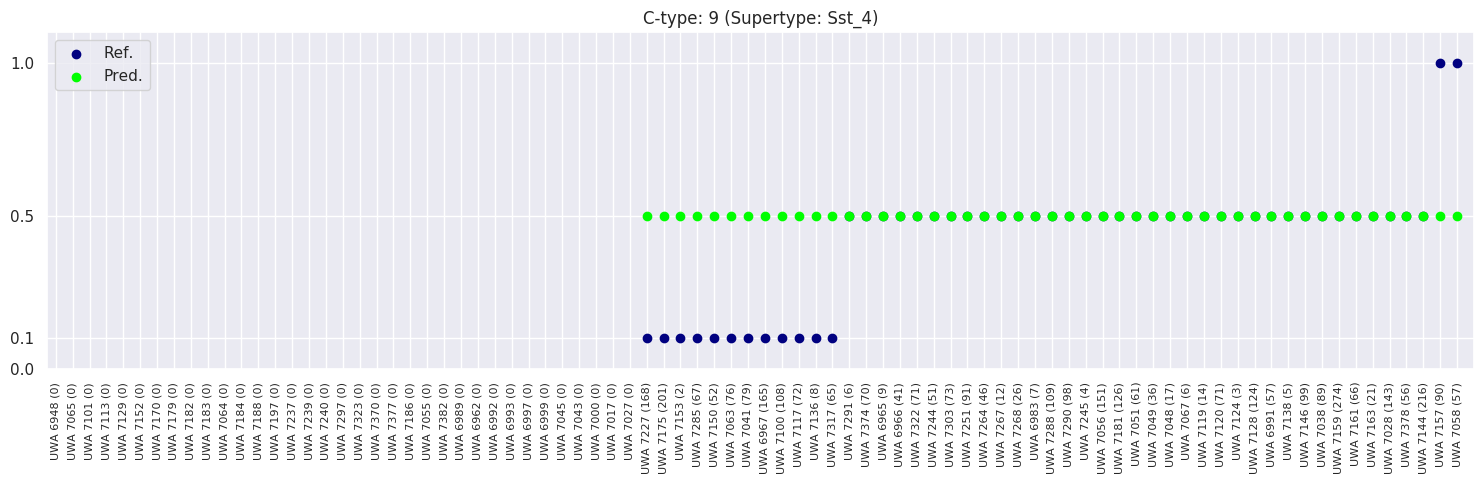

Pearsons correlation: 0.000
10.0 Sst_19
using CPU ...
Total loss: 0.046731432899832726
Total loss: 0.044774580746889114
Total loss: 0.0452182125300169
Total loss: 0.053381845355033875
Total loss: 0.048546621575951576
Total loss: 0.042921895161271095
Total loss: 0.045105379074811935
Total loss: 0.05688820220530033
Total loss: 0.04897782579064369
Total loss: 0.0505731999874115


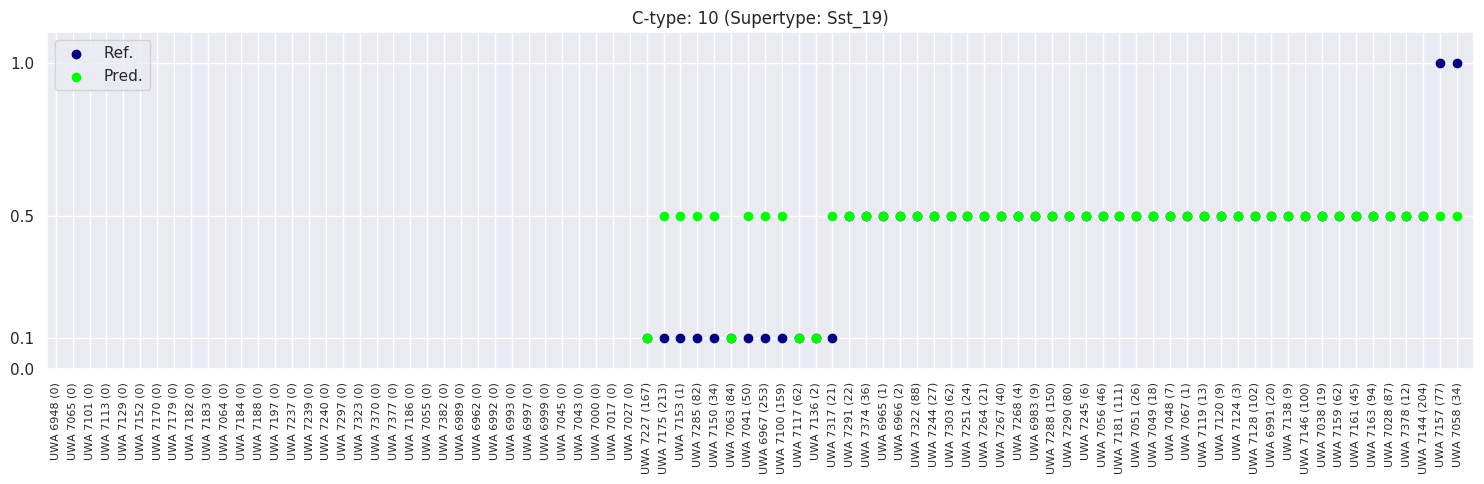

Pearsons correlation: 0.462
15.0 Sst_23
using CPU ...
Total loss: 0.037157285027205944
Total loss: 0.047919075936079025
Total loss: 0.04814440198242664
Total loss: 0.0459901075810194
Total loss: 0.04557501897215843
Total loss: 0.04245210997760296
Total loss: 0.03496905788779259
Total loss: 0.03584877587854862
Total loss: 0.047309624031186104
Total loss: 0.03390615526586771


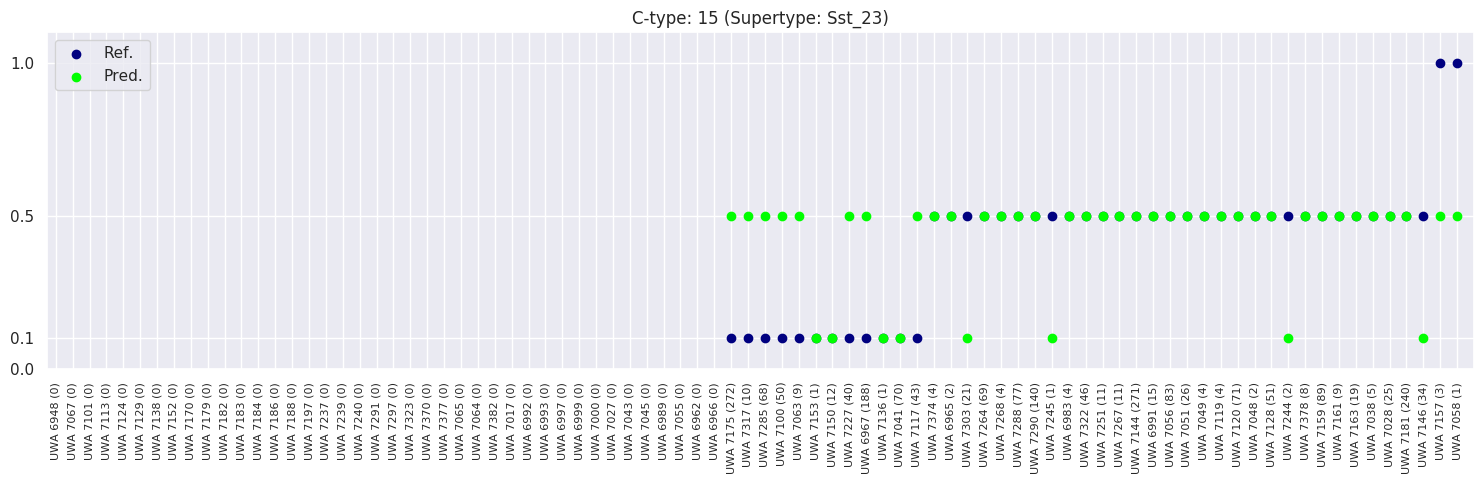

Pearsons correlation: 0.246
18.0 Sst_20
using CPU ...
Total loss: 0.04618835635483265
Total loss: 0.038474882021546364
Total loss: 0.05572575516998768
Total loss: 0.0436013825237751
Total loss: 0.04493202455341816
Total loss: 0.042988214641809464
Total loss: 0.04074753448367119
Total loss: 0.04582771472632885
Total loss: 0.04967833124101162
Total loss: 0.05464712716639042


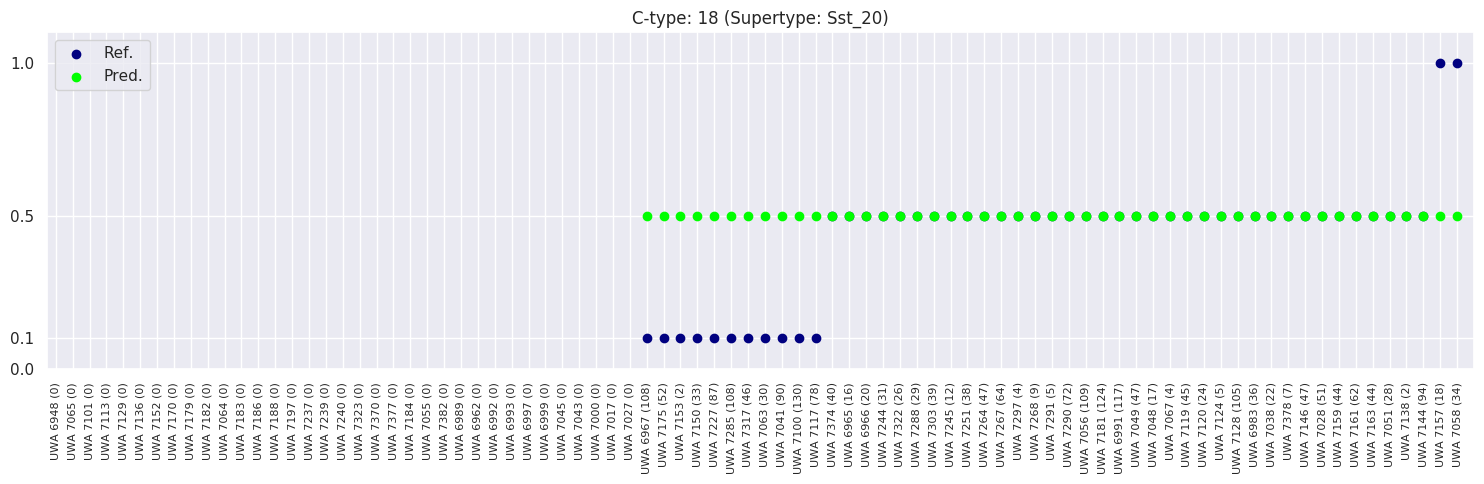

Pearsons correlation: 0.000
20.0 Sst_11
using CPU ...
Total loss: 0.06407716684043407
Total loss: 0.05109425261616707
Total loss: 0.04138935171067715
Total loss: 0.059078337624669075
Total loss: 0.05023888126015663
Total loss: 0.05541973002254963
Total loss: 0.062309784814715385
Total loss: 0.05950973182916641
Total loss: 0.0494429524987936
Total loss: 0.05865976959466934


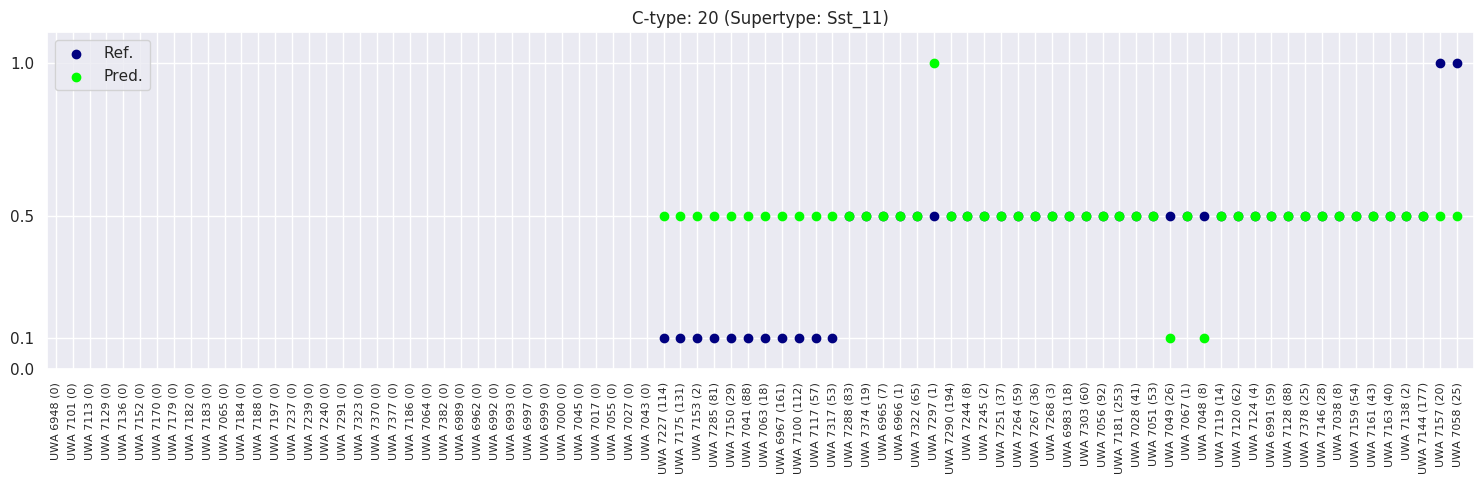

Pearsons correlation: -0.020


In [48]:
seed = 100
kfold = 10
metadata = 'caascore'

m_ind = []
df_caa = pd.DataFrame()
df_caa['c'] = np.zeros(len(cat))
df_caa['superype'] = np.zeros(len(cat))
df_caa['pearson_corr'] = np.zeros(len(cat))
df_caa['mse'] = np.zeros(len(cat))

if metadata == 'cognitive_status_binary':
    data['cs_binary'] = np.zeros(len(data[metadata]))
    indx_dem = np.where(data[metadata] == 'Dementia')[0]
    indx_nodem = np.where(data[metadata] == 'No dementia')[0]
    data['cs_binary'][indx_dem] = 1
    data['cs_binary'][indx_nodem] = 0
    metadata = 'cs_binary'
    binary = True
else:
    binary = False

if metadata == 'caascore':
    data['caa'] = np.zeros(len(data[metadata]))
    indx_mild = np.where(data[metadata] == 'Mild')[0]
    indx_moderate = np.where(data[metadata] == 'Moderate')[0]
    indx_severe = np.where(data[metadata] == 'Severe')[0]
    data['caa'][indx_mild] = 0.1
    data['caa'][indx_moderate] = 0.5
    data['caa'][indx_severe] = 1
    metadata = 'caa'

if metadata == 'cscore':
    data['cs'] = np.zeros(len(data[metadata]))
    indx_absent = np.where(data[metadata] == 'Absent')[0]
    indx_mild = np.where(data[metadata] == 'Sparse')[0]
    indx_moderate = np.where(data[metadata] == 'Moderate')[0]
    indx_severe = np.where(data[metadata] == 'Frequent')[0]
    data['cs'][indx_absent] = .1
    data['cs'][indx_mild] = .4
    data['cs'][indx_moderate] = .7
    data['cs'][indx_severe] = 1
    metadata = 'cs'

if metadata == 'braak':
    data['braak_num'] = np.zeros(len(data[metadata]))
    data['braak_int'] = np.zeros(len(data[metadata]))
    indx_0 = np.where(data[metadata] == 'Braak 0')[0]
    indx_ii = np.where(data[metadata] == 'Braak II')[0]
    indx_iii = np.where(data[metadata] == 'Braak III')[0]
    indx_iv = np.where(data[metadata] == 'Braak IV')[0]
    indx_v = np.where(data[metadata] == 'Braak V')[0]
    indx_vi = np.where(data[metadata] == 'Braak VI')[0]
    data['braak_num'][indx_0] = 0.
    data['braak_num'][indx_ii] = 0.2
    data['braak_num'][indx_iii] = 0.4
    data['braak_num'][indx_iv] = 0.6
    data['braak_num'][indx_v] = 0.8
    data['braak_num'][indx_vi] = 1.
    data['braak_int'][indx_0] = 0
    data['braak_int'][indx_ii] = 2
    data['braak_int'][indx_iii] = 3
    data['braak_int'][indx_iv] = 4
    data['braak_int'][indx_v] = 5
    data['braak_int'][indx_vi] = 6
    metadata = 'braak_num'
    

arm = 0
if metadata == 'caa':
    indx = np.where(data[metadata] > 0)[0]
else:
    indx = np.arange(len(data[metadata]))

state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, indx]
s_idx = outcome['sample_id'][-1].astype(int)[indx]
categories = np.unique(pred_type)
eval_dict = [[None] for i in categories]

supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
super_type = data['supertype_scANVI'][s_idx]
    
uniq_donor = np.unique(data['external_donor_name'])

for i_c, c in enumerate(cat):
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t == tt) for tt in uniq_ref_t]
    num_types = [sum(supertypes == tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, uniq_ref_t[np.argmax(norm_count)])
    x = state[idx, :]
    y = 1. * meta_y
    donors = tmp_donors
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            classifier.load_model(trained_model)
#             f = open(saving_folder + '/summary_' + metadata + '_fold_' + str(m) + '_cat_' + str(int(c))+ '.p', "rb")
#             data_dict = pickle.load(f)
#             f.close()
#             indx = data_dict['sample_indx'].astype(int)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            meta_true.append(eval_dict[-1]['metadata'])
            meta_pred.append(eval_dict[-1]['prediction'])
            error.append(np.mean(np.abs(eval_dict[-1]['metadata'] - eval_dict[-1]['prediction'])))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            xtick.append(f'{dd} ({len(d_idx)})')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(-10)
                meta_true_std.append(0)
                meta_pred_mean.append(-10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)

        values = np.unique(meta_true_mean)
        meta_pred_score = []
        for p_m in meta_pred_mean:
            if p_m > 0:
                dist = (p_m - values)**2
                meta_pred_score.append(values[np.argmin(dist)])
            else:
                meta_pred_score.append(p_m)

        meta_pred_score = np.array(meta_pred_score)
        m_indx = np.argsort(meta_true_mean)
        x = np.arange(len(uniq_donor))
        plt.figure(figsize=[15, 5],dpi=100)
        plt.scatter(x, meta_true_mean[m_indx], color='Navy', label='Ref.')
        plt.scatter(x, meta_pred_score[m_indx], color='Lime', label='Pred.')
        plt.yticks(np.unique(data[metadata]), np.unique(data[metadata]))
#         plt.xticks(x, uniq_donor[m_indx], rotation=90, fontsize=8)
        plt.xticks(x, np.array(xtick)[m_indx], rotation=90, fontsize=8)
        plt.xlim([-.5, np.max(x)+1])
        plt.ylim([0.0, np.max(y)+0.1*np.max(y)])
        plt.legend()
        plt.title(f'C-type: {int(c)} (Supertype: {uniq_ref_t[np.argmax(norm_count)]})')
        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
        plt.savefig(saving_folder + '/caascore_' + str(int(c)) + '_' + stype[stype.find('_')+1:] + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_score[meta_pred_score > 0]
        y_true = meta_true_mean[meta_pred_score > 0]
        df_caa['c'][i_c] = int(c)
        df_caa['superype'][i_c] = uniq_ref_t[np.argmax(norm_count)]
        corr, _ = pearsonr(y_true, y_pred)
        if np.isnan(corr):
            corr = 0.
        print('Pearsons correlation: %.3f' % corr)
        df_caa['pearson_corr'][i_c] = corr
        df_caa['mse'][i_c] = np.mean((y_pred - y_true)**2)

In [49]:
df_caa

c superype  pearson_corr       mse
0   2.0   Sst_10      0.000000  0.050588
1   5.0    Sst_1      0.334647  0.040417
2   6.0   Sst_19      0.000000  0.050588
3   8.0    Sst_3      0.198903  0.048837
4   9.0    Sst_4      0.000000  0.049388
5  10.0   Sst_19      0.461607  0.036327
6  15.0   Sst_23      0.245683  0.055000
7  18.0   Sst_20      0.000000  0.046122
8  20.0   Sst_11     -0.019840  0.058958

2.0 Sst_10
using CPU ...
Total loss: 0.09171113185584545
Total loss: 0.23923349007964134
Total loss: 0.1080598533153534
Total loss: 0.21259772591292858
Total loss: 0.11912517435848713
Total loss: 0.10742334742099047
Total loss: 0.2610946148633957
Total loss: 0.26107194647192955
Total loss: 0.10404094494879246
Total loss: 0.1292389202862978


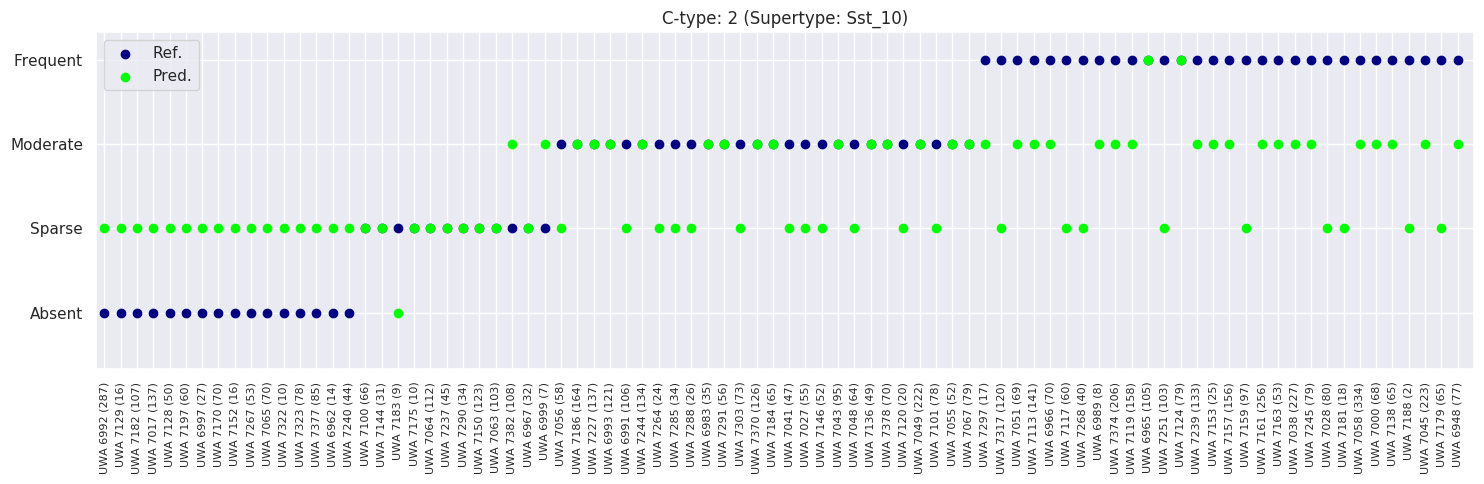

Pearsons correlation: 0.537


/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


5.0 Sst_1
using CPU ...
Total loss: 0.11568079516291618
Total loss: 0.11536164209246635
Total loss: 0.12163107097148895
Total loss: 0.13371388986706734
Total loss: 0.11914961785078049
Total loss: 0.11303543299436569
Total loss: 0.13598693162202835
Total loss: 0.12121887877583504
Total loss: 0.11454367265105247
Total loss: 0.11095965653657913


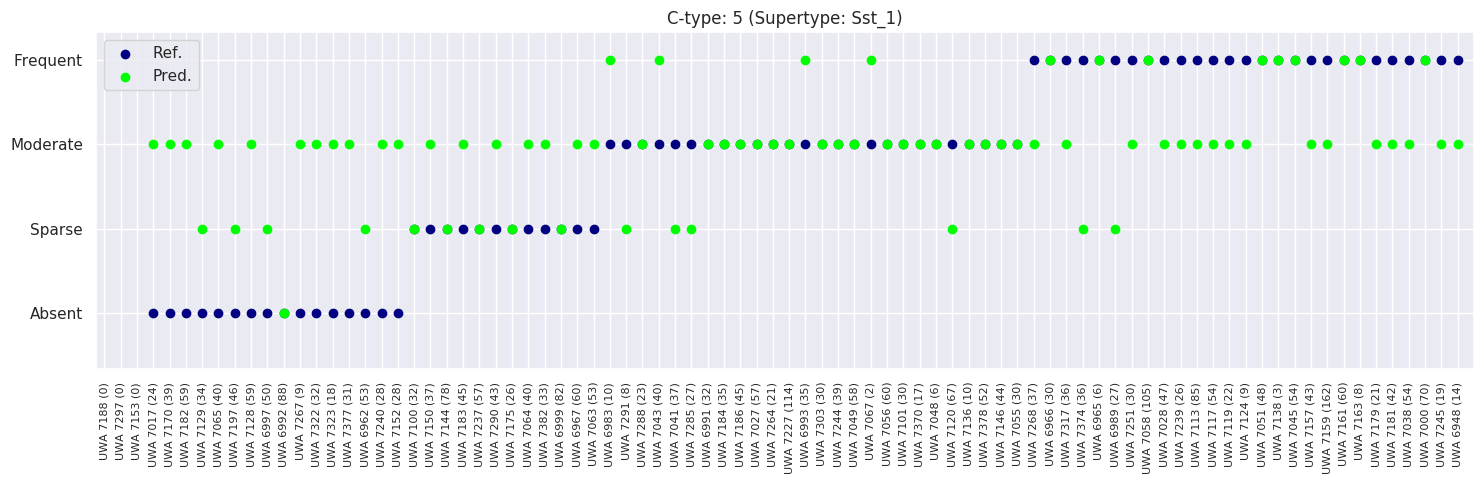

/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pearsons correlation: 0.412
6.0 Sst_19
using CPU ...
Total loss: 0.09654501639306545
Total loss: 0.09474000055342913
Total loss: 0.09485191479325294
Total loss: 0.0828656479716301
Total loss: 0.09292188659310341
Total loss: 0.08704363089054823
Total loss: 0.08896484225988388
Total loss: 0.07949868682771921
Total loss: 0.09857518877834082
Total loss: 0.09498665388673544


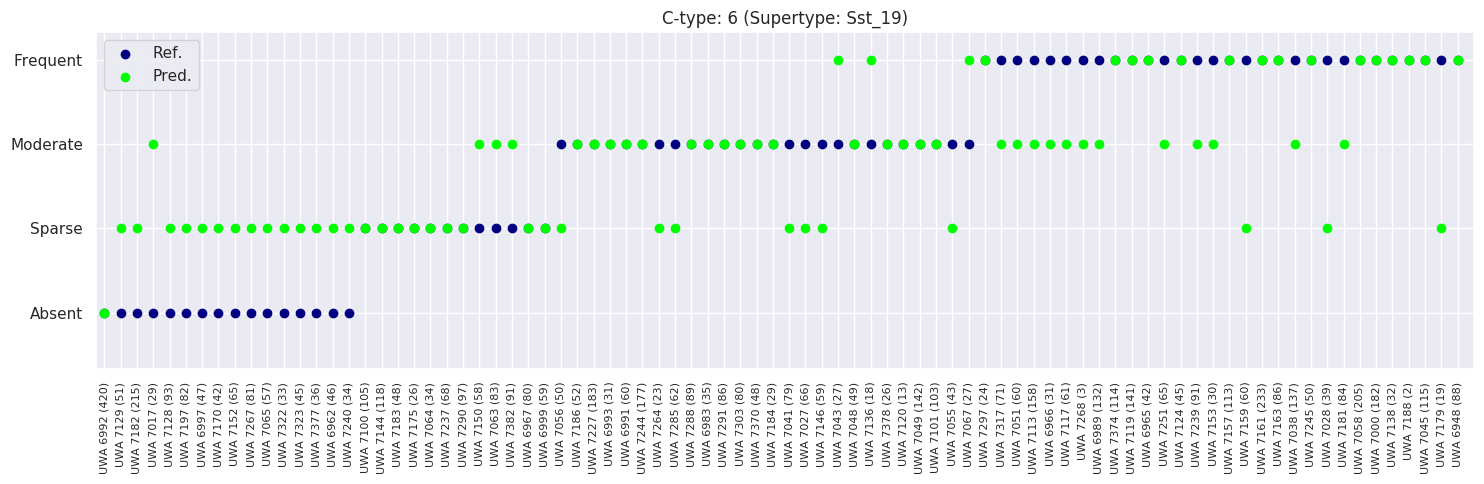

Pearsons correlation: 0.686
8.0 Sst_3
using CPU ...
Total loss: 0.05347692407667637
Total loss: 0.06116950884461403
Total loss: 0.07071615941822529
Total loss: 0.07147281430661678
Total loss: 0.06479146517813206
Total loss: 0.06302007660269737
Total loss: 0.06707770936191082
Total loss: 0.0641186311841011
Total loss: 0.0683648344129324
Total loss: 0.06268277019262314


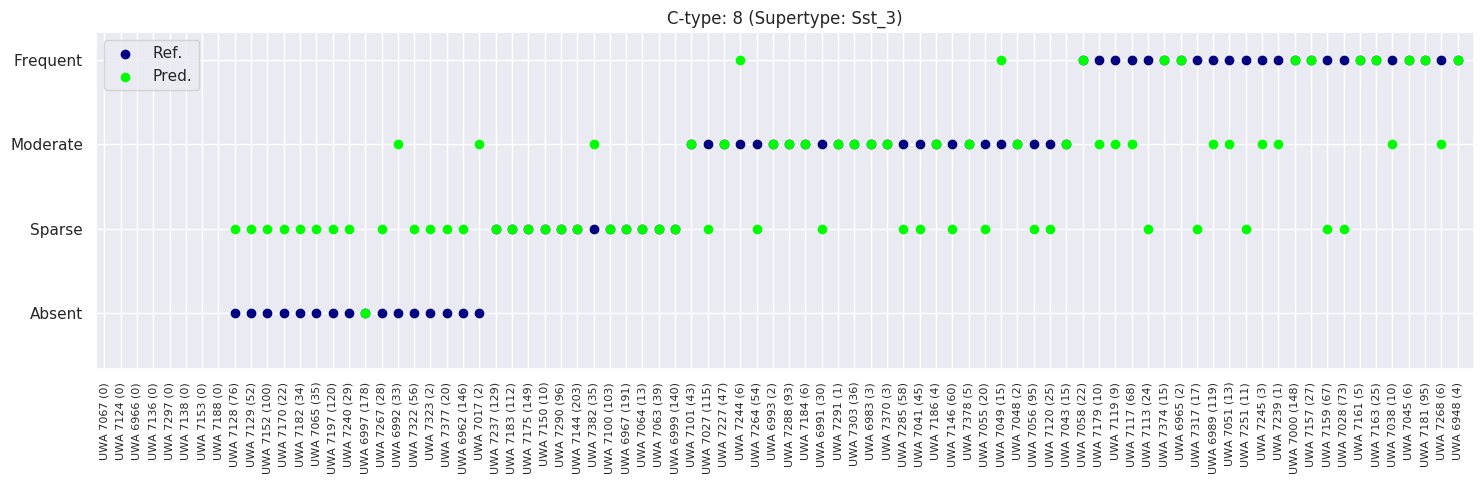

Pearsons correlation: 0.601
9.0 Sst_5
using CPU ...
Total loss: 0.15750320255756378
Total loss: 0.14405783638358116
Total loss: 0.16219361033290625
Total loss: 0.21190028078854084
Total loss: 0.15786630101501942
Total loss: 0.14683978538960218
Total loss: 0.13973166048526764
Total loss: 0.16911582462489605
Total loss: 0.17657660972326994
Total loss: 0.1533818617463112


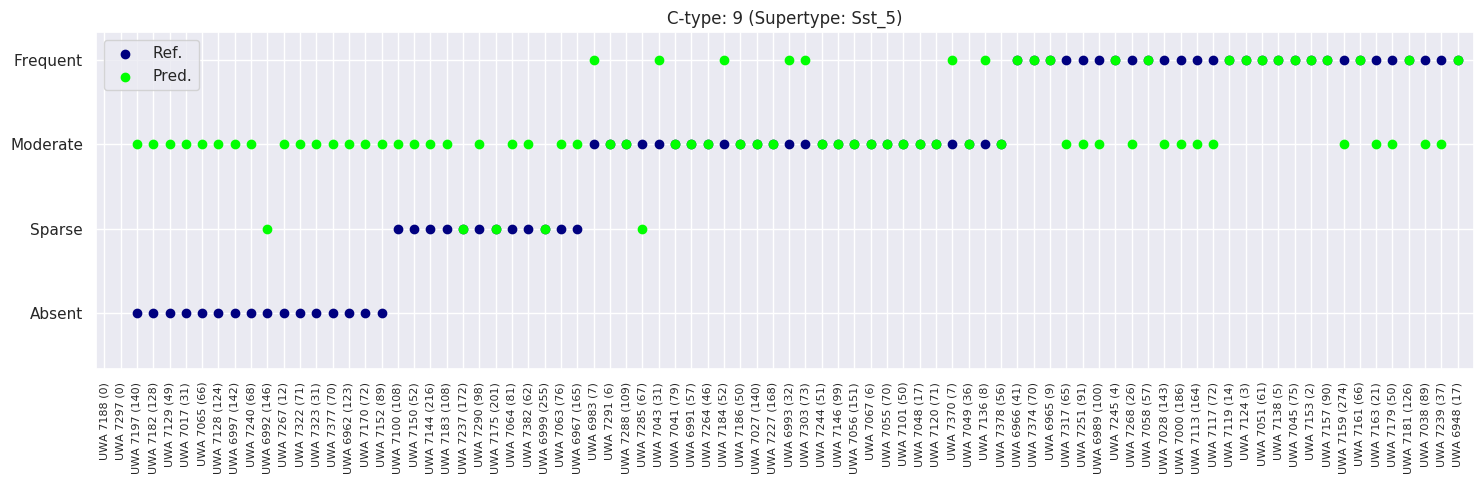

Pearsons correlation: 0.479
10.0 Sst_19
using CPU ...
Total loss: 0.06960253169139226
Total loss: 0.06012755135695139
Total loss: 0.07225460310777028
Total loss: 0.06771168733636539
Total loss: 0.05995960533618927
Total loss: 0.06223970279097557
Total loss: 0.06561385095119476
Total loss: 0.07107404122749965
Total loss: 0.07340795174241066
Total loss: 0.06406928226351738


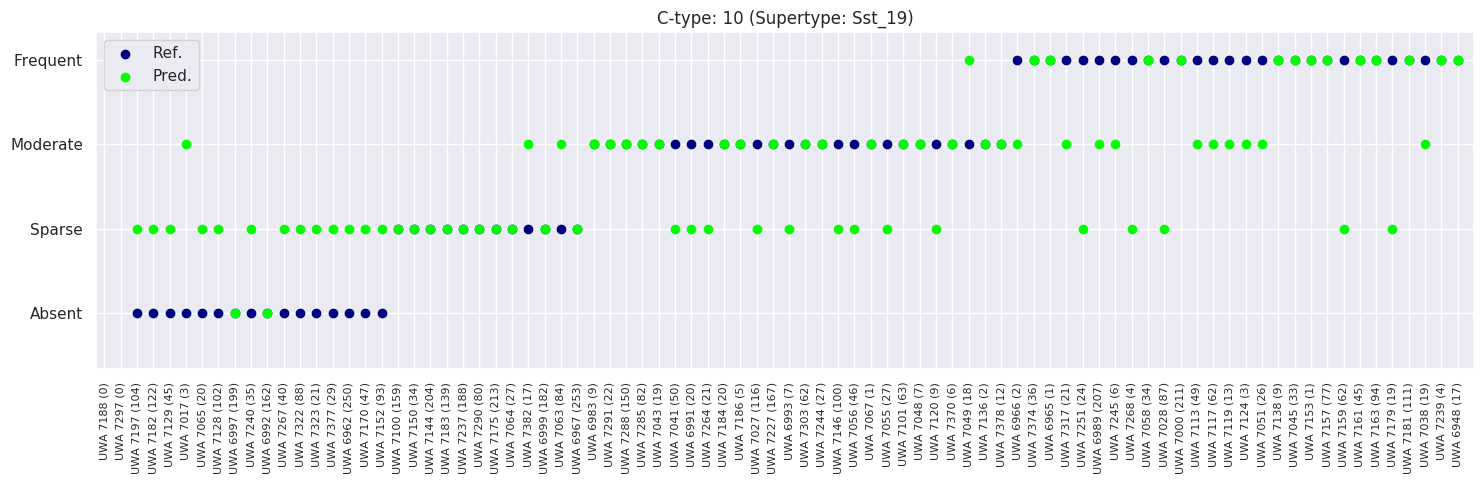

Pearsons correlation: 0.657
15.0 Sst_23
using CPU ...
Total loss: 0.06937553888807695
Total loss: 0.0705843473939846
Total loss: 0.07735254615545273
Total loss: 0.08223533754547437
Total loss: 0.06243088903526465
Total loss: 0.07109101799627145
Total loss: 0.07957846795519193
Total loss: 0.06167325812081496
Total loss: 0.08567197372515996
Total loss: 0.08129980166753133


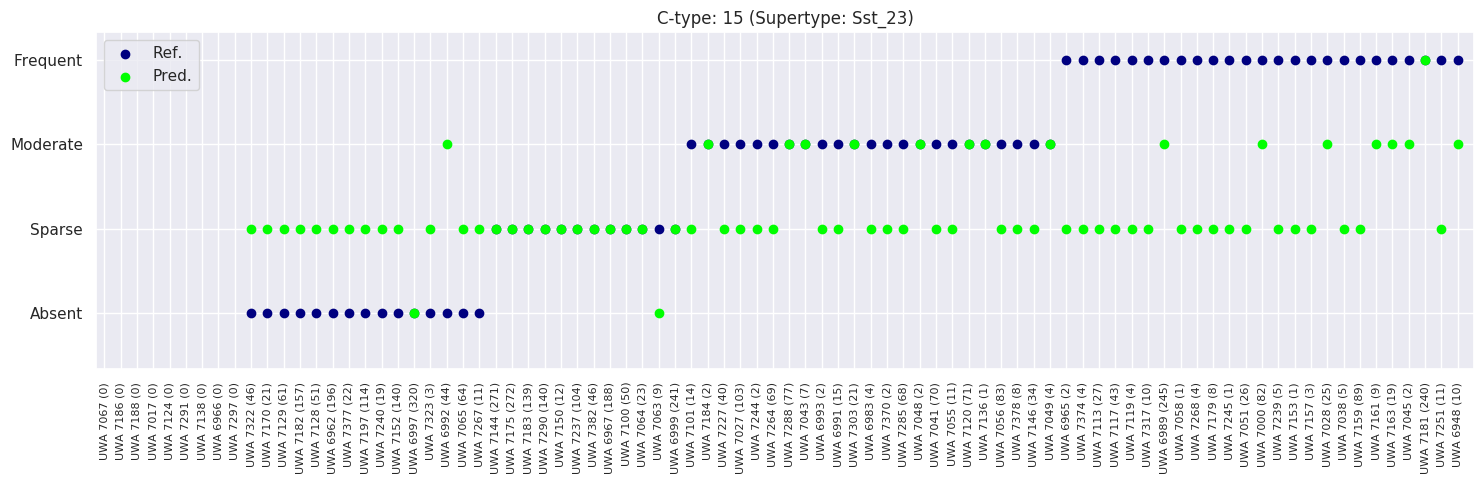

Pearsons correlation: 0.327
18.0 Sst_20
using CPU ...
Total loss: 0.1081502338250478
Total loss: 0.12134858469168346
Total loss: 0.11803784221410751
Total loss: 0.10487705220778783
Total loss: 0.10558686405420303
Total loss: 0.1146157334248225
Total loss: 0.1151685615380605
Total loss: 0.10529548674821854
Total loss: 0.12990102171897888
Total loss: 0.11089736968278885


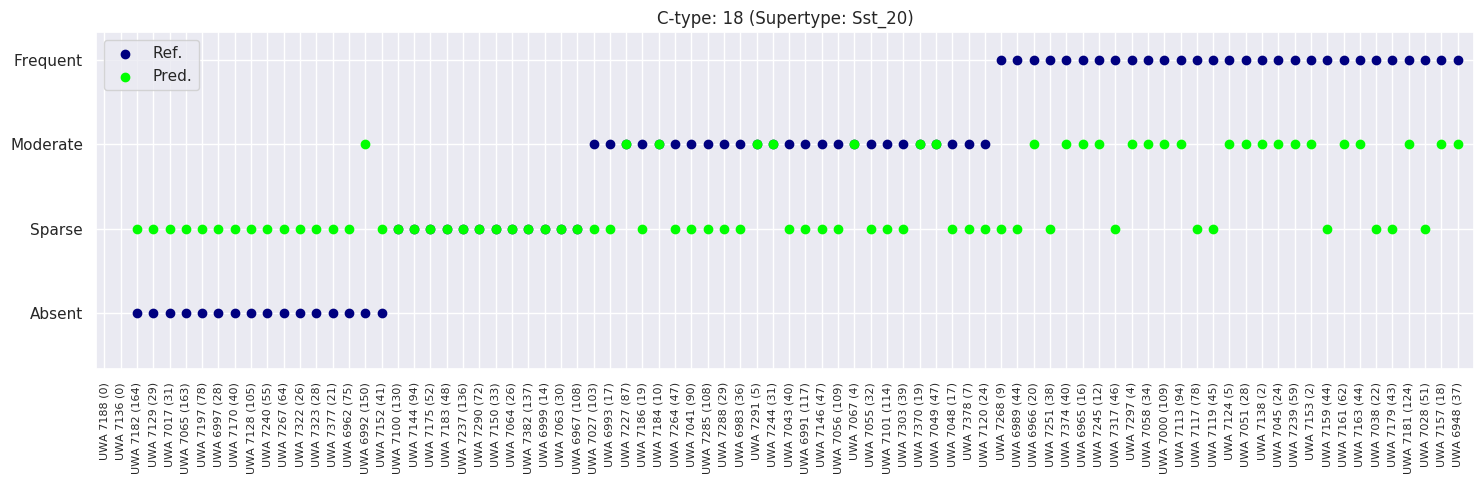

Pearsons correlation: 0.510
20.0 Sst_11
using CPU ...
Total loss: 0.1305364022652308
Total loss: 0.11367786427338918
Total loss: 0.11441856622695923
Total loss: 0.12156836191813152
Total loss: 0.1430072138706843
Total loss: 0.1499046782652537
Total loss: 0.15749919911225638
Total loss: 0.1657885735233625
Total loss: 0.1653567204872767
Total loss: 0.10541242112716039


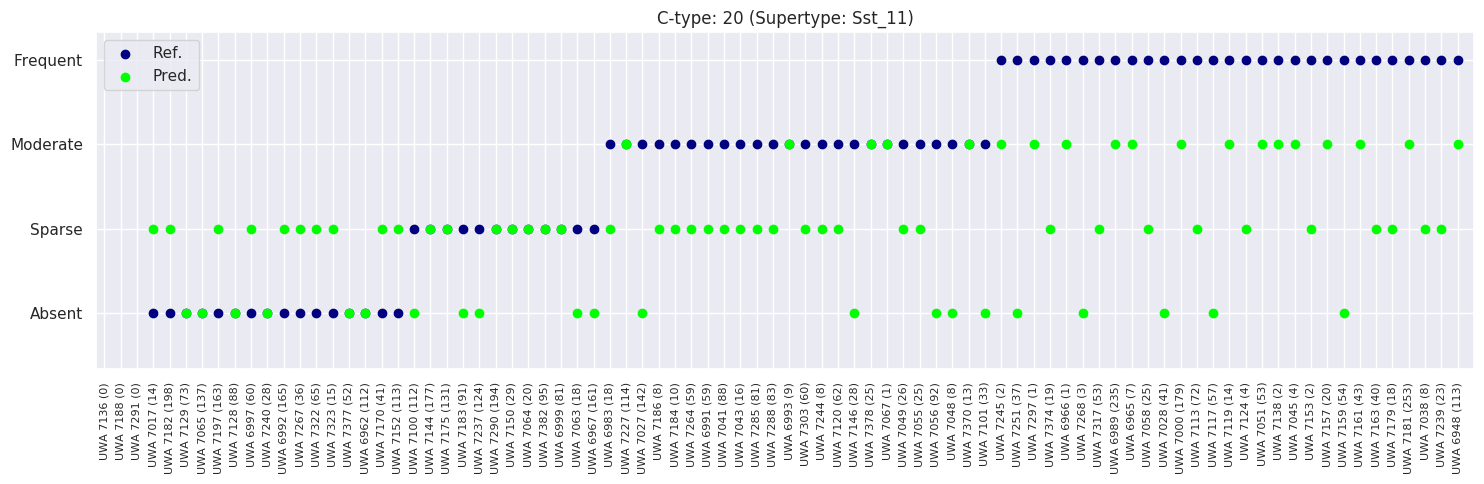

Pearsons correlation: 0.401


In [50]:
arm = 0
seed = 100
kfold = 10
state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, :]
s_idx = outcome['sample_id'][-1].astype(int)
cat = np.unique(pred_type)
supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
metadata = 'cscore'

m_ind = []
df_cs = pd.DataFrame()
df_cs['c'] = np.zeros(len(cat))
df_cs['superype'] = np.zeros(len(cat))
df_cs['pearson_corr'] = np.zeros(len(cat))
df_cs['mse'] = np.zeros(len(cat))

if metadata == 'cognitive_status_binary':
    data['cs_binary'] = np.zeros(len(data[metadata]))
    indx_dem = np.where(data[metadata] == 'Dementia')[0]
    indx_nodem = np.where(data[metadata] == 'No dementia')[0]
    data['cs_binary'][indx_dem] = 1
    data['cs_binary'][indx_nodem] = 0
    metadata = 'cs_binary'
    binary = True
else:
    binary = False

if metadata == 'caascore':
    data['caa'] = np.zeros(len(data[metadata]))
    indx_mild = np.where(data[metadata] == 'Mild')[0]
    indx_moderate = np.where(data[metadata] == 'Moderate')[0]
    indx_severe = np.where(data[metadata] == 'Severe')[0]
    data['caa'][indx_mild] = 0.1
    data['caa'][indx_moderate] = 0.5
    data['caa'][indx_severe] = 1
    metadata = 'caa'

if metadata == 'cscore':
    data['cs'] = np.zeros(len(data[metadata]))
    indx_absent = np.where(data[metadata] == 'Absent')[0]
    indx_mild = np.where(data[metadata] == 'Sparse')[0]
    indx_moderate = np.where(data[metadata] == 'Moderate')[0]
    indx_severe = np.where(data[metadata] == 'Frequent')[0]
    data['cs'][indx_absent] = .1
    data['cs'][indx_mild] = .4
    data['cs'][indx_moderate] = .7
    data['cs'][indx_severe] = 1
    metadata = 'cs'

if metadata == 'braak':
    data['braak_num'] = np.zeros(len(data[metadata]))
    data['braak_int'] = np.zeros(len(data[metadata]))
    indx_0 = np.where(data[metadata] == 'Braak 0')[0]
    indx_ii = np.where(data[metadata] == 'Braak II')[0]
    indx_iii = np.where(data[metadata] == 'Braak III')[0]
    indx_iv = np.where(data[metadata] == 'Braak IV')[0]
    indx_v = np.where(data[metadata] == 'Braak V')[0]
    indx_vi = np.where(data[metadata] == 'Braak VI')[0]
    data['braak_num'][indx_0] = 0.
    data['braak_num'][indx_ii] = 0.2
    data['braak_num'][indx_iii] = 0.4
    data['braak_num'][indx_iv] = 0.6
    data['braak_num'][indx_v] = 0.8
    data['braak_num'][indx_vi] = 1.
    data['braak_int'][indx_0] = 0
    data['braak_int'][indx_ii] = 2
    data['braak_int'][indx_iii] = 3
    data['braak_int'][indx_iv] = 4
    data['braak_int'][indx_v] = 5
    data['braak_int'][indx_vi] = 6
    metadata = 'braak_num'
    
uniq_donor = np.unique(data['external_donor_name'])

for i_c, c in enumerate(cat):
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t == tt) for tt in uniq_ref_t]
    num_types = [sum(supertypes == tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, uniq_ref_t[np.argmax(norm_count)])
    x = state[idx, :]
    y = 1. * meta_y
    donors = tmp_donors
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            classifier.load_model(trained_model)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            meta_true.append(eval_dict[-1]['metadata'])
            meta_pred.append(eval_dict[-1]['prediction'])
            error.append(np.mean(np.abs(eval_dict[-1]['metadata'] - eval_dict[-1]['prediction'])))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            xtick.append(f'{dd} ({len(d_idx)})')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(-10)
                meta_true_std.append(0)
                meta_pred_mean.append(-10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)

        values = np.unique(meta_true_mean)
        meta_pred_score = []
        for p_m in meta_pred_mean:
            if p_m > 0:
                dist = (p_m - values)**2
                meta_pred_score.append(values[np.argmin(dist)])
            else:
                meta_pred_score.append(p_m)

        meta_pred_score = np.array(meta_pred_score)
        m_indx = np.argsort(meta_true_mean)
        x = np.arange(len(uniq_donor))
        plt.figure(figsize=[15, 5],dpi=100)
        plt.scatter(x, meta_true_mean[m_indx], color='Navy', label='Ref.')
        plt.scatter(x, meta_pred_score[m_indx], color='Lime', label='Pred.')
        plt.yticks(np.unique(data[metadata]), ['Absent', 'Sparse','Moderate', 'Frequent'])
#         plt.xticks(x, uniq_donor[m_indx], rotation=90, fontsize=8)
        plt.xticks(x, np.array(xtick)[m_indx], rotation=90, fontsize=8)
        plt.xlim([-.5, np.max(x)+1])
        plt.ylim([-0.1, np.max(y)+0.1*np.max(y)])
        plt.legend()
        plt.title(f'C-type: {int(c)} (Supertype: {uniq_ref_t[np.argmax(norm_count)]})')
        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
        plt.savefig(saving_folder + '/cscore_' + str(int(c)) + '_' + stype[stype.find('_')+1:] + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_score[meta_pred_score > 0]
        y_true = meta_true_mean[meta_pred_score > 0]
        df_cs['c'][i_c] = int(c)
        df_cs['superype'][i_c] = uniq_ref_t[np.argmax(norm_count)]
        corr, _ = pearsonr(y_true, y_pred)
        if np.isnan(corr):
            corr = 0.
        
        print('Pearsons correlation: %.3f' % corr)
        df_cs['pearson_corr'][i_c] = corr
        df_cs['mse'][i_c] = np.mean((y_pred - y_true)**2)

In [51]:
df_cs

c superype  pearson_corr       mse
0   2.0   Sst_10      0.537444  0.092143
1   5.0    Sst_1      0.411864  0.096667
2   6.0   Sst_19      0.686185  0.058929
3   8.0    Sst_3      0.600511  0.073421
4   9.0    Sst_5      0.479145  0.099878
5  10.0   Sst_19      0.657283  0.064756
6  15.0   Sst_23      0.327495  0.129600
7  18.0   Sst_20      0.509819  0.105366
8  20.0   Sst_11      0.401059  0.164444

2.0 Sst_10
using CPU ...
Total loss: 0.15236353874206543
Total loss: 0.42457127571105957
Total loss: 0.18690846860408783
Total loss: 0.15004070103168488
Total loss: 0.18519015610218048
Total loss: 0.16884848475456238
Total loss: 0.48760223388671875
Total loss: 0.4773806929588318
Total loss: 0.49859267473220825
Total loss: 0.1402622014284134


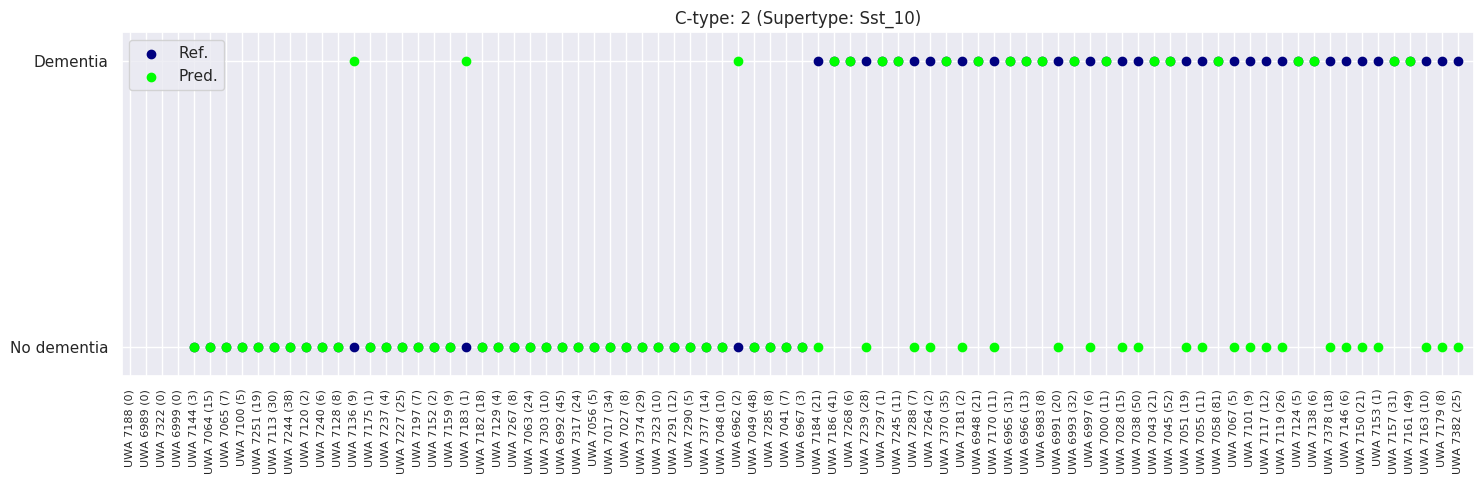

Pearsons correlation: 0.411


/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


5.0 Sst_1
using CPU ...
Total loss: 0.20420660078525543
Total loss: 0.20554880797863007
Total loss: 0.20725663006305695
Total loss: 0.22244147956371307
Total loss: 0.16243083775043488
Total loss: 0.1976773738861084
Total loss: 0.20857137441635132
Total loss: 0.16229960322380066
Total loss: 0.18651142716407776
Total loss: 0.164564311504364


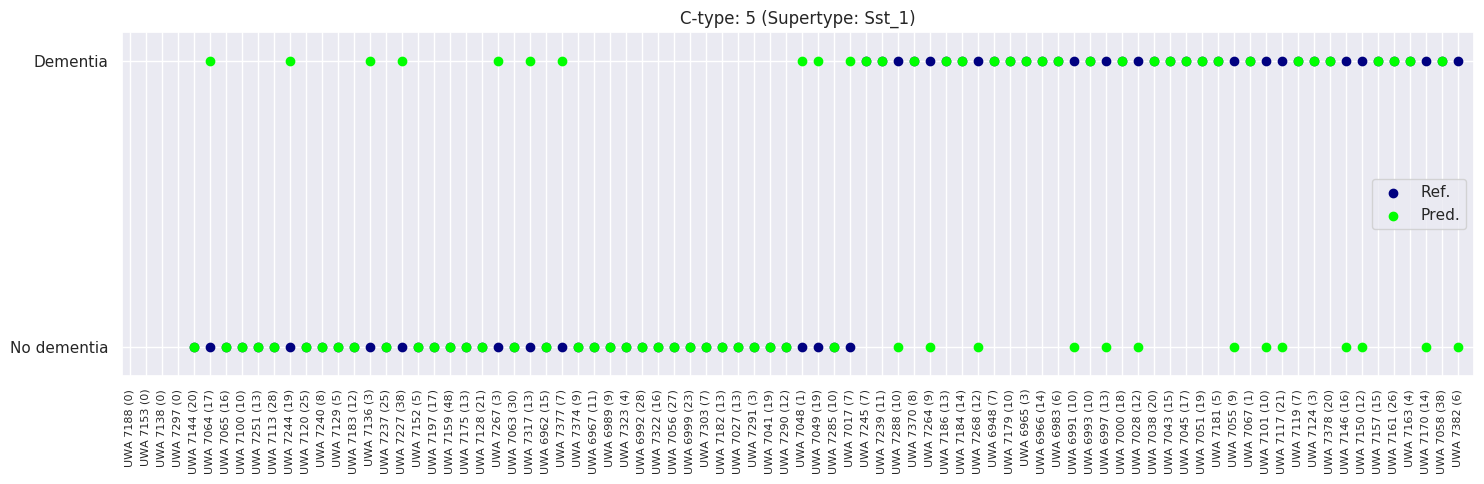

/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pearsons correlation: 0.423
6.0 Sst_19
using CPU ...
Total loss: 0.16946619004011154
Total loss: 0.135662741959095
Total loss: 0.15109336003661156
Total loss: 0.14553623646497726
Total loss: 0.15589135885238647
Total loss: 0.12414801493287086
Total loss: 0.14555180817842484
Total loss: 0.13046156242489815
Total loss: 0.17925415560603142
Total loss: 0.14394311234354973


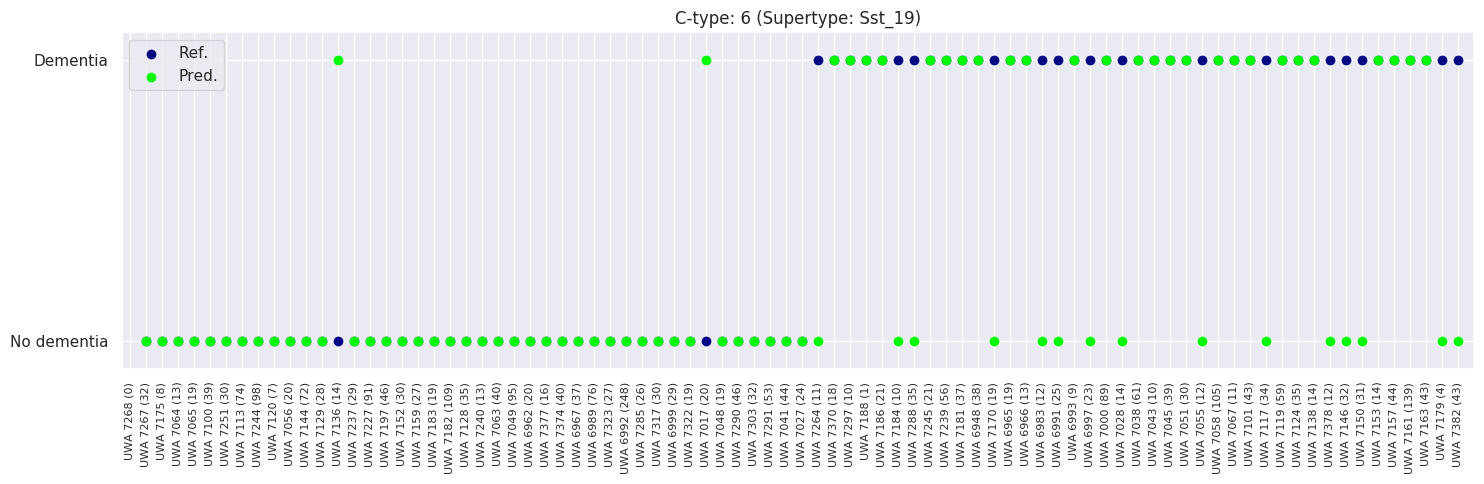

Pearsons correlation: 0.620
8.0 Sst_3
using CPU ...
Total loss: 0.16303886473178864
Total loss: 0.1123304683715105
Total loss: 0.1763661652803421
Total loss: 0.11053384840488434
Total loss: 0.17583897709846497
Total loss: 0.16814839839935303
Total loss: 0.11846670508384705
Total loss: 0.17577724903821945
Total loss: 0.15478267520666122
Total loss: 0.1318400502204895


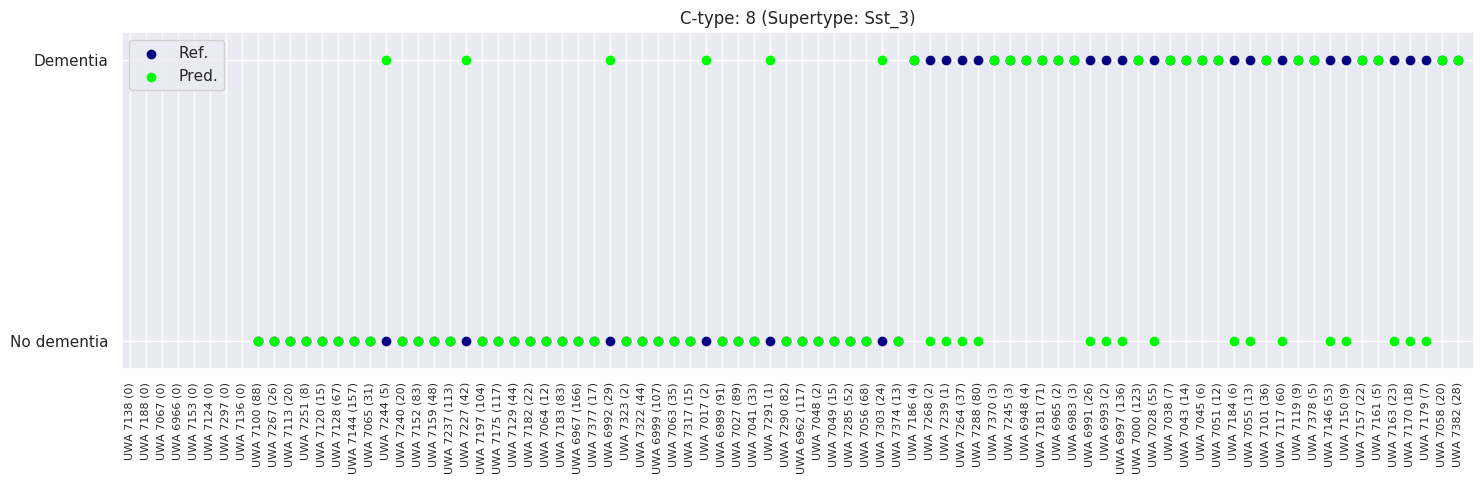

Pearsons correlation: 0.421
9.0 Sst_5
using CPU ...
Total loss: 0.19445645809173584
Total loss: 0.17742224037647247
Total loss: 0.1673889458179474
Total loss: 0.16499163210391998
Total loss: 0.1842256784439087
Total loss: 0.18422874808311462
Total loss: 0.1875743865966797
Total loss: 0.13761574029922485
Total loss: 0.1568768173456192
Total loss: 0.14700151979923248


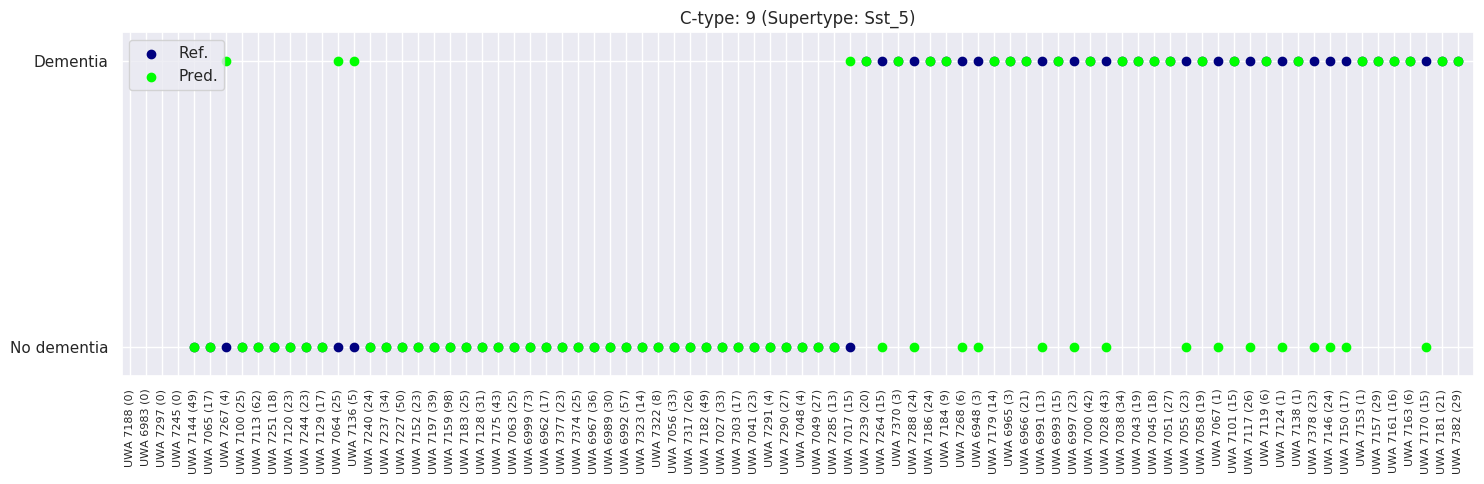

Pearsons correlation: 0.539
10.0 Sst_19
using CPU ...
Total loss: 0.10459257662296295
Total loss: 0.1153968796133995
Total loss: 0.13064010068774223
Total loss: 0.12110039032995701
Total loss: 0.11154447123408318
Total loss: 0.10854974761605263
Total loss: 0.08952726423740387
Total loss: 0.1000235453248024
Total loss: 0.12123553082346916
Total loss: 0.11638699285686016


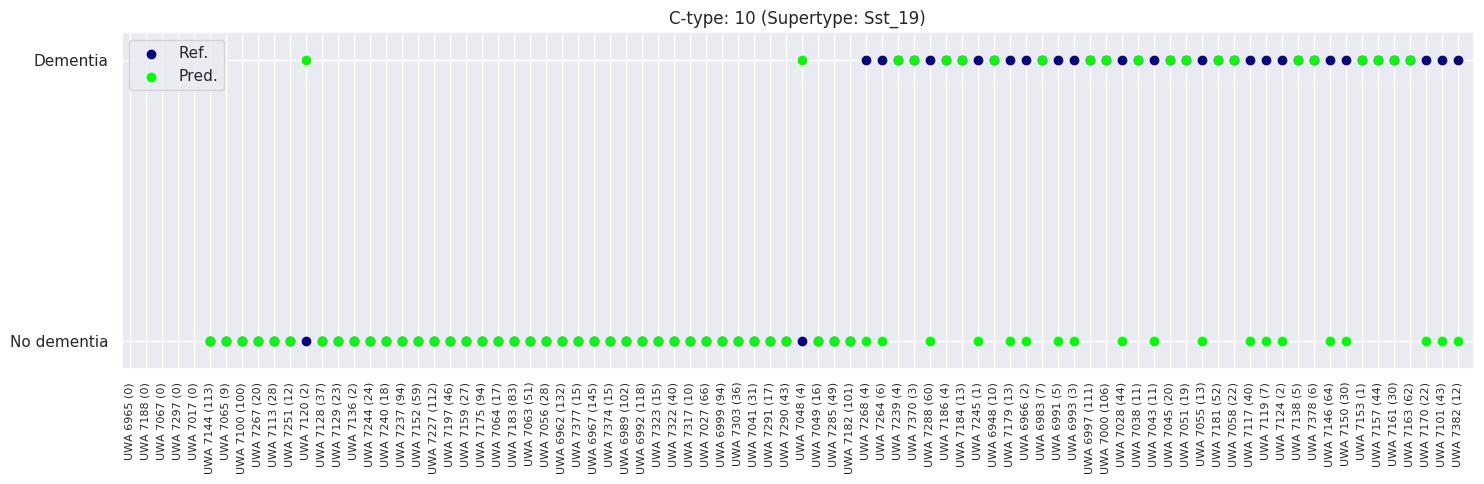

Pearsons correlation: 0.510
15.0 Sst_23
using CPU ...
Total loss: 0.09308703243732452
Total loss: 0.14105863869190216
Total loss: 0.11069698631763458
Total loss: 0.09419886022806168
Total loss: 0.06852302700281143
Total loss: 0.13772636651992798
Total loss: 0.12277927249670029
Total loss: 0.1072799563407898
Total loss: 0.08140137791633606
Total loss: 0.1261158585548401


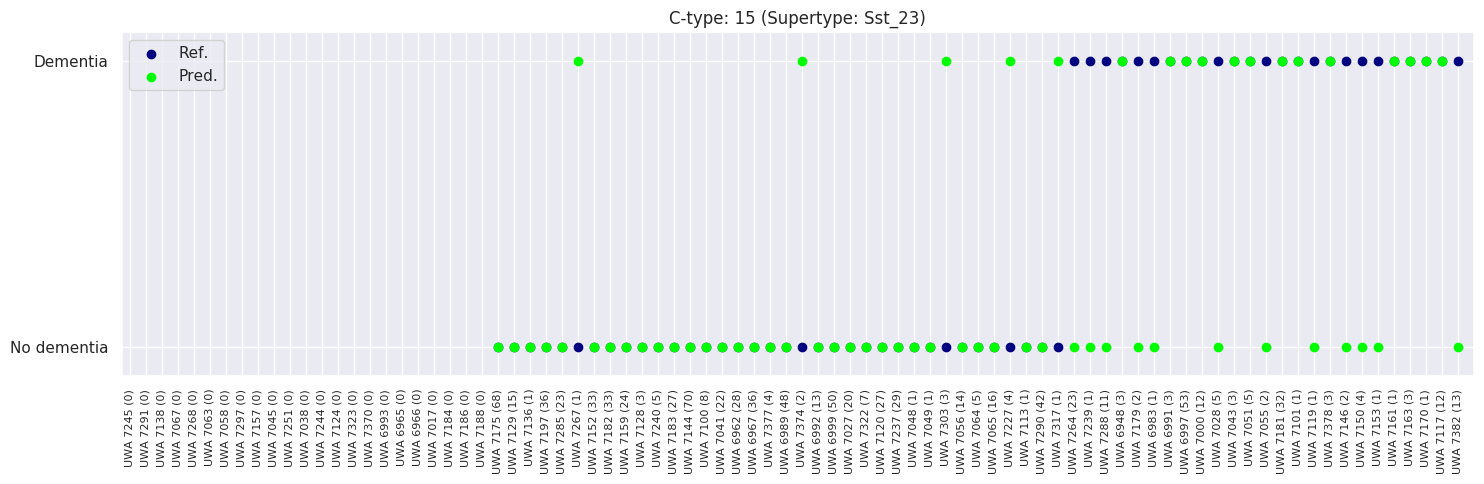

Pearsons correlation: 0.411
18.0 Sst_20
using CPU ...
Total loss: 0.16002732515335083
Total loss: 0.15056301653385162
Total loss: 0.14358912408351898
Total loss: 0.20752757787704468
Total loss: 0.18724022805690765
Total loss: 0.13657620549201965
Total loss: 0.21453602612018585
Total loss: 0.14091843366622925
Total loss: 0.14903002977371216
Total loss: 0.13551844656467438


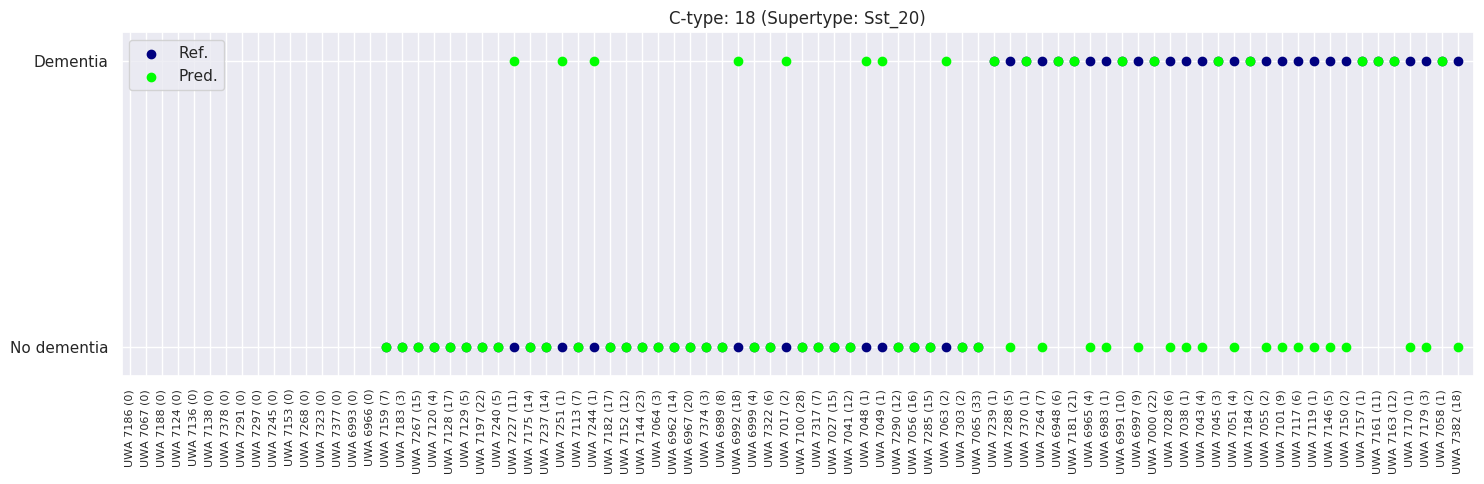

Pearsons correlation: 0.206
20.0 Sst_11
using CPU ...
Total loss: 0.12469541281461716
Total loss: 0.14771674573421478
Total loss: 0.14774799346923828
Total loss: 0.10597488284111023
Total loss: 0.10272110253572464
Total loss: 0.14081653952598572
Total loss: 0.10077571123838425
Total loss: 0.1601494550704956
Total loss: 0.09895091503858566
Total loss: 0.1862659603357315


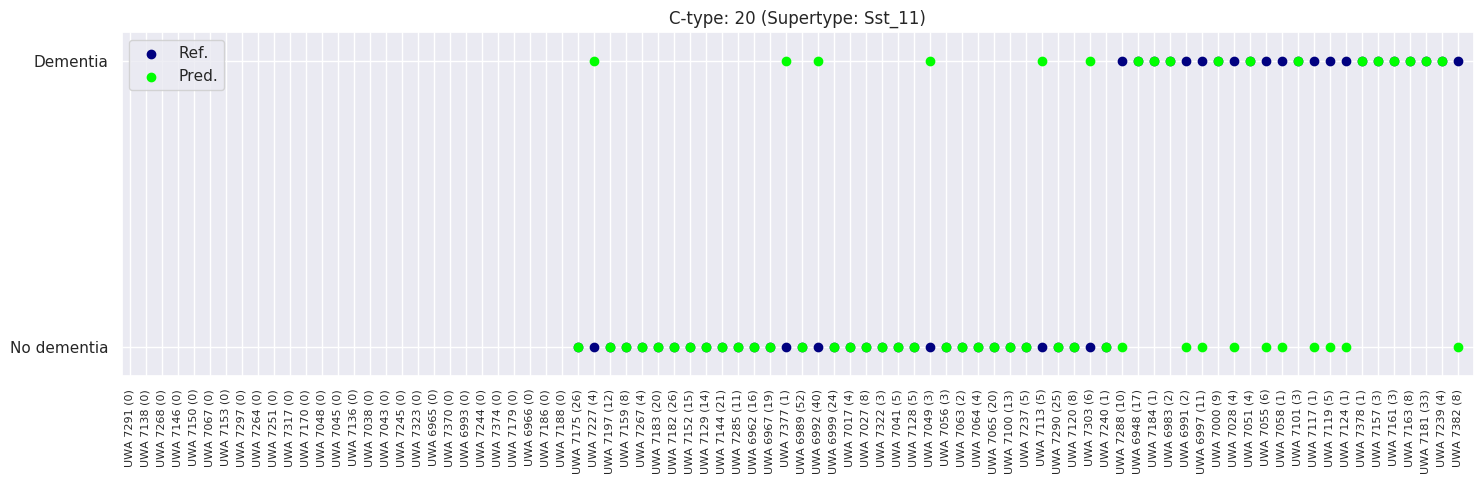

Pearsons correlation: 0.386


In [52]:
arm = 0
seed = 100
kfold = 10
state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, :]
s_idx = outcome['sample_id'][-1].astype(int)
cat = np.unique(pred_type)
supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
metadata = 'cognitive_status_binary'

m_ind = []
df_cs_binary = pd.DataFrame()
df_cs_binary['c'] = np.zeros(len(cat))
df_cs_binary['superype'] = np.zeros(len(cat))
df_cs_binary['pearson_corr'] = np.zeros(len(cat))
df_cs_binary['mse'] = np.zeros(len(cat))

if metadata == 'cognitive_status_binary':
    data['cs_binary'] = np.zeros(len(data[metadata]))
    indx_dem = np.where(data[metadata] == 'Dementia')[0]
    indx_nodem = np.where(data[metadata] == 'No dementia')[0]
    data['cs_binary'][indx_dem] = 1
    data['cs_binary'][indx_nodem] = 0
    metadata = 'cs_binary'
    binary = True
else:
    binary = False


for i_c, c in enumerate(cat):
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t == tt) for tt in uniq_ref_t]
    num_types = [sum(supertypes == tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, uniq_ref_t[np.argmax(norm_count)])
    x = state[idx[idxx], :]
    y = 1. * meta_y[idxx]
    donors = tmp_donors[idxx]
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            classifier.load_model(trained_model)
#             f = open(saving_folder + '/summary_' + metadata + '_fold_' + str(m) + '_cat_' + str(int(c))+ '.p', "rb")
#             data_dict = pickle.load(f)
#             f.close()
#             indx = data_dict['sample_indx'].astype(int)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            meta_true.append(eval_dict[-1]['metadata'])
            meta_pred.append(eval_dict[-1]['prediction'])
            error.append(np.mean(np.abs(eval_dict[-1]['metadata'] - eval_dict[-1]['prediction'])))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            xtick.append(f'{dd} ({len(d_idx)})')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(-10)
                meta_true_std.append(0)
                meta_pred_mean.append(-10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)

        values = np.unique(meta_true_mean)
        meta_pred_score = []
        for p_m in meta_pred_mean:
            if p_m > 0:
                dist = (p_m - values)**2
                meta_pred_score.append(values[np.argmin(dist)])
            else:
                meta_pred_score.append(p_m)
                    

        meta_pred_score = np.array(meta_pred_score)
        color = np.array(color)
        m_indx = np.argsort(meta_true_mean)
        x = np.arange(len(uniq_donor))
        plt.figure(figsize=[15, 5],dpi=100)
        plt.scatter(x, meta_true_mean[m_indx], color='Navy', label='Ref.')
        plt.scatter(x, meta_pred_score[m_indx], color='Lime', label='Pred.')
        plt.yticks(np.unique(data[metadata]), ['No dementia', 'Dementia'])
        plt.xticks(x, np.array(xtick)[m_indx], rotation=90, fontsize=8)
        plt.xlim([-.5, np.max(x)+1])
        plt.ylim([-0.1, np.max(y)+0.1*np.max(y)])
        plt.legend()
        plt.title(f'C-type: {int(c)} (Supertype: {uniq_ref_t[np.argmax(norm_count)]})')
        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
        plt.savefig(saving_folder + '/cs_binary_' + str(int(c)) + '_' + stype[stype.find('_')+1:] + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_score[meta_pred_score >= 0]
        y_true = meta_true_mean[meta_pred_score >= 0]
        df_cs_binary['c'][i_c] = int(c)
        df_cs_binary['superype'][i_c] = uniq_ref_t[np.argmax(norm_count)]
        corr, _ = pearsonr(y_true, y_pred)
        print('Pearsons correlation: %.3f' % corr)
        df_cs_binary['pearson_corr'][i_c] = corr
        df_cs_binary['mse'][i_c] = np.mean((y_pred - y_true)**2)

In [53]:
df_cs_binary

c superype  pearson_corr       mse
0   2.0   Sst_10      0.411357  0.325000
1   5.0    Sst_1      0.422589  0.287500
2   6.0   Sst_19      0.620218  0.204819
3   8.0    Sst_3      0.420660  0.289474
4   9.0    Sst_5      0.538627  0.237500
5  10.0   Sst_19      0.510326  0.265823
6  15.0   Sst_23      0.410963  0.278689
7  18.0   Sst_20      0.206474  0.382353
8  20.0   Sst_11      0.385860  0.285714